---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 2 </font></div>
## <div align="center"> <font color='black'> Student Name: Chee Kin Go, Vincent Bethlehem </font></div>
## <div align="center"> <font color='red'> Student number: s3955624, s3899816 </font></div>
---

In [ ]:
# To ensure Jupyter Notebook width size is same as your device viewport
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Problem statement

Project Goal: Build two classification models for histopathology colon cell images:
- isCancerous Classification: Binary classification to determine whether a cell represents cancerous cells
- Cell-Type Classification: Multi-class classification to identify cell types (fibroblast, inflammatory, epithelial, or others)

Models implemented:
- isCancerous Classification:
    - Baseline:
        - Neural Network (MLP)
        - Deep Neural Network (CNN)
    - Advanced:
        - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons
        - Deep Neural Network (CNN) with L2 Regularisation, Dropout, Batch Normalisation, Data Augmentation

- Cell-Type Classification:
     - Baseline:
     - Advanced:

By the end of evaluation, select best-performing model for each classification task with justification

## Exploratory Data Analysis (EDA)

First ML step to understand dataset characteristics, discover hidden patterns/relationships, and identify outliers affecting model performance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Unlimited width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap to multiple lines

# read csv file
mainColonCellFrame = pd.read_csv('data_labels_mainData.csv', delimiter=',')

# print head
print(mainColonCellFrame.columns)

# print head
mainColonCellFrame.head()


Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')


InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0

#### Data Loading
The data is loaded and abbreviated column names:
- **InstanceID**: Unique identifier for each individual cell instance
- **patientID**: Unique identifier for each patient. Multiple cells may come from the same patient
- **ImageName**: Filename of the image of the cell
- **cellTypeName**: Descriptive name of the cell type (epithelial, lymphocyte, fibroblast and others)
- **cellType**: Numeric code representing the cell type
- **isCancerous**: Binary indicator of Non-cancerous (0) and Cancerous (1) cell

<font color='green'> The target column is **isCancerous** and **cellType**.</font>
All the other columns are attributes.

In [ ]:
# check for missing value
print("\nMissing values:")
print(pd.isna(mainColonCellFrame).sum())


Missing values:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64



#### No Missing Values found

In [ ]:
# display dataframe statistics
print("\nDataframe statistics:")
print(mainColonCellFrame.describe())


Dataframe statistics:
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


#### Dataframe Statistics

- Categorical Variables
    - Nominal Categorical Variables: cellType, cellTypeName, isCancerous

- Numerical Variables
    - Discrete Numerical Variables: InstanceID, patientID



Distribution for each variable:


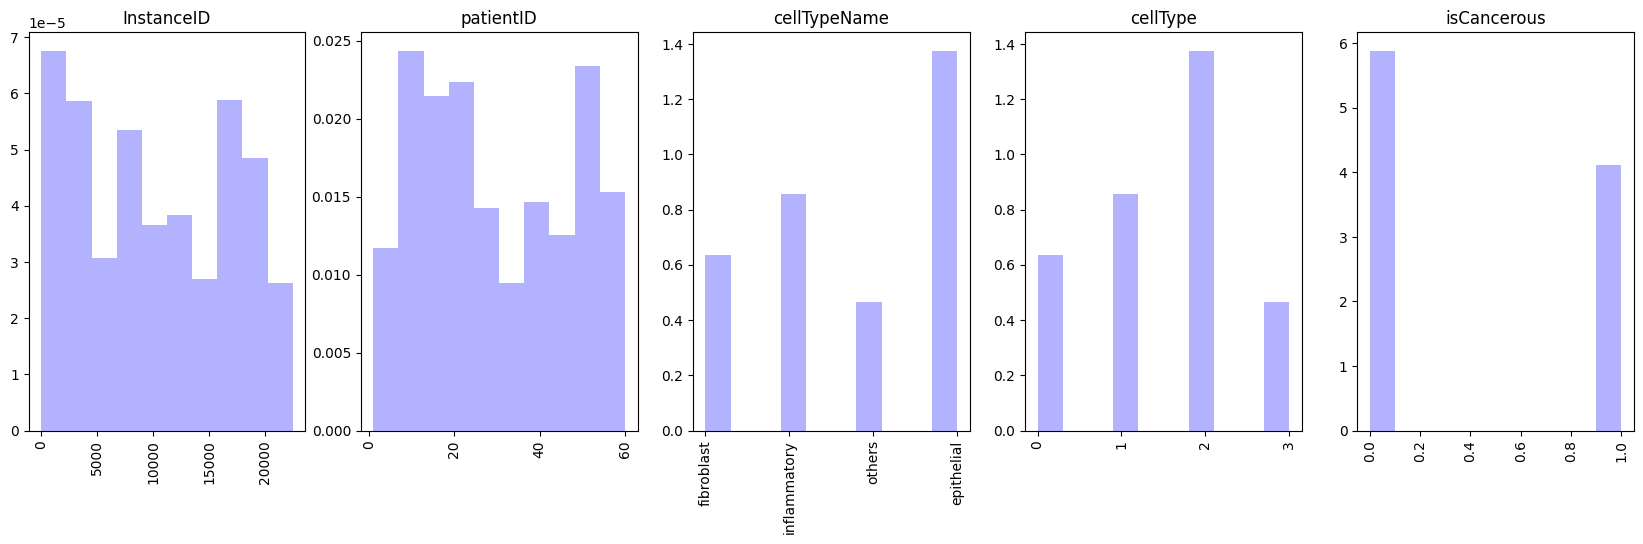

In [ ]:
#Distirbution for each variable
print("\nDistribution for each variable:")
plt.figure(figsize=(25,30))
#didnt do image name because its not relevant
for i, col in enumerate([c for c in mainColonCellFrame.columns if c != 'ImageName']):
    plt.subplot(5, 6, i + 1)
    plt.hist(mainColonCellFrame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.show()

#### Historgram Plot for Distribution Pattern for all variables
Reason:
- visualise data distirbution - shape, spread and central tendency to see if its normal, multimodal, or skewed.
- check the mean, mode and median using the overall shape
- check for outlier if there is unusual frequency in the ranges

Observation from Histogram Plot:
- InstanceID and PatientID are identifiers so dont really show any meaningful information
- CellTypeName and celltype both indicate that the epithelial cell is the most common compared to the others. This shows that the distribution of the cells aren't balanced
- isCancerous is a binary variable (0 for non-cancerous and 1 for cancerous). The histogram shows that there are more non-cancerous instances present
- There are no significant outliers present in the any of the histograms


Correlation Matrix between variables:


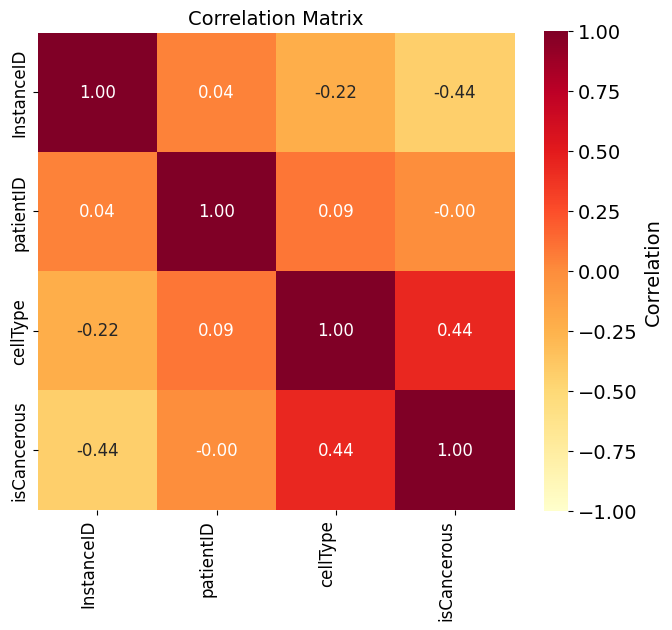

In [ ]:
# Correlation Matrix between variables
print("\nCorrelation Matrix between variables:")
f, ax = plt.subplots(figsize=(7, 7))
numeric_df = mainColonCellFrame.select_dtypes(include='number')

corr = numeric_df.corr()

# Increase font sizes
plt.rcParams.update({'font.size': 14})  # Base font size
cbar_kws = {"shrink": 0.8, "label": "Correlation"}

# Create the heatmap with annotations and a famous color palette
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap="YlOrRd",  # Use the yellow-orange-red palette
    square=True,
    annot=True,  # This will print the values on the heatmap
    fmt=".2f",   # Format the annotations to 2 decimal places
    annot_kws={"size": 12},
    cbar_kws=cbar_kws
)

# Rotate x-axis labels for better readability
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize=12
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=12
)

# Increase title font size
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for bigger fonts
plt.show()

#### Correlation Matrix between isCancerous and other variables
Reason:
- visualise how different variables relate with each other with its strength and direction (positive/negative)
- to spot multicollinearity by identifying extremely high correlations between predictors

Observations:
- Strong Predictors (|r| > 0.5):
    - None

- Moderate Predictors (0.3 < |r| < 0.5):
    - cellType: (0.44) (positive correlation)
    - instanceID: (-0.44) (negative correlation)

- Weak Predictors (|r| < 0.3):
    - patientID: (0.00) (no correlation)

<font color='red'>No presence of multicollinearity in the dataset</font>


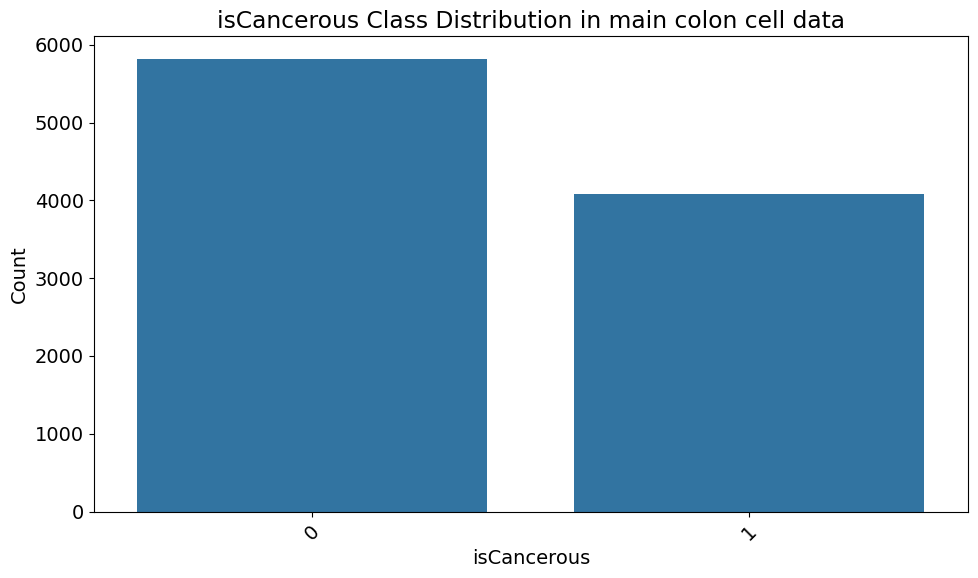

In [ ]:
# isCancerous class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=mainColonCellFrame, x='isCancerous', order=mainColonCellFrame['isCancerous'].value_counts().index)
plt.title('isCancerous Class Distribution in main colon cell data')
plt.xlabel('isCancerous')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate if class names are long
plt.tight_layout()
plt.show()

#### isCancerous Class Distribution Plot
- Reason: Identify class imbalance and need for data augmentation
Observations:

- Moderate class imbalance (58:42 ratio) with 5,800 non-cancerous vs 4,100 cancerous cells
- Sufficient cancerous samples allow standard classification with appropriate evaluation metrics


Relationship between isCancerous and other variables:


<Figure size 3000x5000 with 0 Axes>

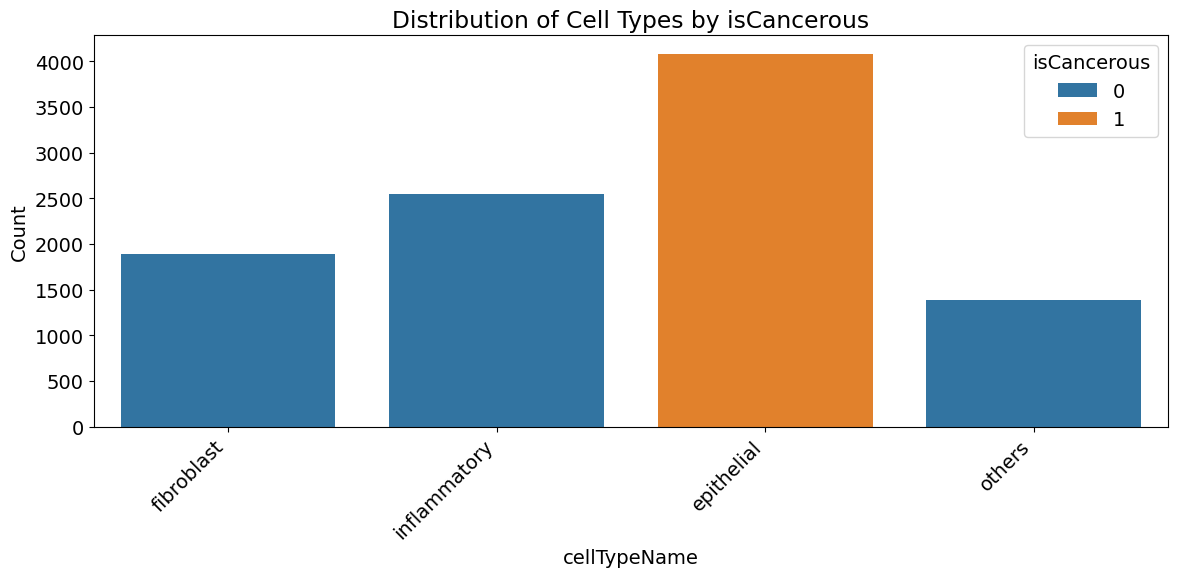

In [ ]:
# Relationship between isCancerous and other variables
print("\nRelationship between isCancerous and other variables:")
plt.figure(figsize=(30,50))

# Create a mapping from cellTypeName to cellType
cell_type_mapping = mainColonCellFrame[['cellTypeName', 'cellType']].drop_duplicates().set_index('cellTypeName')['cellType']

# Sort cell types by their numeric cellType value
ordered_cell_types = cell_type_mapping.sort_values().index.tolist()

# Count plot for Distribution of Cell Types by isCancerous with explicit order
plt.figure(figsize=(12, 6))
sns.countplot(data=mainColonCellFrame, x='cellTypeName', hue='isCancerous', order=ordered_cell_types)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cell Types by isCancerous')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Bar Chart for Distirbution for each Cell Type by isCancerous
- Reason: Identify cell types associated with cancer status as potential predictive indicators
Observations:

- Cancer appears exclusively in epithelial cells (4,000 instances)
- Non-cancerous cells distributed across fibroblast (1,900), inflammatory (2,500), and others (1,400)

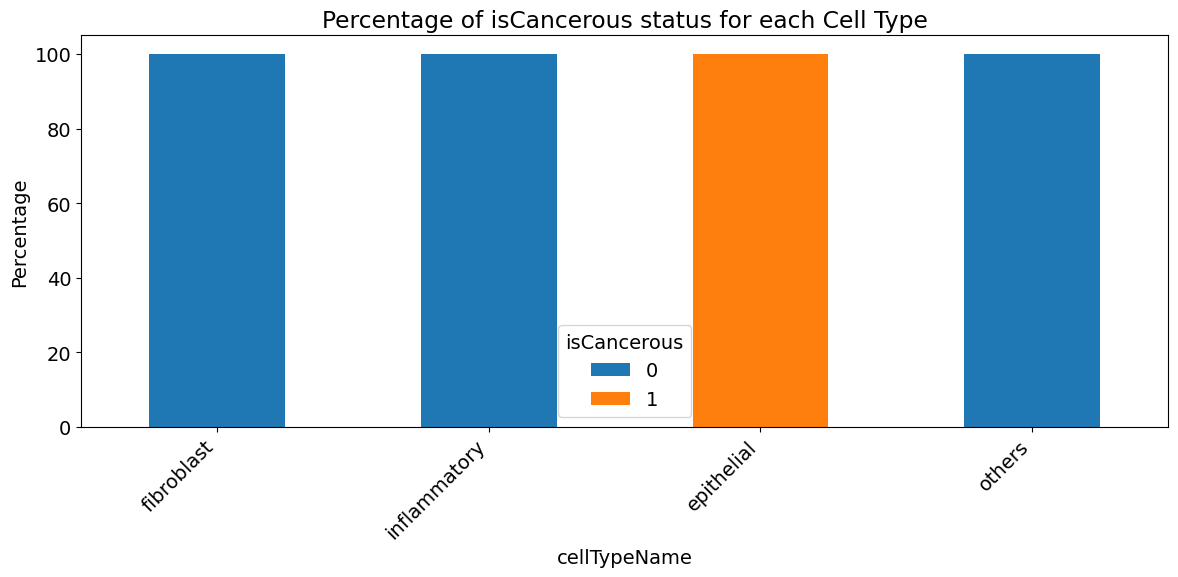

In [ ]:
# Stacked bar chart with the same order
bar_chart_iscancerous_by_cell_type = pd.crosstab(
    mainColonCellFrame['cellTypeName'],
    mainColonCellFrame['isCancerous'],
    normalize='index'
).mul(100)

# Reindex the DataFrame to match the order based on cellType numeric value
bar_chart_iscancerous_by_cell_type = bar_chart_iscancerous_by_cell_type.reindex(ordered_cell_types)

bar_chart_iscancerous_by_cell_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of isCancerous status for each Cell Type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


#### Bar Chart for Percentage of isCancerous status for each Cell Type
- Reason: Show cancer status proportion within each cell type
Observations:

- 100% of epithelial cells are cancerous; 100% of other cell types are non-cancerous
- Perfect correlation between cell type and cancer status makes cell type an ideal classification criterion


Scatter plot between InstanceID and isCancerous for each Cell Type:


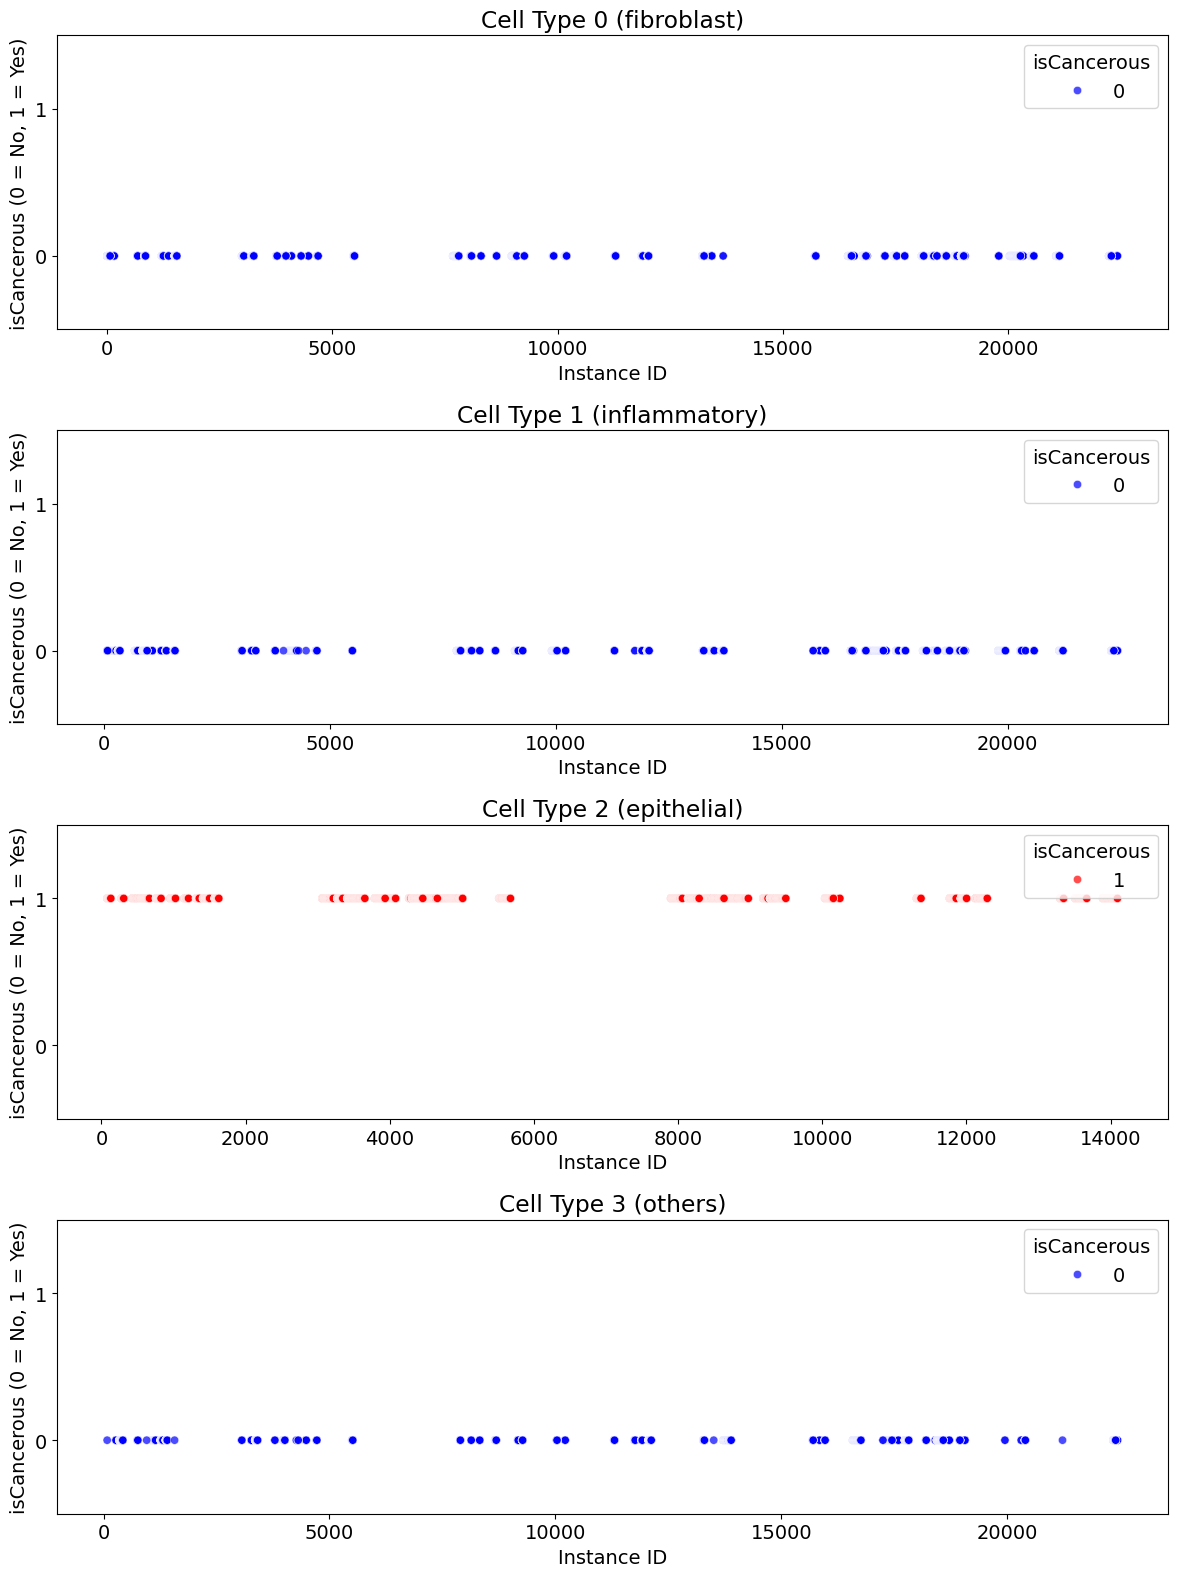

In [ ]:
# Scatter plot between each cell type, PatientID and isCancerous
# Get unique cell types
mainColonCellFrame_unique_cell_types = mainColonCellFrame['cellType'].unique()

# Create a subplot for each cell type
fig, axes = plt.subplots(len(mainColonCellFrame_unique_cell_types), 1, figsize=(12, 4*len(mainColonCellFrame_unique_cell_types)))

# If there's only one cell type, axes won't be an array, so convert it to one
if len(mainColonCellFrame_unique_cell_types) == 1:
    axes = [axes]

# Create a scatter plot for each cell type
print("\nScatter plot between InstanceID and isCancerous for each Cell Type:")
for i, cell_type in enumerate(sorted(mainColonCellFrame_unique_cell_types)):
    # Filter data for current cell type
    cell_data = mainColonCellFrame[mainColonCellFrame['cellType'] == cell_type]

    # Get the cell type name for the title
    cell_type_name = cell_data['cellTypeName'].iloc[0] if not cell_data.empty else f"Type {cell_type}"


    # Create scatter plot
    sns.scatterplot(
        data=cell_data,
        x='InstanceID',
        y='isCancerous',
        hue='isCancerous',
        palette={0: 'blue', 1: 'red'},
        alpha=0.7,
        ax=axes[i]
    )

    # Set title and labels
    axes[i].set_title(f'Cell Type {cell_type} ({cell_type_name})')
    axes[i].set_xlabel('Instance ID')
    axes[i].set_ylabel('isCancerous (0 = No, 1 = Yes)')

    # Set y-axis to show only 0 and 1
    axes[i].set_yticks([0, 1])
    axes[i].set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

#### Scatter plot between InstanceID and isCancerous for each Cell Type
- Reason: Identify patterns between instance IDs and cancer status
Observations:

- Confirms only epithelial cells are cancerous
- Epithelial cells have IDs up to 14000, other types extend beyond 20000, suggesting different collection timing
- Visible ID clustering indicates batch collection at specific ranges (0-5000, 5000-10000, 15000-20000)


Pairplot matrix between all variables with isCancerous hue:


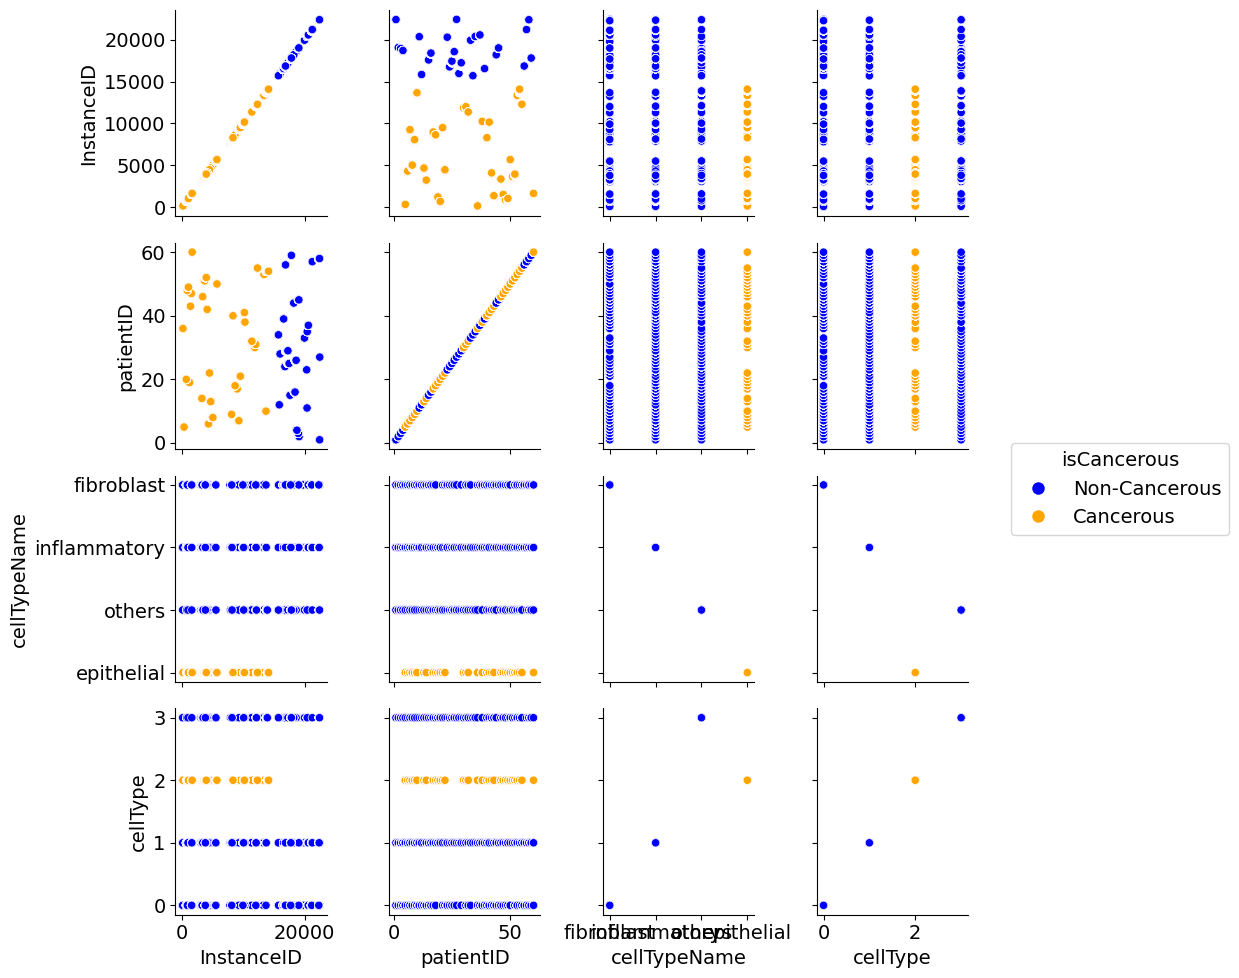

In [ ]:
# Create a Pair plot for each variable with target variable hue (isCancerous)
print("\nPairplot matrix between all variables with isCancerous hue:")
isCancerous_pair_plot = sns.PairGrid(
    mainColonCellFrame,
    vars=['InstanceID', 'patientID', 'cellTypeName', 'cellType'],
    hue="isCancerous",
    palette={0: 'blue', 1: 'orange'}
)
isCancerous_pair_plot.map(sns.scatterplot)

# Remove auto-generated legends
for ax in isCancerous_pair_plot.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Add legend
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)
]
isCancerous_pair_plot.fig.legend(
    custom_lines,
    ["Non-Cancerous", "Cancerous"],
    title="isCancerous",
    loc='center right',
    bbox_to_anchor=(1.25, 0.5)
)

plt.tight_layout()
plt.show()

#### Pairplot matrix between all variables with isCancerous hue:
- Reason: Visualize multi-variable relationships and identify potential decision boundaries

- Linear boundaries separate classes in patientID vs instanceID and cellType-related plots
- No non-linear decision boundaries apparent
- Patient-based clustering shows sampling bias (some patients have more cancerous samples)
- CellTypeName and CellType perfectly correlated (redundant features)


Pairplot matrix between all variables with cellType hue:


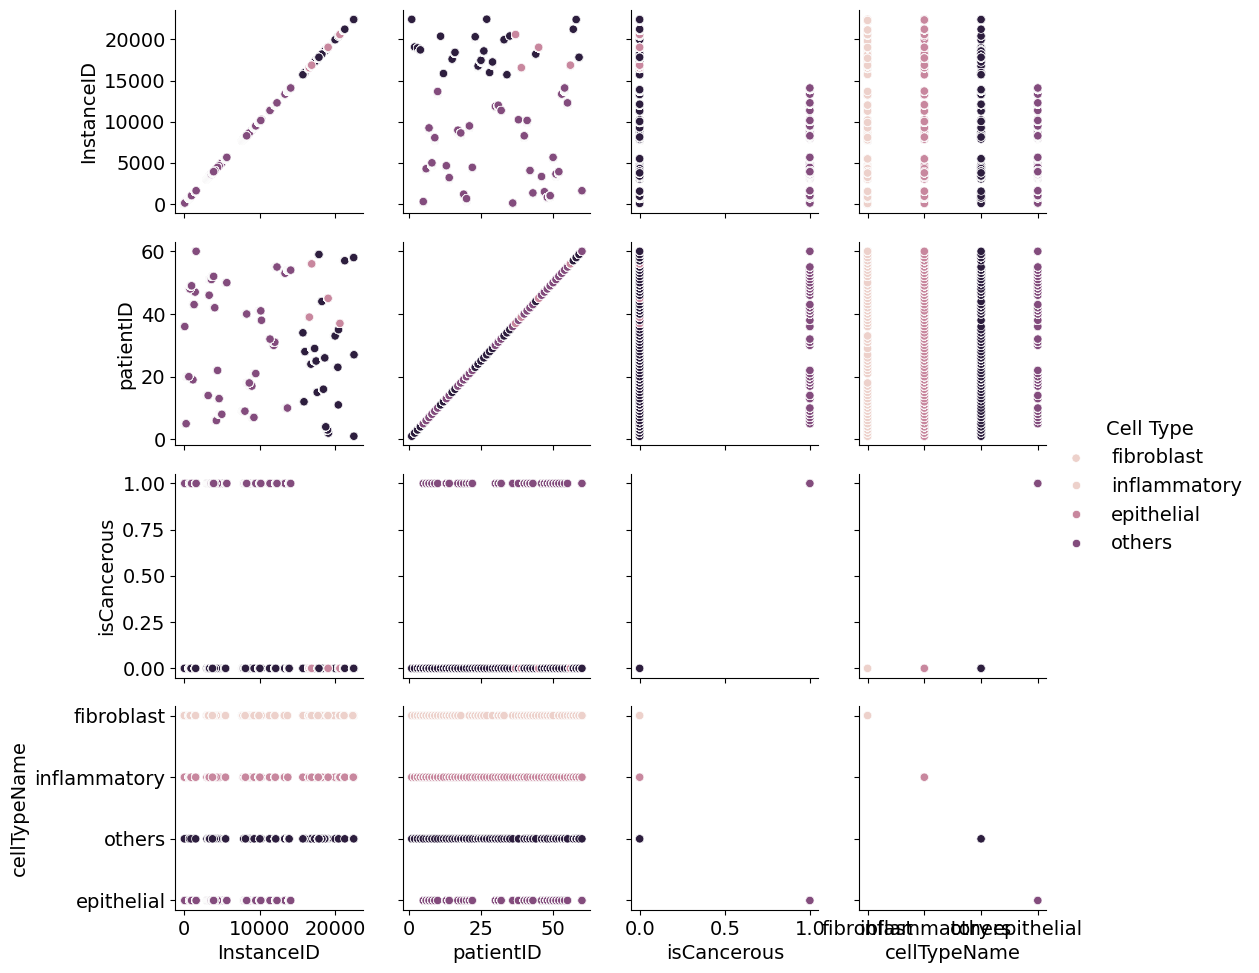

In [ ]:
# Create a Pair plot for each variable with target variable hue (cellType)
print("\nPairplot matrix between all variables with cellType hue:")
cellType_pair_plot = sns.PairGrid(mainColonCellFrame, vars=['InstanceID','patientID', 'isCancerous', 'cellTypeName'], hue="cellType")
cellType_pair_plot.map(sns.scatterplot)

# Get unique cell type names for the legend
cell_type_labels = {
    cell_type: name
    for cell_type, name in zip(
        mainColonCellFrame['cellType'].unique(),
        mainColonCellFrame.drop_duplicates(subset=['cellType'])['cellTypeName']
    )
}
# Sort by cell type value
sorted_labels = [cell_type_labels[i] for i in sorted(cell_type_labels.keys())]

cellType_pair_plot.add_legend(title="Cell Type", labels=sorted_labels)
plt.show()

#### Pairplot matrix between all variables with cellType hue:
- Reason: Visualize variable relationships by cell type
- CellTypeName shows expected categorical clustering
- isCancerous shows no separation by cell type
- InstanceID and PatientID are non-predictive identifiers
- Low correlation between variables
- Color differentiates cell types but no distinct variable groupings appear


Sample image for each cell type:


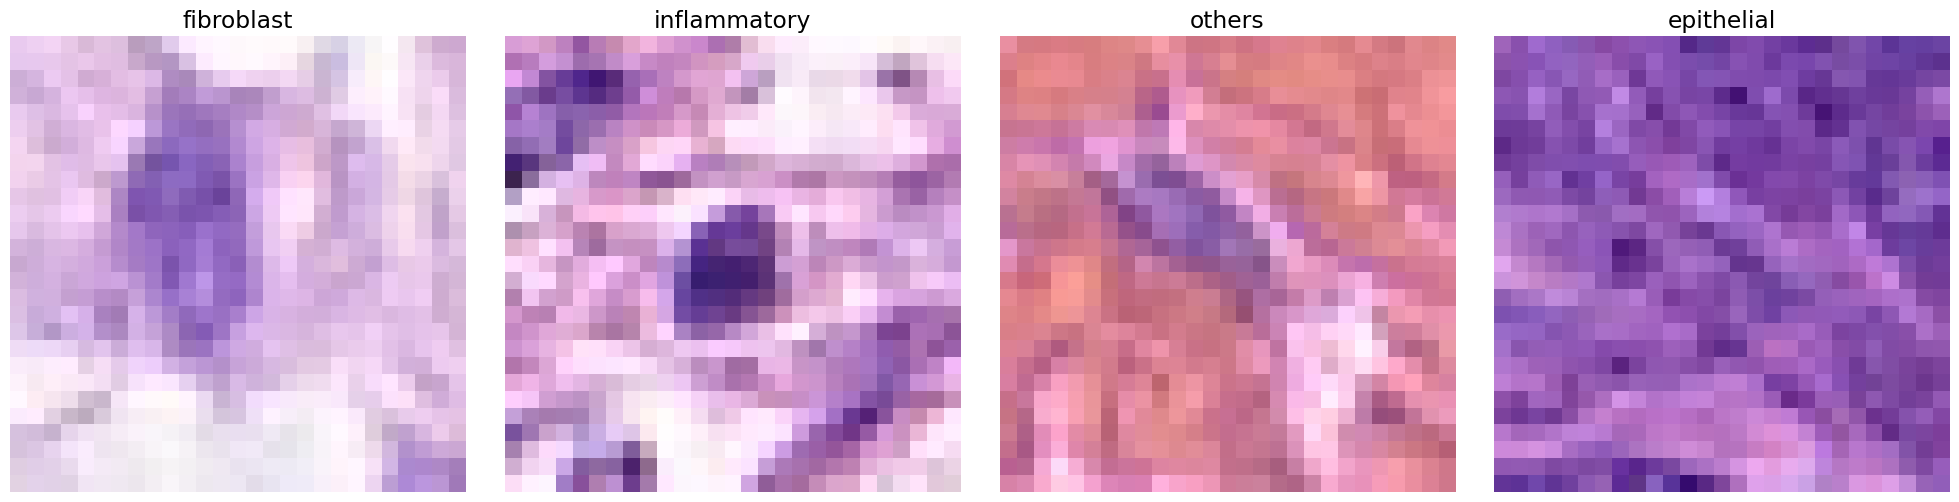

In [ ]:
print("\nSample image for each cell type:")
# unique cell type labels
mainColonCellFrame_cell_types = mainColonCellFrame['cellTypeName'].unique()
example_images = {}

# Choose random image
for cell in mainColonCellFrame_cell_types:
    one_row = mainColonCellFrame[mainColonCellFrame['cellTypeName'] == cell].sample(1)
    example_images[cell] = one_row['ImageName'].values[0]

# grid
fig, axes = plt.subplots(1, len(mainColonCellFrame_cell_types), figsize=(len(mainColonCellFrame_cell_types) * 5, 5))

# Loop selected image + display
for ax, (cell, filename) in zip(axes, example_images.items()):
    path = os.path.join("patch_images", filename)
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(cell)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Sample image for each cell type
Reason: The sample image printed out visually references what each cell type looks like under a microscope. This is a good way to see what we are dealing with.
Observations:
- Fibroblast: Shows a dark centre with lighter colours surrounding it
- Inflammatory: Shows some clustered cells around a center
- Others: No defined structure seems to be a misc cell type. There seems to be some shape present
- Epithelial: There seems to be some darker spots (nucleus?) which has a structured appearance

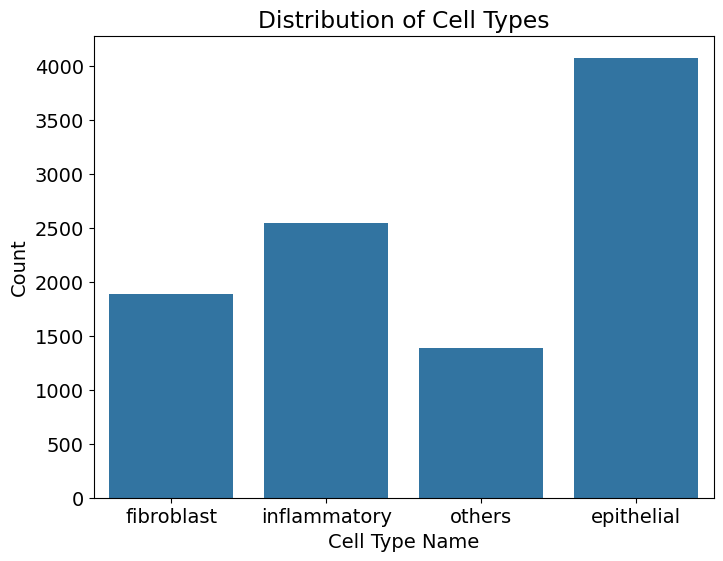

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cellTypeName', data=mainColonCellFrame)
plt.title('Distribution of Cell Types')
plt.xlabel('Cell Type Name')
plt.ylabel('Count')
plt.show()

In [ ]:
print(mainColonCellFrame['cellTypeName'].value_counts())

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64


The distribution shows an inbalance where there is a lot more Epithelial than the rest. This means there may be bias present when predicting the Cell Type in future models. To mitigate this problem, there should be some pre processing to ensure there is a fair performance across the different cell types

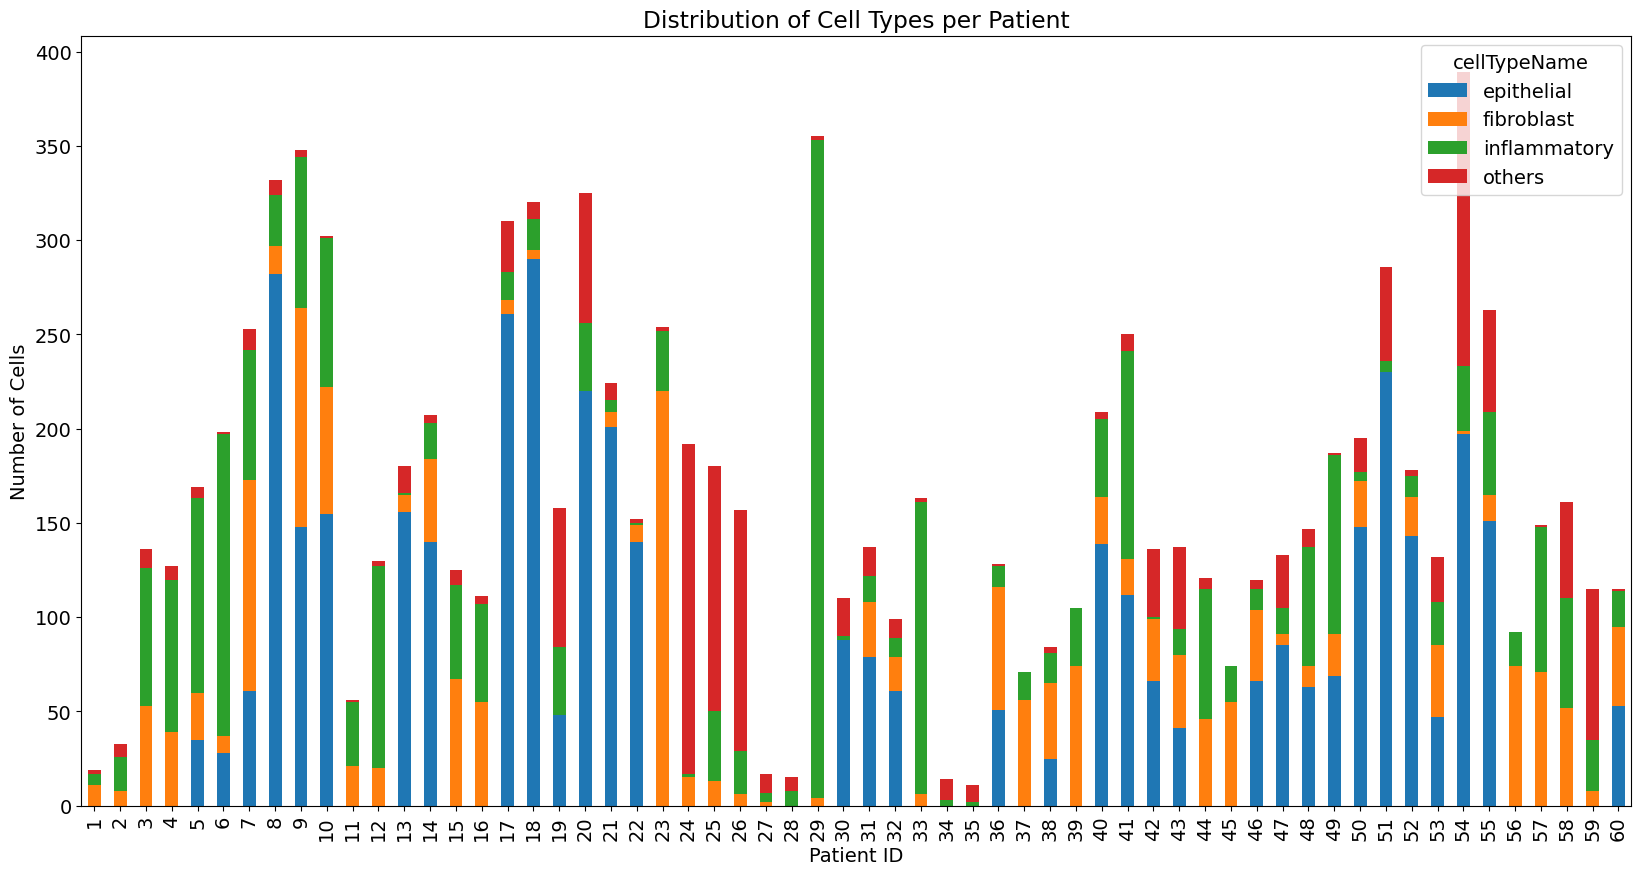

In [ ]:
# Number of each cell type per patient
cell_counts = mainColonCellFrame.groupby(['patientID', 'cellTypeName']).size().reset_index(name='frequency')

# Cell type = columns and patients = rows
cell_pivot = cell_counts.pivot_table(index='patientID', columns='cellTypeName', values='frequency', fill_value=0)

# bar chart
ax = cell_pivot.plot.bar(stacked=True, figsize=(20, 10))

# labels
ax.set_title('Distribution of Cell Types per Patient')
ax.set_ylabel('Number of Cells')
ax.set_xlabel('Patient ID')

# Display the plot
plt.show()

In [ ]:
#Copying the MainColonCellFrame to perform different different pre-processing
#This is because CellType can't be hot encoded as this is the Target Variable for the Cell Type Model
cellType_base_main_data = mainColonCellFrame.copy()

## Data Pre-Processing for Baseline Cell Type Model - Logistic Regression (multi)

Missing Values - There are none

Remove InstanceID', 'ImageName', 'cellTypeName', 'isCancerous



In [ ]:
#drop irrelevant columns based off EDA
cellType_base_main_data.drop(columns=['InstanceID', 'cellTypeName', 'isCancerous'], inplace=True)

In [ ]:
#confirming columns were dropped
print(cellType_base_main_data.columns)

Index(['patientID', 'ImageName', 'cellType'], dtype='object')


Splitting Dataset by PatientID


Cell Type Base Model - Logistic Regression: Splitting into Train, Validation, and Test sets (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients

Cell Type Base Model: Class Distribution for Train, Validation, and Test sets:


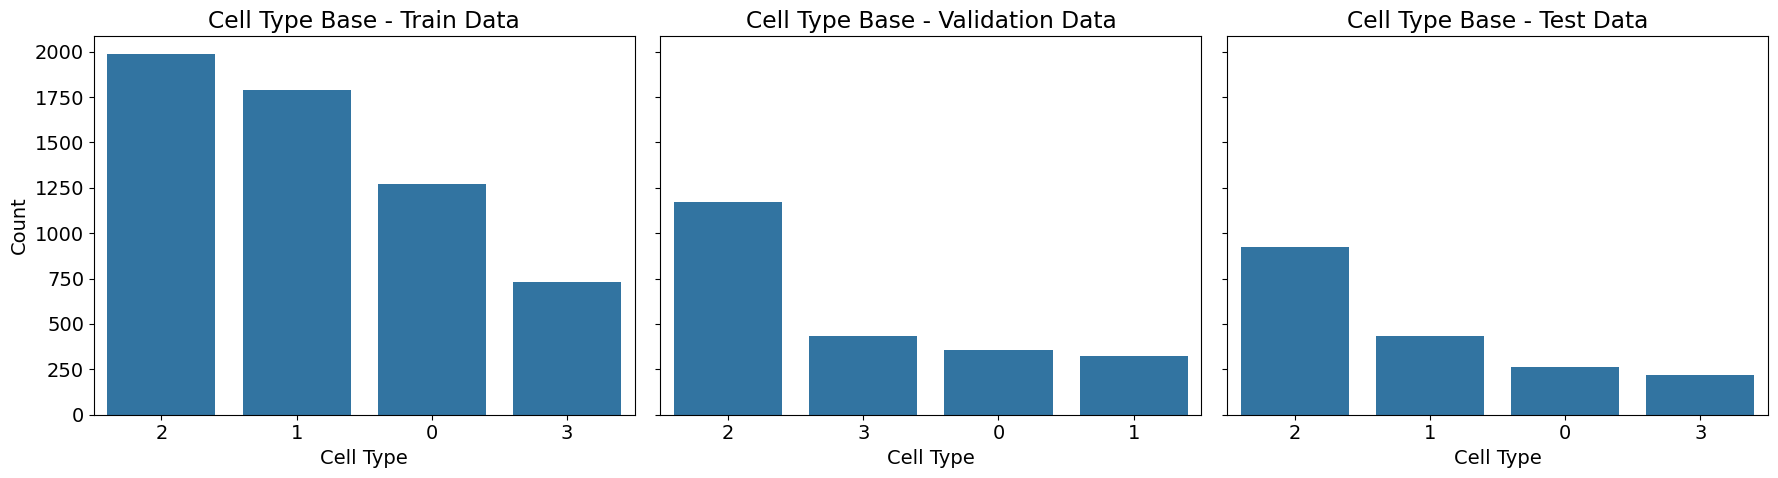

In [ ]:
print("\nCell Type Base Model - Logistic Regression: Splitting into Train, Validation, and Test sets (by patientID):")

# Unique patient IDs
cellType_unique_patients = cellType_base_main_data['patientID'].unique()

# Split patient IDs
cellType_base_train_patients, cellType_base_test_patients = train_test_split(
    cellType_unique_patients, test_size=0.2, random_state=42
)

# Further split
cellType_base_train_patients, cellType_base_val_patients = train_test_split(
    cellType_base_train_patients, test_size=0.25, random_state=42
)

# Create datasets
with pd.option_context('mode.chained_assignment', None):
    # Training set
    cellType_base_logistic_train_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_train_patients)
    ]
    # Validation set
    cellType_base_logistic_val_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_val_patients)
    ]
    # Test set
    cellType_base_logistic_test_data = cellType_base_main_data[
        cellType_base_main_data['patientID'].isin(cellType_base_test_patients)
    ]

# Print
print(f"Training data: {len(cellType_base_logistic_train_data)} samples from {len(cellType_base_train_patients)} patients")
print(f"Validation data: {len(cellType_base_logistic_val_data)} samples from {len(cellType_base_val_patients)} patients")
print(f"Test data: {len(cellType_base_logistic_test_data)} samples from {len(cellType_base_test_patients)} patients")

# Class distribution plots
print("\nCell Type Base Model: Class Distribution for Train, Validation, and Test sets:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Training
sns.countplot(
    data=cellType_base_logistic_train_data,
    x='cellType',
    order=cellType_base_logistic_train_data['cellType'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Cell Type Base - Train Data')
axes[0].set_xlabel('Cell Type')
axes[0].set_ylabel('Count')

# Validation
sns.countplot(
    data=cellType_base_logistic_val_data,
    x='cellType',
    order=cellType_base_logistic_val_data['cellType'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('Cell Type Base - Validation Data')
axes[1].set_xlabel('Cell Type')
axes[1].set_ylabel('')

# Test
sns.countplot(
    data=cellType_base_logistic_test_data,
    x='cellType',
    order=cellType_base_logistic_test_data['cellType'].value_counts().index,
    ax=axes[2]
)
axes[2].set_title('Cell Type Base - Test Data')
axes[2].set_xlabel('Cell Type')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [ ]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

print(tf.__version__)

2.11.0


In [ ]:
cellType_base_INPUT_DIM = (27, 27, 3)
cellType_base_HIDDEN_LAYER_DIM = 256
cellType_base_OUTPUT_CLASSES = 4

# MLP model
cellType_base_nn_mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=cellType_base_INPUT_DIM),  # Flatten image
    tf.keras.layers.Dense(cellType_base_HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(cellType_base_OUTPUT_CLASSES)
])

cellType_base_nn_mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class MultiCategoryF1Score(tf.keras.metrics.Metric):
    def __init__(self, num_category=4, average='weighted', name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.num_classes = num_category
        self.average = average
        self.confusion_matrix = self.add_weight(
            name="confusion_matrix", shape=(num_category, num_category),
            initializer="zeros", dtype=tf.float32
        )

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)
        current_confusion_matrix = tf.math.confusion_matrix(
            y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32
        )
        self.confusion_matrix.assign_add(current_confusion_matrix)

    def result(self):
        tp = tf.linalg.diag_part(self.confusion_matrix)
        fp = tf.reduce_sum(self.confusion_matrix, axis=0) - tp
        fn = tf.reduce_sum(self.confusion_matrix, axis=1) - tp

        precision_per_class = tp / (tp + fp + tf.keras.backend.epsilon())
        recall_per_class = tp / (tp + fn + tf.keras.backend.epsilon())

        if self.average == 'micro':
            precision = tf.reduce_sum(tp) / (tf.reduce_sum(tp) + tf.reduce_sum(fp))
            recall = tf.reduce_sum(tp) / (tf.reduce_sum(tp) + tf.reduce_sum(fn))
        elif self.average == 'macro':
            precision = tf.reduce_mean(precision_per_class)
            recall = tf.reduce_mean(recall_per_class)
        elif self.average == 'weighted':
            weights = tf.reduce_sum(self.confusion_matrix, axis=1)
            precision = tf.reduce_sum(precision_per_class * weights) / tf.reduce_sum(weights)
            recall = tf.reduce_sum(recall_per_class * weights) / tf.reduce_sum(weights)
        else:
            raise ValueError("Invalid average type. Accepted values are: 'micro', 'macro', 'weighted'")

        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.confusion_matrix.assign(tf.zeros_like(self.confusion_matrix))

class MultiPrecision(MultiCategoryF1Score):
    def __init__(self, num_category=4, average='weighted', name='precision', **kwargs):
        super().__init__(num_category, average, name, **kwargs)

    def result(self):
        tp = tf.linalg.diag_part(self.confusion_matrix)
        fp = tf.reduce_sum(self.confusion_matrix, axis=0) - tp
        precision_per_class = tp / (tp + fp + tf.keras.backend.epsilon())
        if self.average == 'micro':
            precision = tf.reduce_sum(tp) / (tf.reduce_sum(tp) + tf.reduce_sum(fp))
        elif self.average == 'macro':
            precision = tf.reduce_mean(precision_per_class)
        elif self.average == 'weighted':
            weights = tf.reduce_sum(self.confusion_matrix, axis=1)
            precision = tf.reduce_sum(precision_per_class * weights) / tf.reduce_sum(weights)
        else:
            raise ValueError("Invalid average type. Accepted values are: 'micro', 'macro', 'weighted'")
        return precision

class MultiRecall(MultiCategoryF1Score):
    def __init__(self, num_category=4, average='weighted', name='recall', **kwargs):
        super().__init__(num_category, average, name, **kwargs)

    def result(self):
        tp = tf.linalg.diag_part(self.confusion_matrix)
        fn = tf.reduce_sum(self.confusion_matrix, axis=1) - tp
        recall_per_class = tp / (tp + fn + tf.keras.backend.epsilon())
        if self.average == 'micro':
            recall = tf.reduce_sum(tp) / (tf.reduce_sum(tp) + tf.reduce_sum(fn))
        elif self.average == 'macro':
            recall = tf.reduce_mean(recall_per_class)
        elif self.average == 'weighted':
            weights = tf.reduce_sum(self.confusion_matrix, axis=1)
            recall = tf.reduce_sum(recall_per_class * weights) / tf.reduce_sum(weights)
        else:
            raise ValueError("Invalid average type. Accepted values are: 'micro', 'macro', 'weighted'")
        return recall

In [ ]:
cellType_base_nn_mlp_model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy',
            MultiPrecision(),
            MultiRecall(),
            MultiCategoryF1Score(num_category=4)])

### Cell Type Model - Logistic Regression (multi)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

# ImageDataGenerators
cellType_base_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
cellType_base_val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
cellType_base_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Convert cellType to string type (Doesn't work if you don't do this)
cellType_base_logistic_train_data['cellType'] = cellType_base_logistic_train_data['cellType'].astype(str)
cellType_base_logistic_val_data['cellType'] = cellType_base_logistic_val_data['cellType'].astype(str)
cellType_base_logistic_test_data['cellType'] = cellType_base_logistic_test_data['cellType'].astype(str)


# train generator
cellType_base_train_generator = cellType_base_train_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

# validation generator
cellType_base_val_generator = cellType_base_val_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

# test generator
cellType_base_test_generator = cellType_base_test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


In [ ]:
# Set number of epochs
epochs = 50

# Train the model
cellType_base_nn_mlp_history = cellType_base_nn_mlp_model.fit(
    cellType_base_train_generator,
    epochs=epochs,
    verbose=0,
    validation_data=cellType_base_val_generator
)

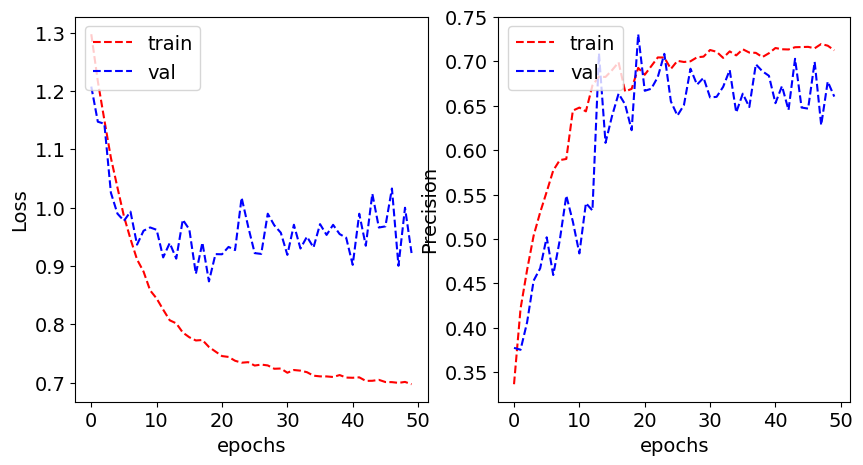

In [ ]:
plot_learning_curve(
    cellType_base_nn_mlp_history.history['loss'],
    cellType_base_nn_mlp_history.history['val_loss'],
    cellType_base_nn_mlp_history.history['precision'],
    cellType_base_nn_mlp_history.history['val_precision'],
    metric_name='Precision'
)

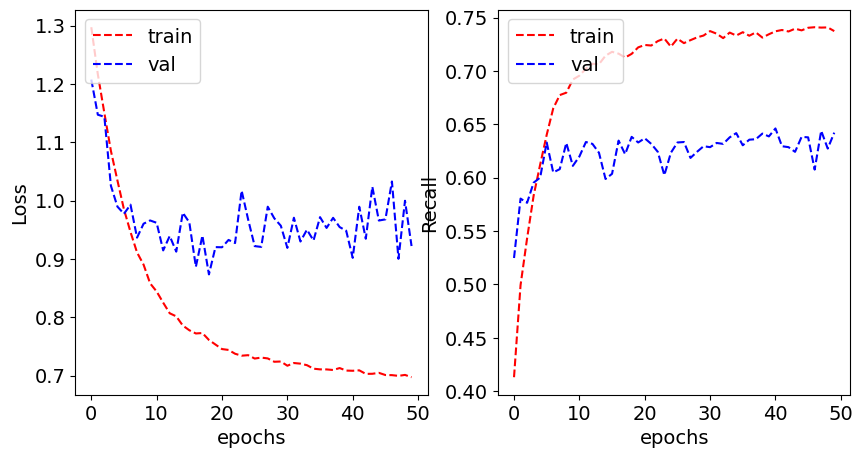

In [ ]:
plot_learning_curve(
    cellType_base_nn_mlp_history.history['loss'],
    cellType_base_nn_mlp_history.history['val_loss'],
    cellType_base_nn_mlp_history.history['recall'],
    cellType_base_nn_mlp_history.history['val_recall'],
    metric_name='Recall'
)

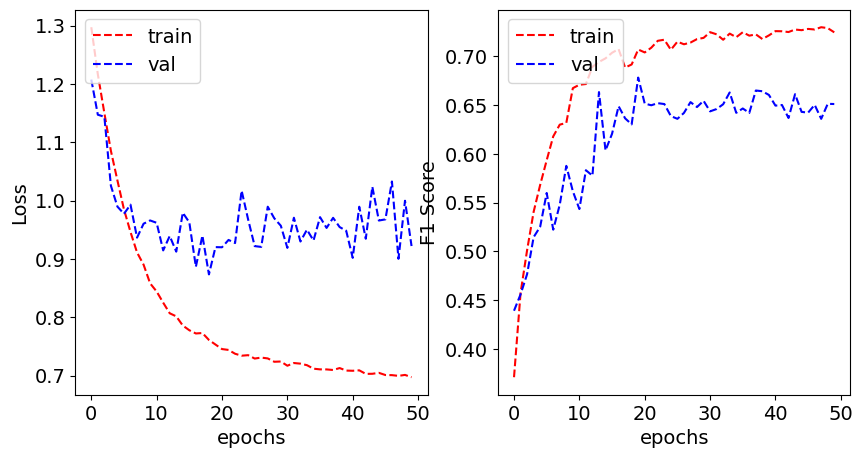

In [ ]:
plot_learning_curve(
    cellType_base_nn_mlp_history.history['loss'],
    cellType_base_nn_mlp_history.history['val_loss'],
    cellType_base_nn_mlp_history.history['f1_score'],
    cellType_base_nn_mlp_history.history['val_f1_score'],
    metric_name='F1 Score'
)

Above prepares the data for processing. Image data generators is used. TALK MORE ABOUT THIS IN ANALYSIS

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(model, test_generator, class_names):
    y_true = []
    y_pred = []

    # Get labels and predictions batch by batch
    for i in range(len(test_generator)):
        x_batch, y_batch = test_generator[i]
        preds = model.predict(x_batch, verbose=0)
        y_true.append(y_batch)
        y_pred.append(preds)

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    n_classes = len(class_names)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC for {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


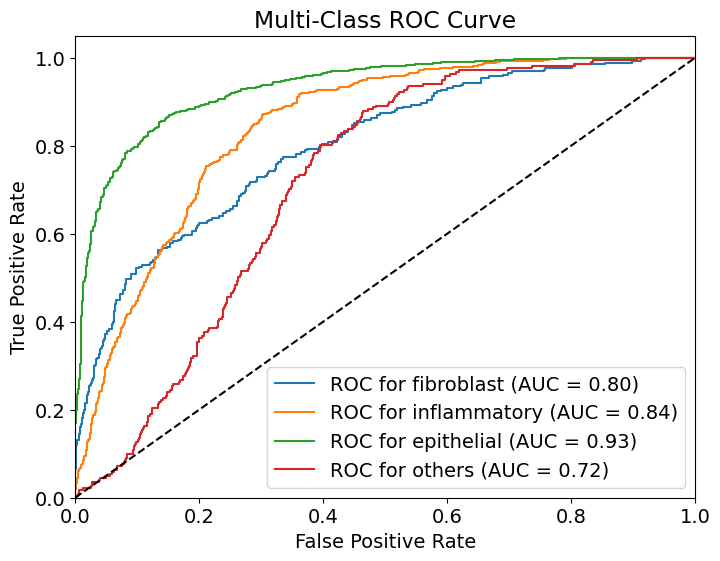

In [ ]:
plot_multiclass_roc(
    cellType_base_nn_mlp_model,
    cellType_base_test_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

58/58 [==============================] - 0s 6ms/step


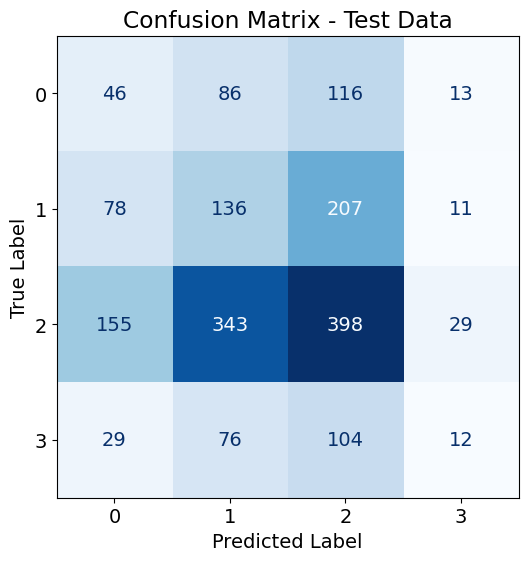

181/181 [==============================] - 1s 6ms/step


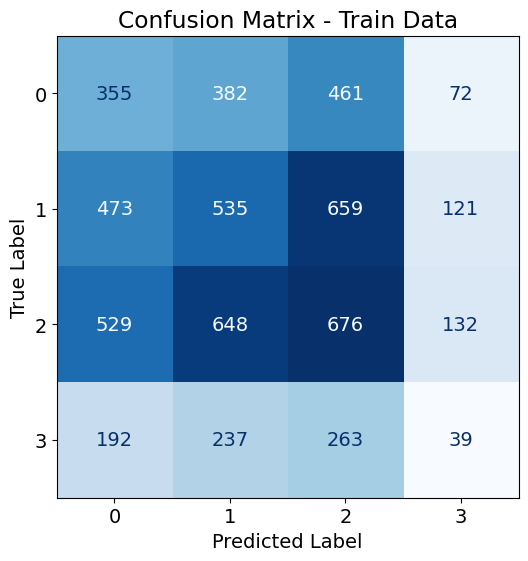

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_test = cellType_base_test_generator.classes
y_pred_probs_test = cellType_base_nn_mlp_model.predict(cellType_base_test_generator)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
class_names = list(cellType_base_test_generator.class_indices.keys())

# confusion matrix Test
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_true_train = cellType_base_train_generator.classes
y_pred_probs_train = cellType_base_nn_mlp_model.predict(cellType_base_train_generator)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

# confusion matrix train
cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Write analysis later

Points to discuss
- Val is better than Train (underfitting)
- Low precision recall
- ROC curve look sgood but loss and metrics dont converge
- Model is learning patterns

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

cellType_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 1839 validated image filenames belonging to 4 classes.


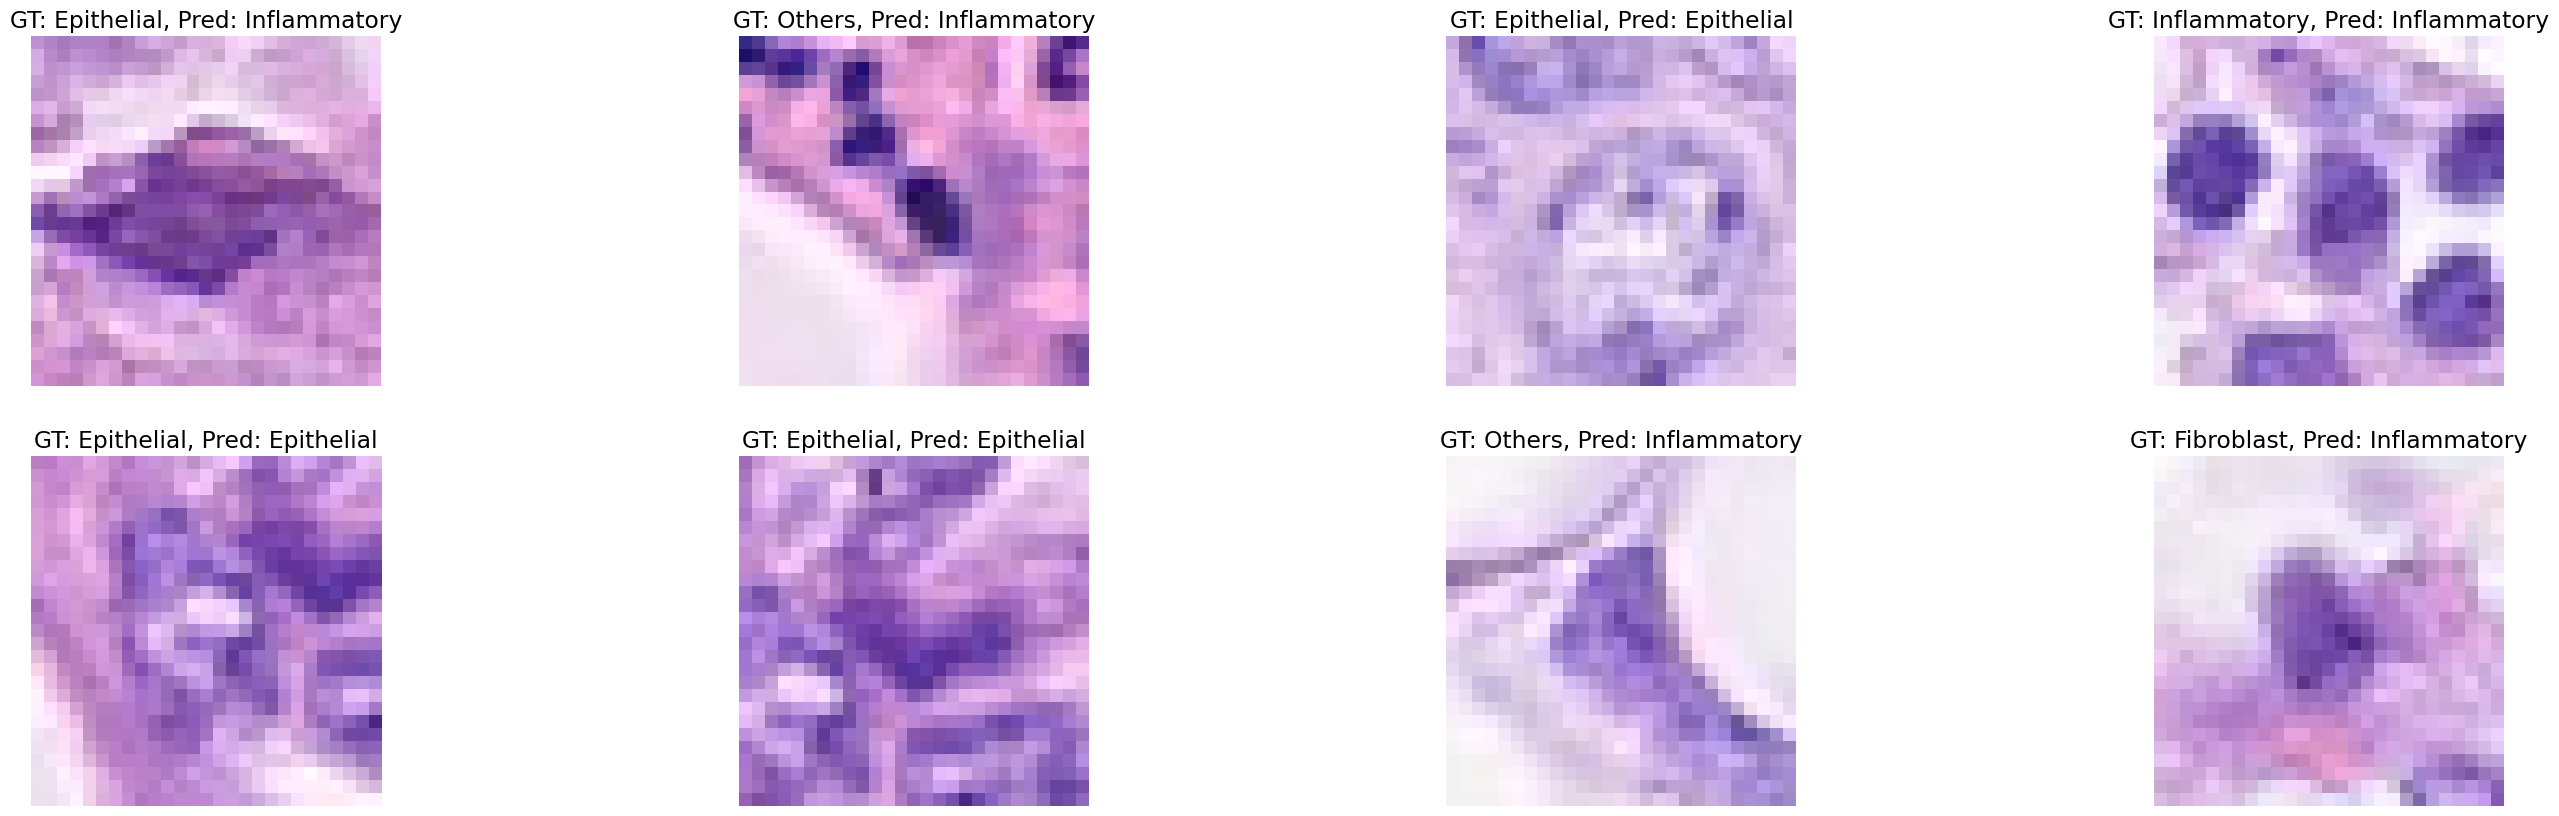

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}

# Create inverse mapping
d_inv = {v: k for k, v in cellType_label_names.items()}

# Plot model predictions on test data
plt.figure(figsize=(35, 10))
batches = 0

for x, y in cellType_base_nn_mlp_test_generator:
    batches += 1
    y_hat = cellType_base_nn_mlp_model.predict(x, verbose=0)
    x_img = np.squeeze(x)

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
    else:
        break
    plt.axis('off')

Talk about how they dont always get it right and then adapt

### Cell Type Model - Logistic Regression (multi) With tuning

In [ ]:
cellType_base_nn_mlp_model_tuned = tf.keras.Sequential([
    # Flatten the 27x27x3 input
    tf.keras.layers.Flatten(input_shape=(27, 27, 3)),

    # First dense block
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Second dense block
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer
    tf.keras.layers.Dense(4, activation='softmax')
])

cellType_base_nn_mlp_model_tuned.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        MultiPrecision(),
        MultiRecall(),
        MultiCategoryF1Score(num_category=4)
    ]
)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_labels = cellType_base_logistic_train_data['cellType']

class_weight_dict = {
    0: 2,   # fibroblast
    1: 2,   # inflammatory
    2: 1,   # epithelial
    3: 3.5    # others
}
#confirm weight dictionary has been set correctly
print(class_weight_dict)

{0: 2, 1: 2, 2: 1, 3: 3.5}


In [ ]:
epochs = 50

history = cellType_base_nn_mlp_model_tuned.fit(
    cellType_base_train_generator,
    epochs=epochs,
    validation_data=cellType_base_val_generator,
    class_weight=class_weight_dict,
    verbose=0
)

58/58 [==============================] - 0s 7ms/step


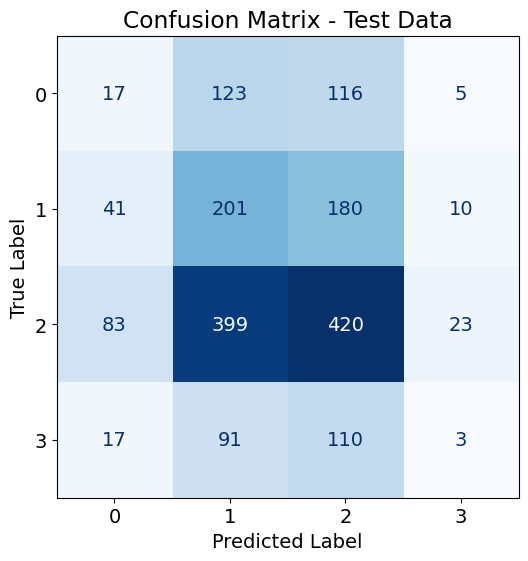

181/181 [==============================] - 1s 6ms/step


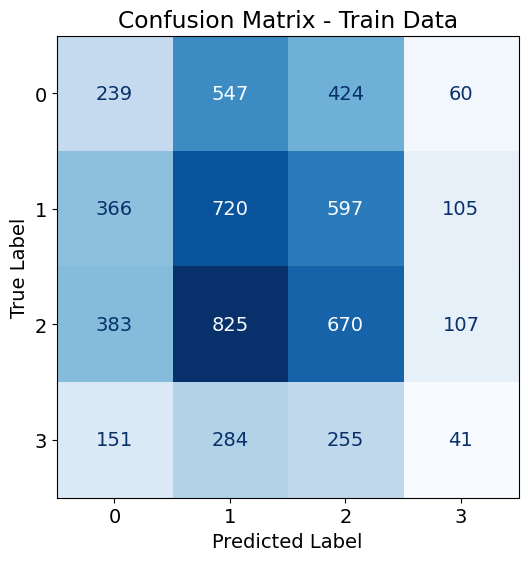

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_test = cellType_base_test_generator.classes
y_pred_probs_test = cellType_base_nn_mlp_model_tuned.predict(cellType_base_test_generator)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
class_names = list(cellType_base_test_generator.class_indices.keys())

# confusion matrix Test
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_test.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_true_train = cellType_base_train_generator.classes
y_pred_probs_train = cellType_base_nn_mlp_model_tuned.predict(cellType_base_train_generator)
y_pred_train = np.argmax(y_pred_probs_train, axis=1)

# confusion matrix train
cm_train = confusion_matrix(y_true_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

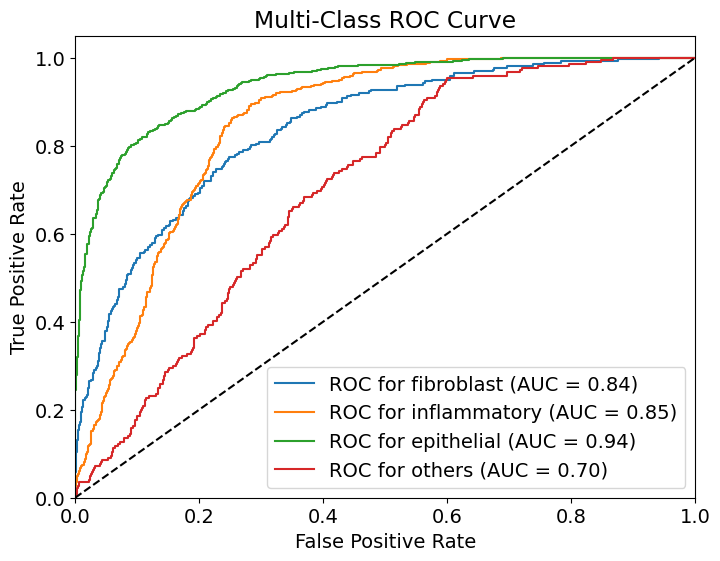

In [ ]:
plot_multiclass_roc(
    cellType_base_nn_mlp_model_tuned,
    cellType_base_test_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

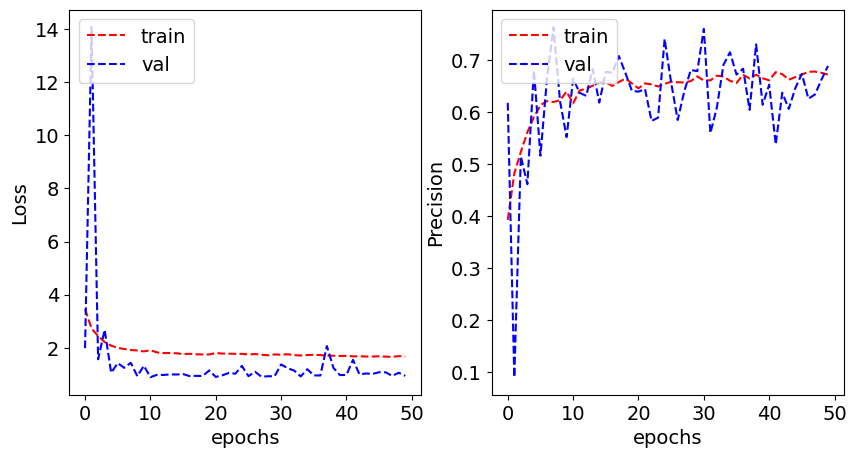

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['precision'],
    history.history['val_precision'],
    metric_name='Precision'
)

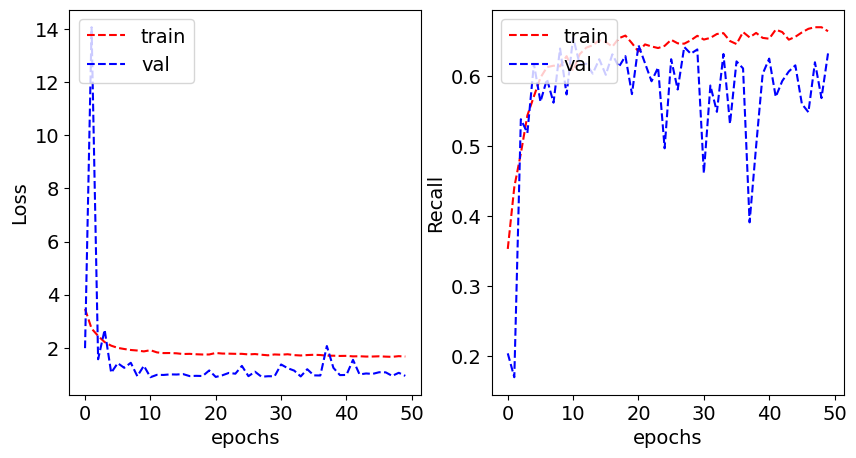

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['recall'],
    history.history['val_recall'],
    metric_name='Recall'
)

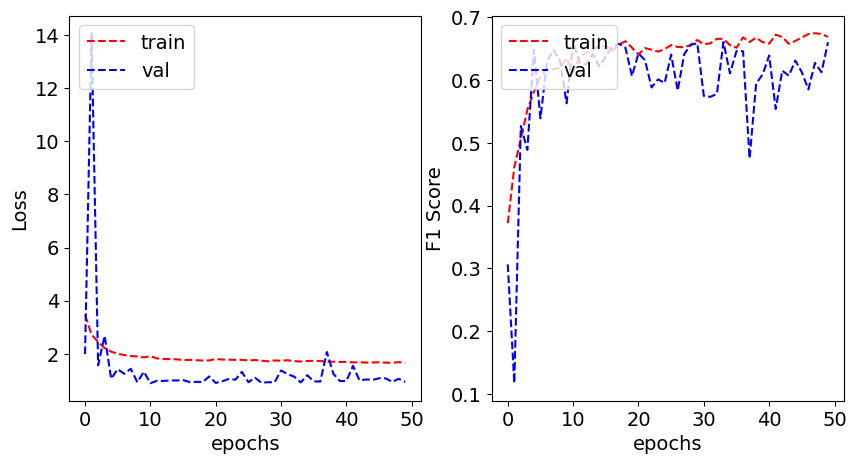

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['f1_score'],
    history.history['val_f1_score'],
    metric_name='F1 Score'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 1

cellType_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    seed=42
)

Found 1839 validated image filenames belonging to 4 classes.


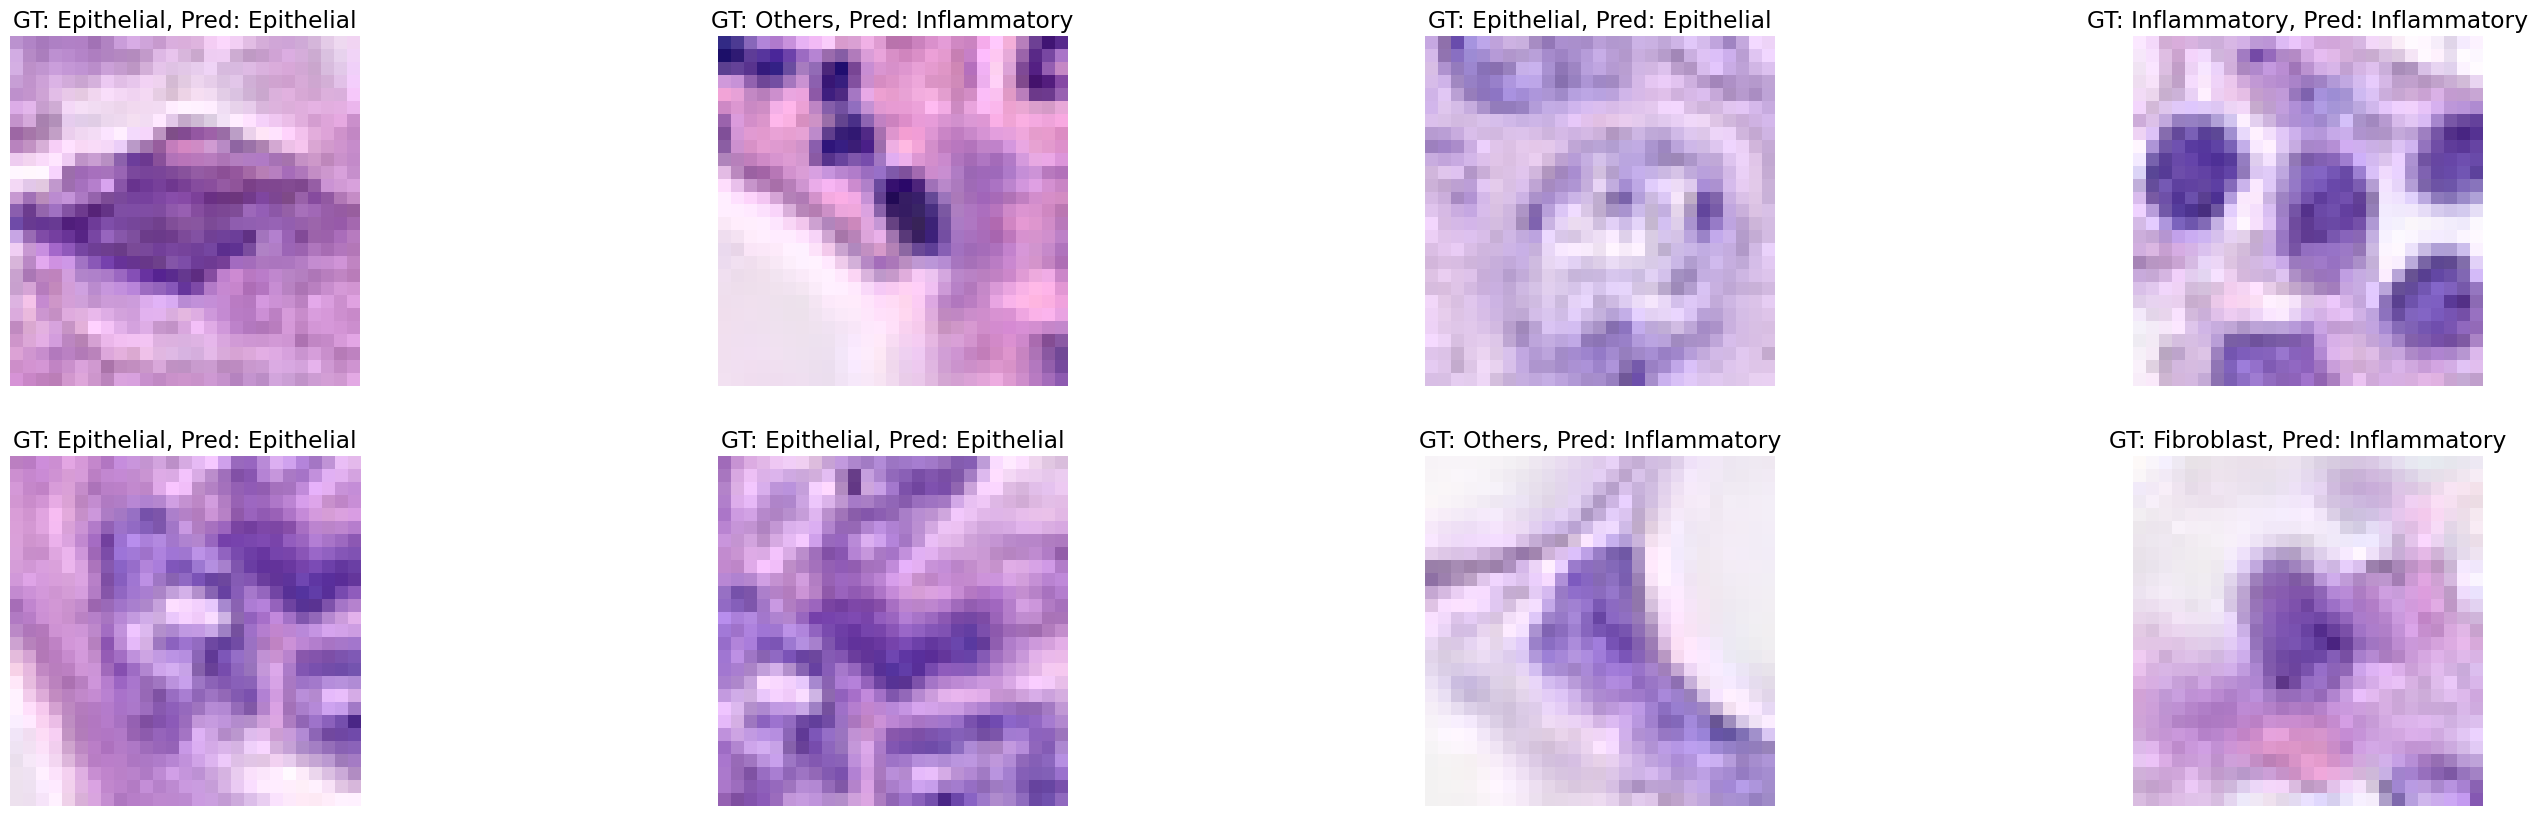

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

plt.figure(figsize=(35, 10))
batches = 0

for x, y in cellType_base_nn_mlp_test_generator:
    batches += 1
    y_hat = cellType_base_nn_mlp_model_tuned.predict(x, verbose=0)
    x_img = np.squeeze(x)

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

In [ ]:
from sklearn.metrics import classification_report

# Reset
cellType_base_nn_mlp_test_generator.reset()

# number of steps
steps = len(cellType_base_logistic_test_data)

y_true = []
y_pred_raw = []

# Collect predictions and true labels
for i in range(steps):
    x, y = next(cellType_base_nn_mlp_test_generator)
    y_hat = cellType_base_nn_mlp_model_tuned.predict(x, verbose=0)

    y_true.append(np.argmax(y[0]))
    y_pred_raw.append(np.argmax(y_hat[0]))

# Convert to arrays
y_true = np.array(y_true)
y_pred_class = np.array(y_pred_raw)

# Classification report
print(classification_report(y_true, y_pred_class, target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']))

              precision    recall  f1-score   support

  Fibroblast       0.57      0.34      0.43       261
Inflammatory       0.48      0.90      0.62       432
  Epithelial       0.89      0.80      0.84       925
      Others       0.24      0.05      0.08       221

    accuracy                           0.67      1839
   macro avg       0.55      0.52      0.49      1839
weighted avg       0.67      0.67      0.64      1839



Talk about it here

### Baseline Development - CNN for CellType

In [ ]:
INPUT_DIM = (27, 27, 3)
OUTPUT_CLASSES = 4  # Fibroblast, Inflammatory, Epithelial, Others

# Define CNN model
cellType_base_cnn_model = tf.keras.Sequential([

    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with softmax for multi-class classification
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile model
cellType_base_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        MultiCategoryF1Score(num_category=4)
    ]
)

# Show architecture
cellType_base_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale [0, 1]
datagen = ImageDataGenerator(rescale=1./255)

# Set batch size
batch_size = 32

# Training generator
train_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation generator
val_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_cellType_generator = datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_test_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.
Found 1839 validated image filenames belonging to 4 classes.


In [ ]:
epochs = 50

history_cnn_cellType = cellType_base_cnn_model.fit(train_cellType_generator,
    epochs=epochs,
    validation_data=val_cellType_generator,
    verbose=0
)

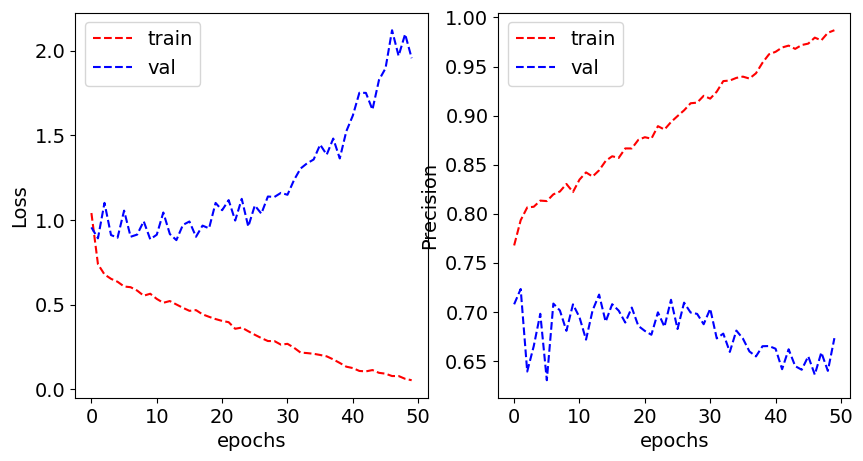

In [ ]:
plot_learning_curve(
    history_cnn_cellType.history['loss'],
    history_cnn_cellType.history['val_loss'],
    history_cnn_cellType.history['precision'],
    history_cnn_cellType.history['val_precision'],
    metric_name='Precision'
)

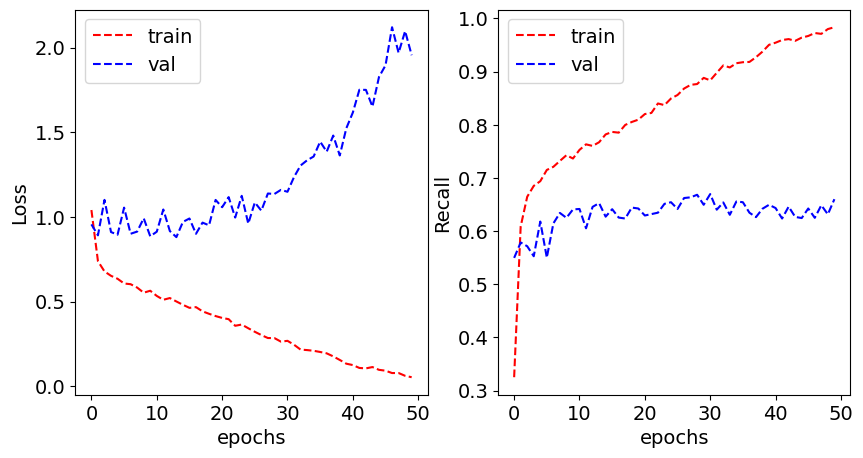

In [ ]:
plot_learning_curve(
    history_cnn_cellType.history['loss'],
    history_cnn_cellType.history['val_loss'],
    history_cnn_cellType.history['recall'],
    history_cnn_cellType.history['val_recall'],
    metric_name='Recall'
)

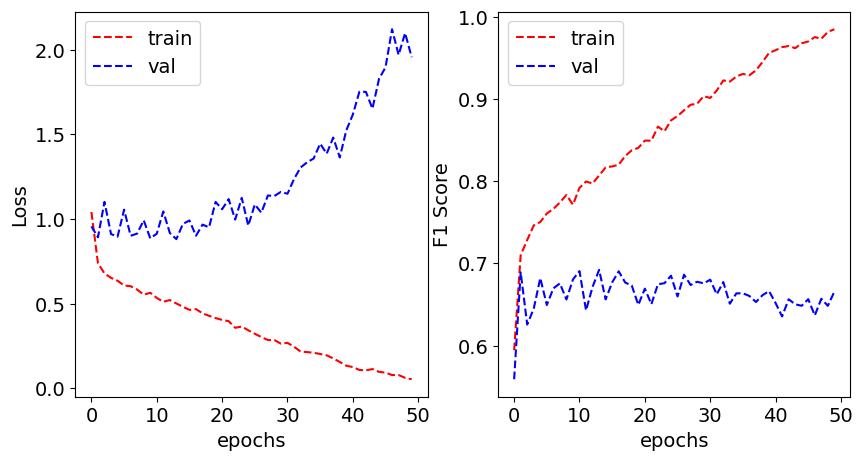

In [ ]:
plot_learning_curve(
    history_cnn_cellType.history['loss'],
    history_cnn_cellType.history['val_loss'],
    history_cnn_cellType.history['f1_score'],
    history_cnn_cellType.history['val_f1_score'],
    metric_name='F1 Score'
)

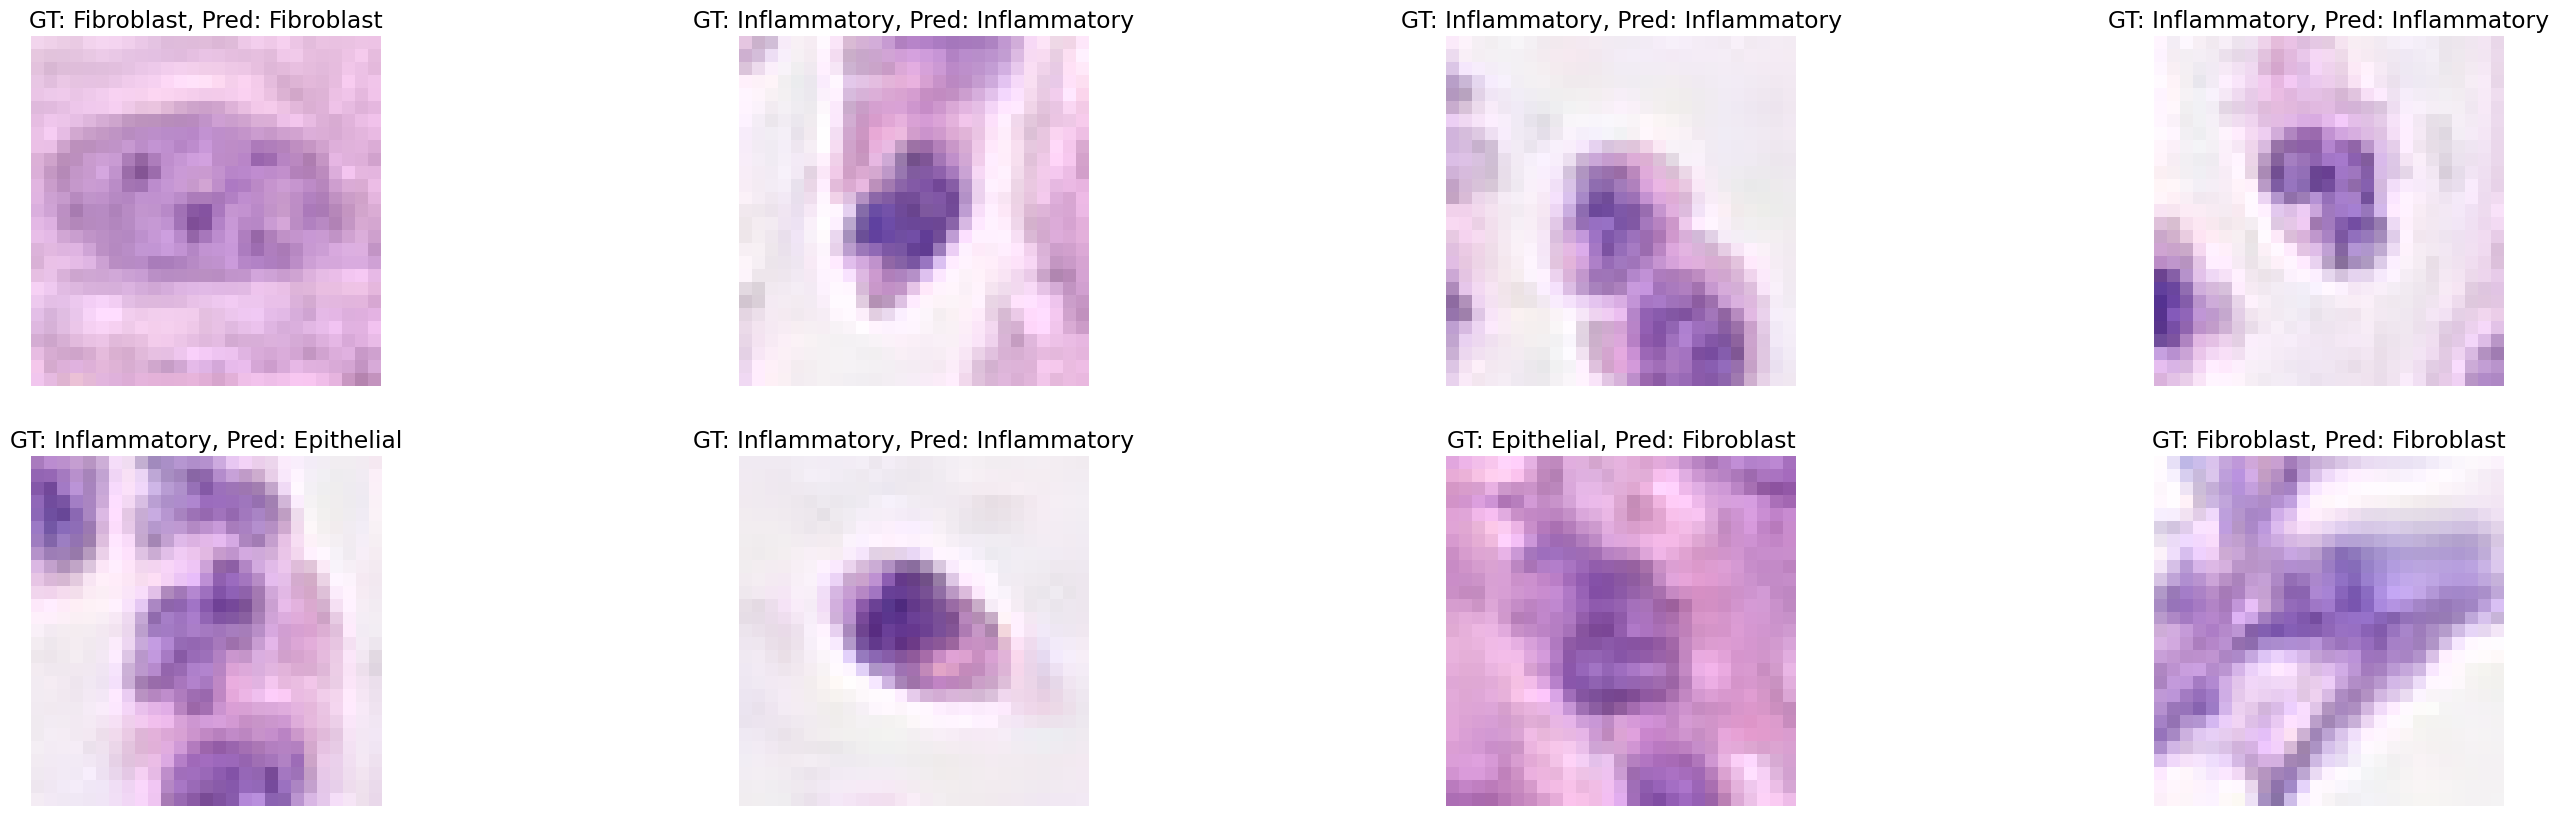

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator:
    batches += 1
    y_hat = cellType_base_cnn_model.predict(x, verbose=0)
    x_img = np.squeeze(x[0])  # take the first image in batch

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset
test_cellType_generator.reset()

# Calculate number of steps
steps = len(cellType_base_logistic_test_data) // batch_size
if len(cellType_base_logistic_test_data) % batch_size != 0:
    steps += 1

y_true = []
y_pred_raw = []

for i in range(steps):
    x_batch, y_batch = next(test_cellType_generator)
    y_hat = cellType_base_cnn_model.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

# lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert probabilities to class labels
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

print(classification_report(y_true_class, y_pred_class, target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']))

              precision    recall  f1-score   support

  Fibroblast       0.52      0.52      0.52       261
Inflammatory       0.54      0.71      0.62       432
  Epithelial       0.89      0.78      0.83       925
      Others       0.31      0.28      0.29       221

    accuracy                           0.67      1839
   macro avg       0.57      0.57      0.56      1839
weighted avg       0.68      0.67      0.67      1839



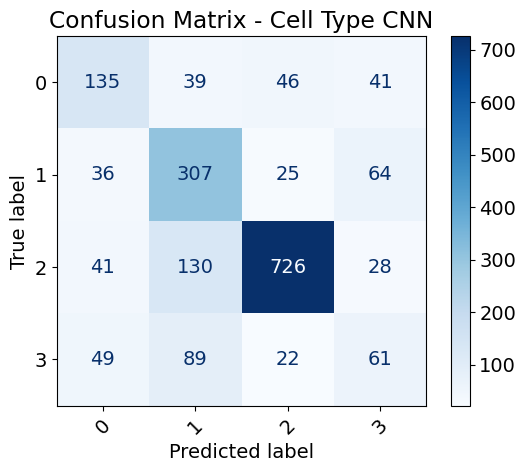

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Cell Type CNN')
plt.xticks(rotation=45)
plt.show()

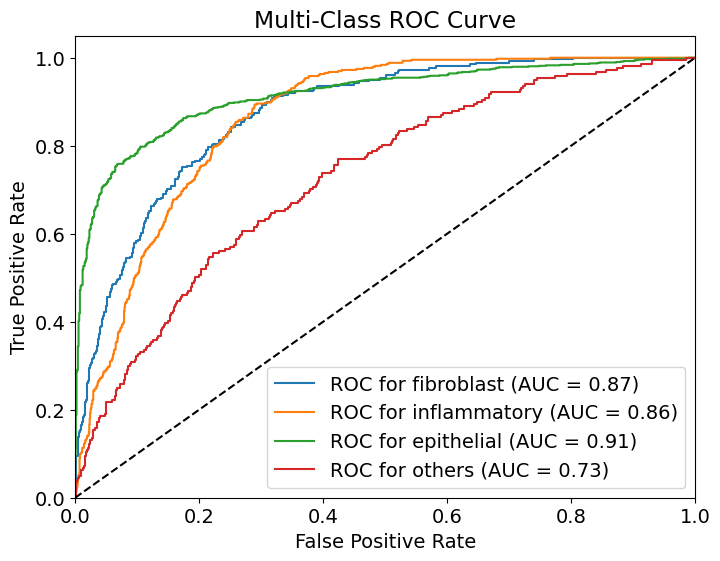

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model,
    test_cellType_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

### CNN - Tuned


In [ ]:
INPUT_DIM = (27, 27, 3)
NUM_CLASSES = 4

# Refined CNN model
cellType_base_cnn_model_tuned = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=INPUT_DIM),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten and Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Summary
cellType_base_cnn_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 27, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',

    # Geometric augmentations
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',

    # Colour augmentations
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last'
)

batch_size = 32

# Training data generator
train_cellType_generator = train_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_train_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation data generator
val_cellType_generator = val_datagen.flow_from_dataframe(
    dataframe=cellType_base_logistic_val_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 5774 validated image filenames belonging to 4 classes.
Found 2283 validated image filenames belonging to 4 classes.


In [ ]:
cellType_base_cnn_model_tuned.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        MultiCategoryF1Score(num_category=4)
    ]
)

In [ ]:
class_weight_dict = {
    0: 2.5,   # Fibroblast
    1: 1.8,   # Inflammatory
    2: 1.0,   # Epithelial
    3: 4.0    # Others
}

In [ ]:
epochs = 50

history_cnn_cellType_tuned = cellType_base_cnn_model_tuned.fit(
    train_cellType_generator,
    epochs=epochs,
    validation_data=val_cellType_generator,
    verbose=0,
    class_weight=class_weight_dict
)

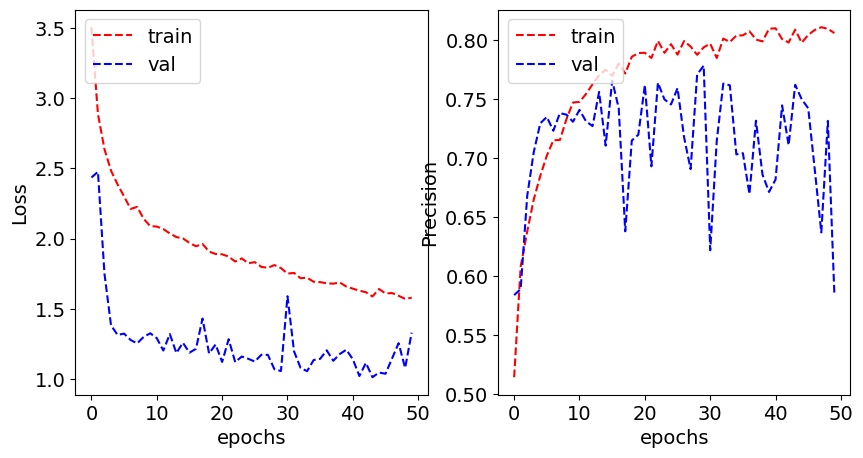

In [ ]:
plot_learning_curve(
    history_cnn_cellType_tuned.history['loss'],
    history_cnn_cellType_tuned.history['val_loss'],
    history_cnn_cellType_tuned.history['precision'],
    history_cnn_cellType_tuned.history['val_precision'],
    metric_name='Precision'
)

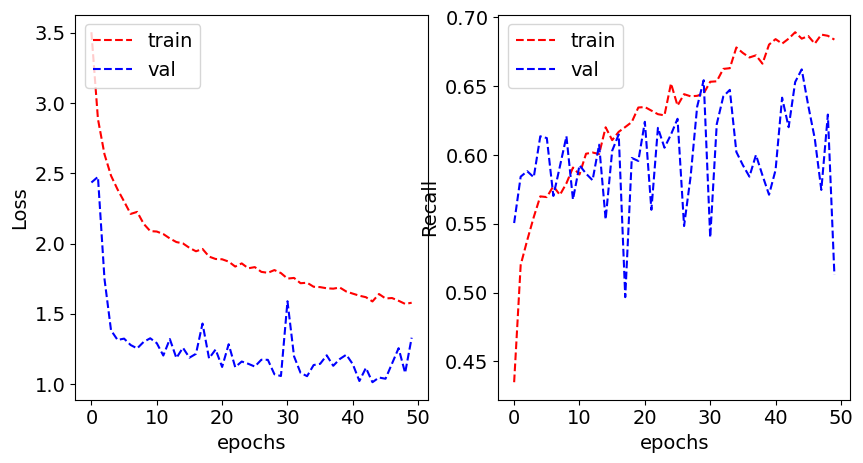

In [ ]:
plot_learning_curve(
    history_cnn_cellType_tuned.history['loss'],
    history_cnn_cellType_tuned.history['val_loss'],
    history_cnn_cellType_tuned.history['recall'],
    history_cnn_cellType_tuned.history['val_recall'],
    metric_name='Recall'
)

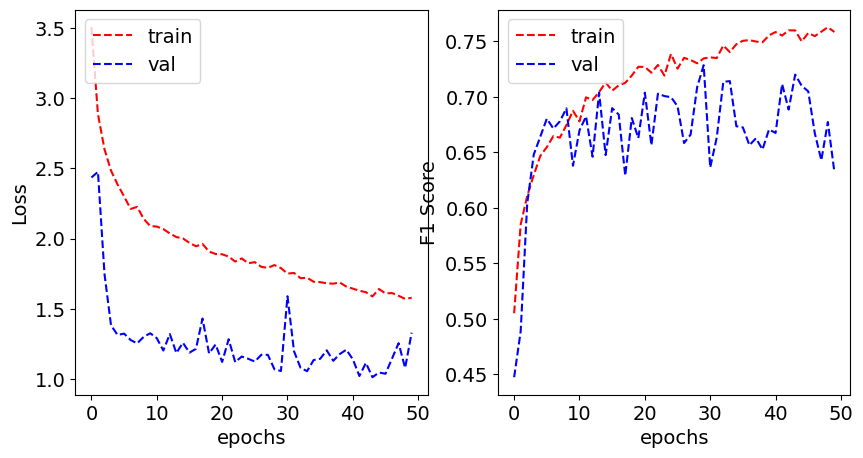

In [ ]:
plot_learning_curve(
    history_cnn_cellType_tuned.history['loss'],
    history_cnn_cellType_tuned.history['val_loss'],
    history_cnn_cellType_tuned.history['f1_score'],
    history_cnn_cellType_tuned.history['val_f1_score'],
    metric_name='F1 Score'
)

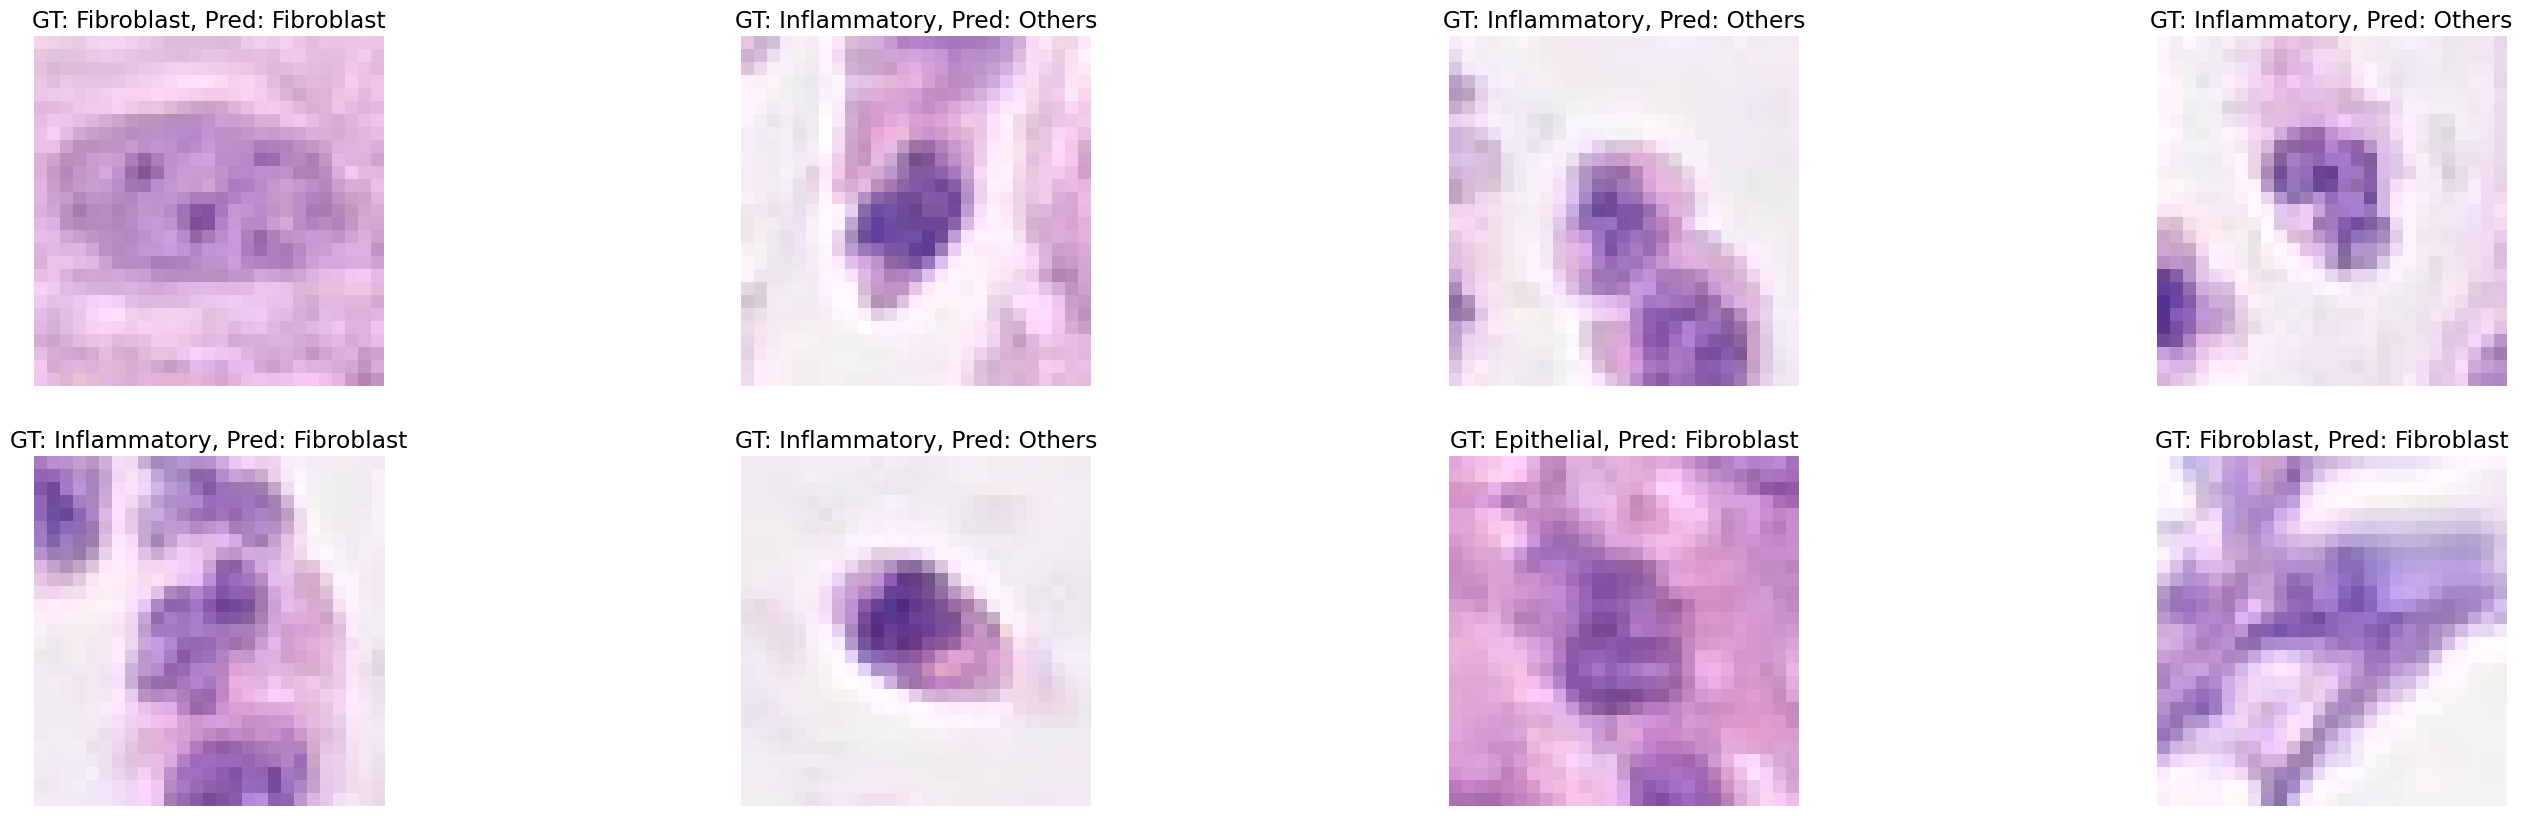

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator:
    batches += 1
    y_hat = cellType_base_cnn_model_tuned.predict(x, verbose=0)
    x_img = np.squeeze(x[0])  # take first image in batch

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break

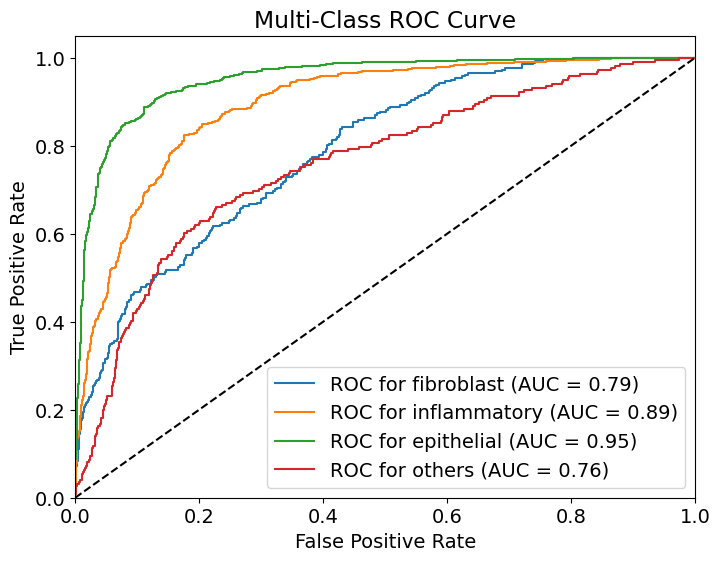

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model_tuned,
    test_cellType_generator,
    class_names=['fibroblast', 'inflammatory', 'epithelial', 'others']
)

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset
test_cellType_generator.reset()

steps = len(cellType_base_logistic_test_data) // batch_size
if len(cellType_base_logistic_test_data) % batch_size != 0:
    steps += 1

# Collect predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x_batch, y_batch = next(test_cellType_generator)
    y_hat = cellType_base_cnn_model_tuned.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert to class labels0
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

# Print classification report
print(classification_report(
    y_true_class,
    y_pred_class,
    target_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']
))

              precision    recall  f1-score   support

  Fibroblast       0.31      0.56      0.40       261
Inflammatory       0.80      0.25      0.38       432
  Epithelial       0.98      0.39      0.56       925
      Others       0.20      0.77      0.32       221

    accuracy                           0.43      1839
   macro avg       0.57      0.49      0.41      1839
weighted avg       0.75      0.43      0.47      1839



Talk more here

### Extra Data Extension

In [ ]:
extra_data = pd.read_csv('data_labels_extraData.csv')

In [ ]:
predict_datagen = ImageDataGenerator(rescale=1./255)

predict_cellType_generator = predict_datagen.flow_from_dataframe(
    dataframe=extra_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col= None,
    target_size=(27, 27),
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 10384 validated image filenames.


In [ ]:
import numpy as np

# Predict using the trained CNN model
predictions = cellType_base_cnn_model_tuned.predict(predict_cellType_generator, verbose=1)

# Get predicted class
predicted_class_indices = np.argmax(predictions, axis=1)

class_names = ['fibroblast', 'inflammatory', 'epithelial', 'others']
predicted_class_names = [class_names[i] for i in predicted_class_indices]

extra_data['cellType'] = predicted_class_indices
extra_data['cellTypeName'] = predicted_class_names

if 'predicted_class_index' in extra_data.columns:
    extra_data = extra_data.drop(columns=['predicted_class_index'])

# Save DataFrame
extra_data.to_csv('data_labels_extraData_predictions.csv', index=False)

325/325 [==============================] - 4s 11ms/step


In [ ]:
# Load the original and extra data
main_df = pd.read_csv("data_labels_mainData.csv")
extra_df = pd.read_csv("data_labels_extraData_predictions.csv")

combined_df = pd.concat([main_df, extra_df], ignore_index=True)

# Save combined dataset
combined_df.to_csv("data_labels_NewData.csv", index=False)

In [ ]:
import pandas as pd

cellType_base_main_data_new = pd.read_csv('data_labels_newData.csv')
print(cellType_base_main_data_new.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0



Cell Type Base Model - CNN (New Data): Splitting into Train, Validation, and Test sets (by patientID):
Training data: 11523 samples from 58 patients
Validation data: 4801 samples from 20 patients
Test data: 3956 samples from 20 patients

Cell Type Base CNN Model: Class Distribution for Train, Validation, and Test sets:


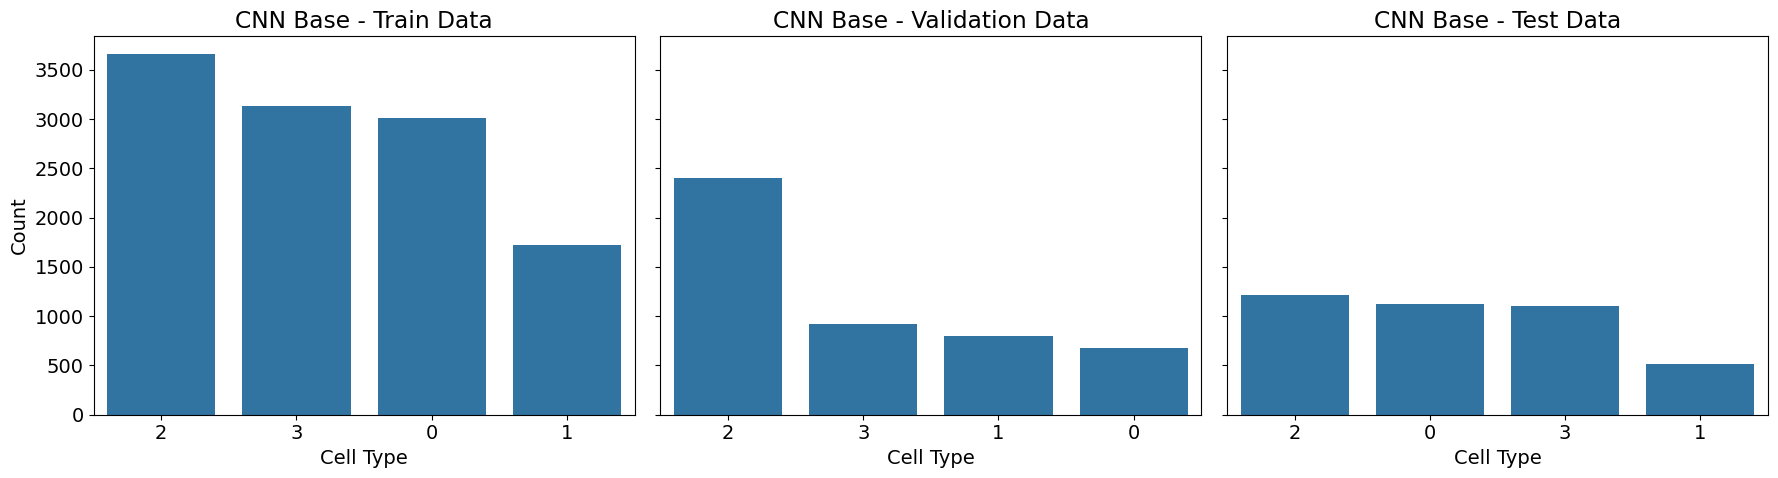

In [ ]:
print("\nCell Type Base Model - CNN (New Data): Splitting into Train, Validation, and Test sets (by patientID):")

# Unique
cellType_unique_patients = cellType_base_main_data_new['patientID'].unique()

# Split
cellType_base_train_patients, cellType_base_test_patients = train_test_split(
    cellType_unique_patients, test_size=0.2, random_state=42
)

# split into training and validation
cellType_base_train_patients, cellType_base_val_patients = train_test_split(
    cellType_base_train_patients, test_size=0.25, random_state=42
)

# Create splits
with pd.option_context('mode.chained_assignment', None):
    # Training set
    cellType_base_cnn_train_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_train_patients)
    ]
    # Validation set
    cellType_base_cnn_val_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_val_patients)
    ]
    # Test set
    cellType_base_cnn_test_data = cellType_base_main_data_new[
        cellType_base_main_data_new['patientID'].isin(cellType_base_test_patients)
    ]

# Print dataset sizes
print(f"Training data: {len(cellType_base_cnn_train_data)} samples from {len(cellType_base_train_patients)} patients")
print(f"Validation data: {len(cellType_base_cnn_val_data)} samples from {len(cellType_base_val_patients)} patients")
print(f"Test data: {len(cellType_base_cnn_test_data)} samples from {len(cellType_base_test_patients)} patients")

# Plot class distributions
print("\nCell Type Base CNN Model: Class Distribution for Train, Validation, and Test sets:")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Training
sns.countplot(
    data=cellType_base_cnn_train_data,
    x='cellType',
    order=cellType_base_cnn_train_data['cellType'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('CNN Base - Train Data')
axes[0].set_xlabel('Cell Type')
axes[0].set_ylabel('Count')

# Validation
sns.countplot(
    data=cellType_base_cnn_val_data,
    x='cellType',
    order=cellType_base_cnn_val_data['cellType'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('CNN Base - Validation Data')
axes[1].set_xlabel('Cell Type')
axes[1].set_ylabel('')

# Test
sns.countplot(
    data=cellType_base_cnn_test_data,
    x='cellType',
    order=cellType_base_cnn_test_data['cellType'].value_counts().index,
    ax=axes[2]
)
axes[2].set_title('CNN Base - Test Data')
axes[2].set_xlabel('Cell Type')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert cellType to string
cellType_base_cnn_train_data['cellType'] = cellType_base_cnn_train_data['cellType'].astype(str)
cellType_base_cnn_val_data['cellType'] = cellType_base_cnn_val_data['cellType'].astype(str)
cellType_base_cnn_test_data['cellType'] = cellType_base_cnn_test_data['cellType'].astype(str)

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Training generator
train_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_train_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation generator
val_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_val_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Test generator
test_cellType_generator_new = datagen.flow_from_dataframe(
    dataframe=cellType_base_cnn_test_data,
    directory='./patch_images/',
    x_col='ImageName',
    y_col='cellType',
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 11523 validated image filenames belonging to 4 classes.
Found 4801 validated image filenames belonging to 4 classes.
Found 3956 validated image filenames belonging to 4 classes.


In [ ]:
from keras.optimizers import Adam

INPUT_DIM = (27, 27, 3)
OUTPUT_CLASSES = 4  # fibroblast, inflammatory, epithelial, others

# Define CNN model
cellType_base_cnn_model_new = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])

# Compile model
cellType_base_cnn_model_new.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        MultiCategoryF1Score(num_category=4)
    ]
)

# Summary
cellType_base_cnn_model_new.summary()

# Train model
epochs = 50
history_cnn_cellType_new = cellType_base_cnn_model_new.fit(
    train_cellType_generator_new,
    epochs=epochs,
    validation_data=val_cellType_generator_new,
    verbose=0
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_13 (Dense)            (None, 64)               

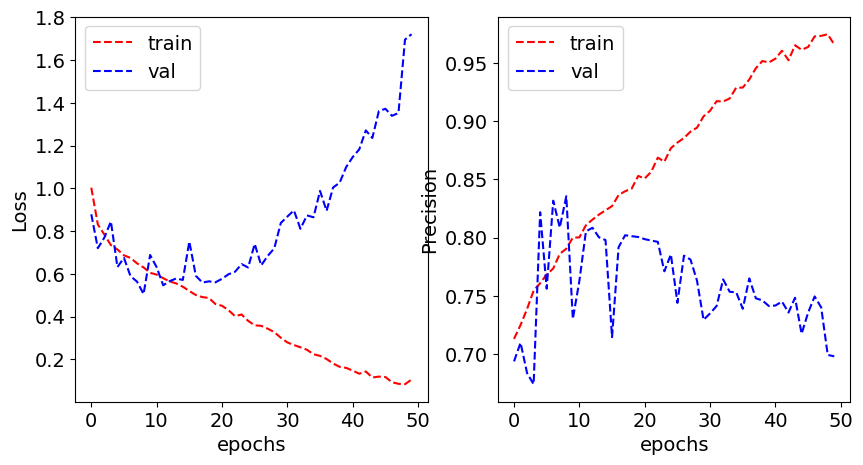

In [ ]:
plot_learning_curve(
    history_cnn_cellType_new.history['loss'],
    history_cnn_cellType_new.history['val_loss'],
    history_cnn_cellType_new.history['precision'],
    history_cnn_cellType_new.history['val_precision'],
    metric_name='Precision'
)

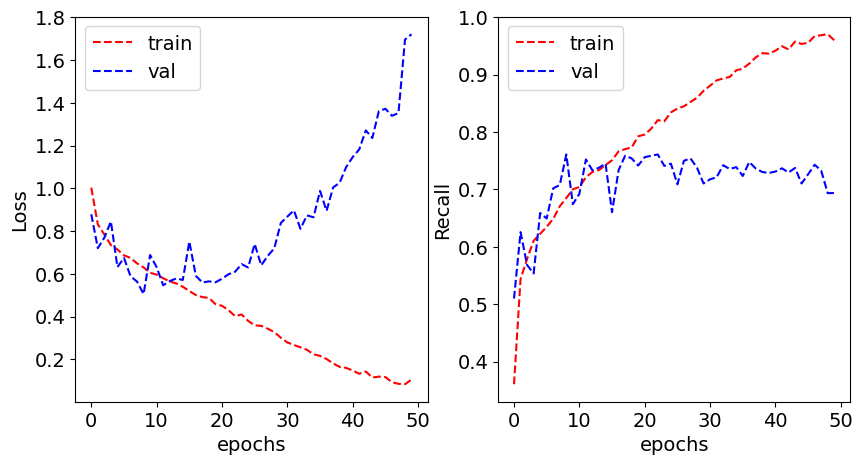

In [ ]:
plot_learning_curve(
    history_cnn_cellType_new.history['loss'],
    history_cnn_cellType_new.history['val_loss'],
    history_cnn_cellType_new.history['recall'],
    history_cnn_cellType_new.history['val_recall'],
    metric_name='Recall'
)

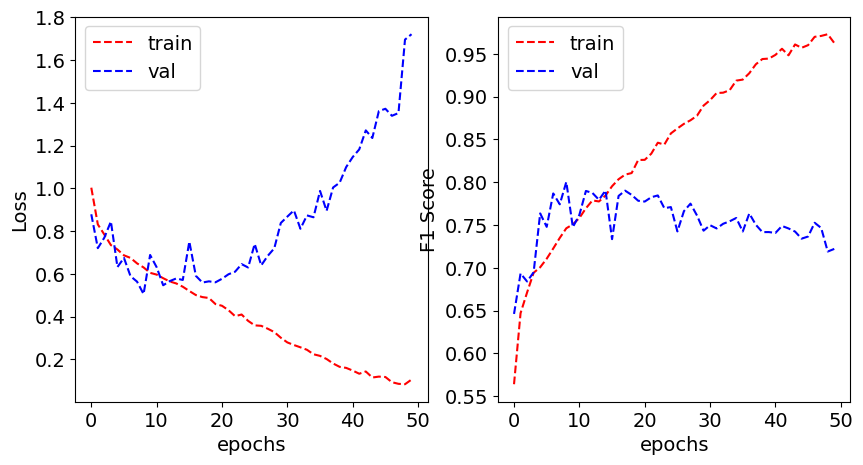

In [ ]:
plot_learning_curve(
    history_cnn_cellType_new.history['loss'],
    history_cnn_cellType_new.history['val_loss'],
    history_cnn_cellType_new.history['f1_score'],
    history_cnn_cellType_new.history['val_f1_score'],
    metric_name='F1 Score'
)

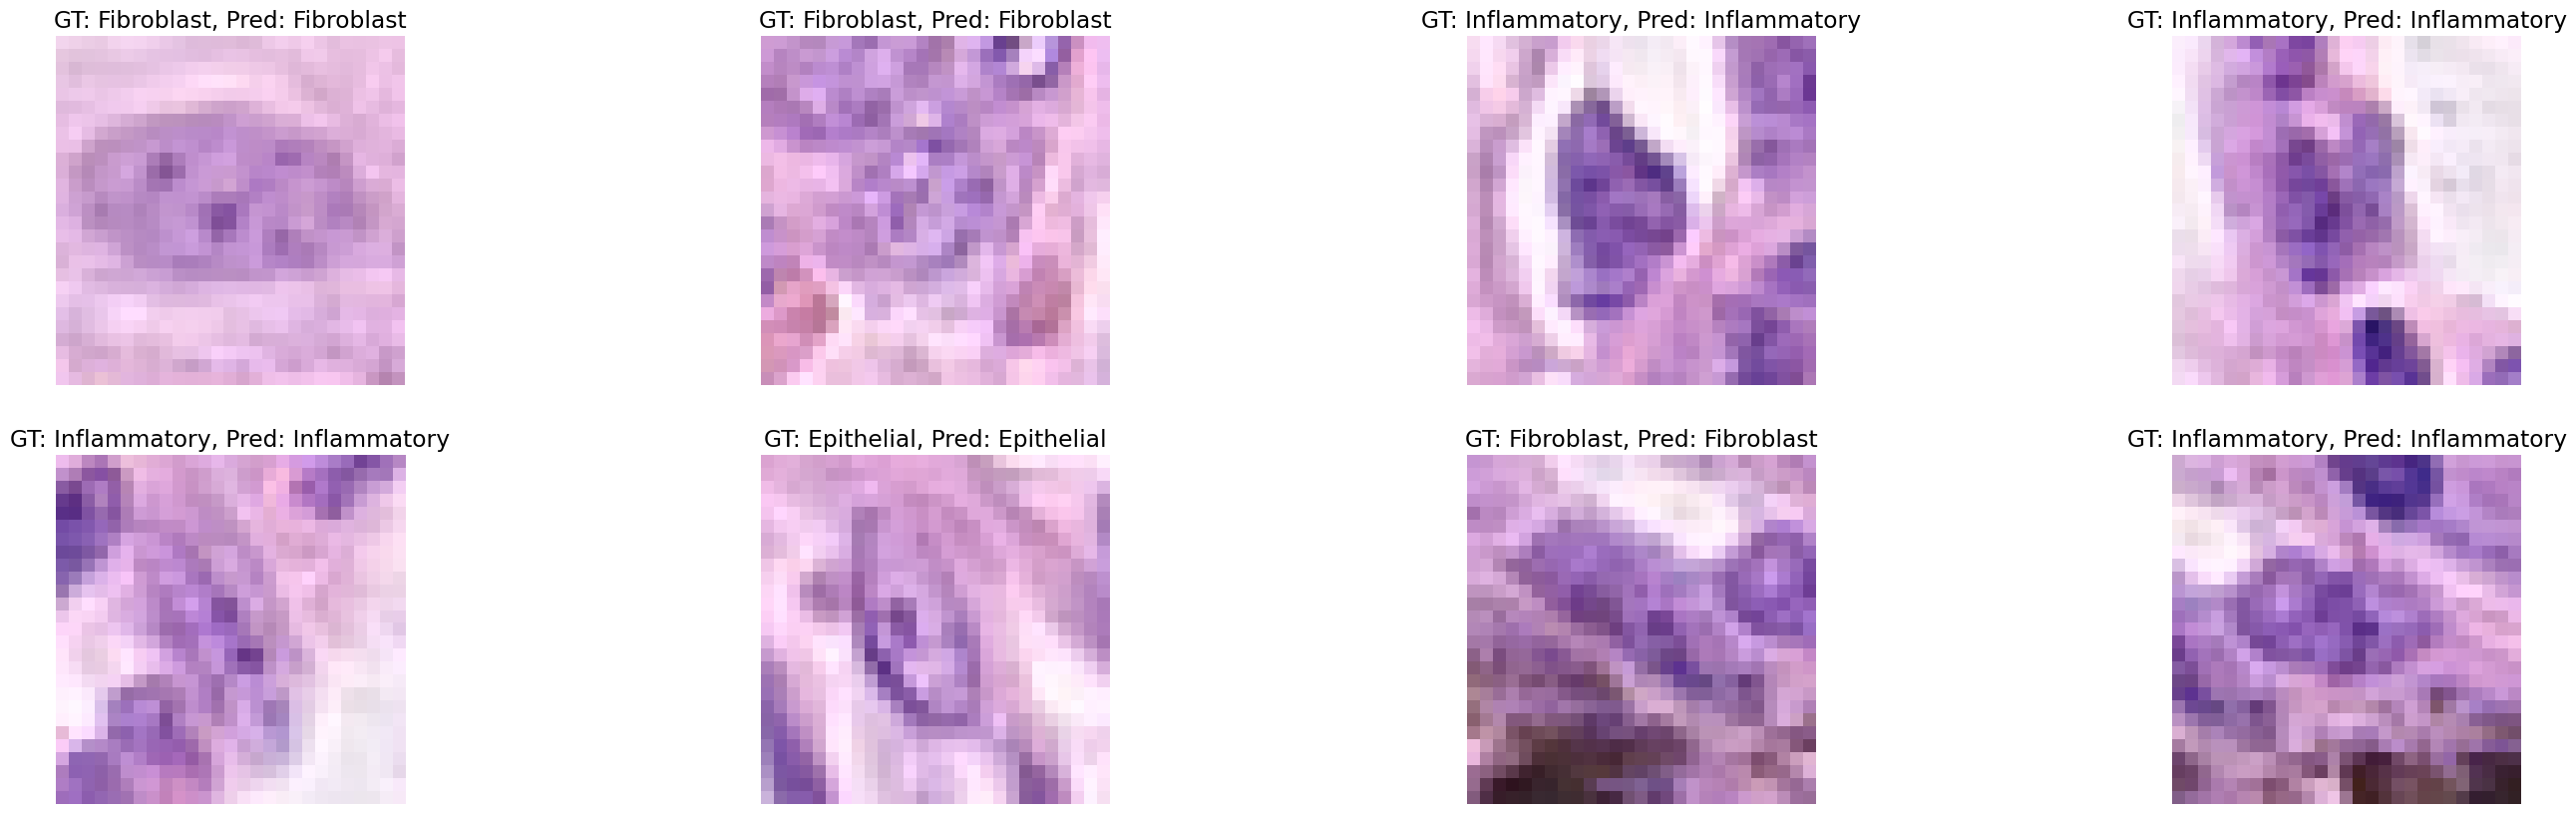

In [ ]:
cellType_label_names = {'Fibroblast': 0, 'Inflammatory': 1, 'Epithelial': 2, 'Others': 3}
d_inv = {v: k for k, v in cellType_label_names.items()}

# Visualize
plt.figure(figsize=(35, 10))
batches = 0

for x, y in test_cellType_generator_new:
    batches += 1
    y_hat = cellType_base_cnn_model.predict(x, verbose=0)
    x_img = np.squeeze(x[0])

    if batches <= 8:
        plt.subplot(2, 4, batches)
        plt.imshow(x_img)
        gt_label = d_inv[np.argmax(y[0])]
        pred_label = d_inv[np.argmax(y_hat[0])]
        plt.title(f"GT: {gt_label}, Pred: {pred_label}")
        plt.axis('off')
    else:
        break
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Reset
test_cellType_generator_new.reset()

# Calculate steps
steps = len(cellType_base_cnn_test_data) // batch_size
if len(cellType_base_cnn_test_data) % batch_size != 0:
    steps += 1

# Collect predictions
y_true = []
y_pred_raw = []

for _ in range(steps):
    x_batch, y_batch = next(test_cellType_generator_new)
    y_hat = cellType_base_cnn_model.predict(x_batch, verbose=0)

    y_true.extend(y_batch)
    y_pred_raw.extend(y_hat)

y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

# Convert to labels
y_pred_class = np.argmax(y_pred_raw, axis=1)
y_true_class = np.argmax(y_true, axis=1)

# Report
print(classification_report(y_true_class, y_pred_class, target_names=list(cellType_label_names.keys())))


              precision    recall  f1-score   support

  Fibroblast       0.92      0.54      0.68      1125
Inflammatory       0.43      0.93      0.59       516
  Epithelial       0.60      0.97      0.74      1214
      Others       0.79      0.16      0.26      1101

    accuracy                           0.62      3956
   macro avg       0.68      0.65      0.57      3956
weighted avg       0.72      0.62      0.57      3956



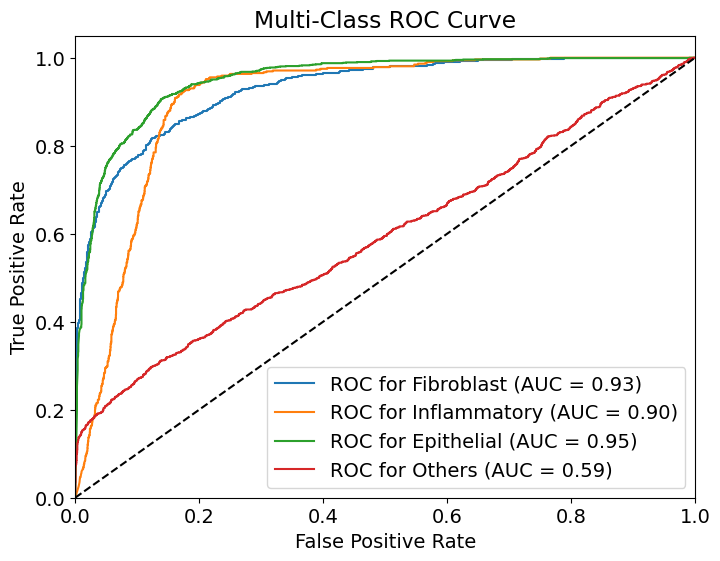

In [ ]:
plot_multiclass_roc(
    cellType_base_cnn_model,
    test_cellType_generator_new,
    class_names=['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']
)

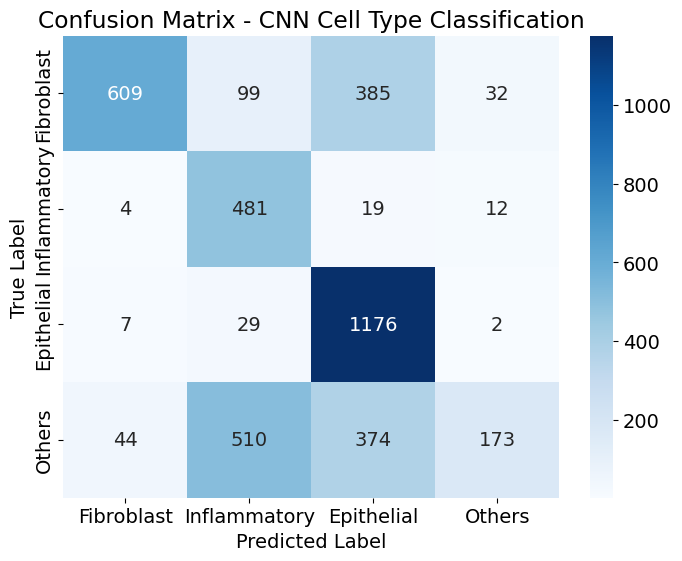

In [ ]:
cm = confusion_matrix(y_true_class, y_pred_class)

class_labels = ['Fibroblast', 'Inflammatory', 'Epithelial', 'Others']

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Cell Type Classification')
plt.show()

## Data Pre-Processing for Baseline isCancerous Model - Logistic Regression

#### Missing Value
- Based on EDA, There is no missing value

#### Remove ImageName Column
- ImageName is removed because logistic regression does not look at image content.

#### Encoding Categorical Data
- isCancerous Class Distribution Plot shows isCancerous is a nominal categorical variable and is already pre-processed as binary variable (0,1)
- cellTypeName vs cellType scatterplot shows CellType is a nominal categorical variable with no meaningful numerical relationship between different cell type numbering:
    - Apply one-hot encoding to CellType to avoid implying any numerical relationship between cell types

#### Remove Redudant Column
- cellTypeName vs cellType scatterplot shows Both CellType and CellTypeName correspond to each other, hence we remove CellTypeName column because CellTypeName is a string variable and Logistic Regression cannot accept string data as input feature

In [ ]:
# Encoding Categorical Data
from sklearn.preprocessing import OneHotEncoder

#make a copy of mainColonCellFrame ofr isCancerous
isCancerous_logistic_mainColonCellFrame = mainColonCellFrame.copy()

# Remove ImageName
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop('ImageName', axis=1)

# Remove Redundant cellTypeName Column
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop('cellTypeName', axis=1)

# Create and fit the encoder
OneHotEncoder_cellType = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_cellType.fit(isCancerous_logistic_mainColonCellFrame[['cellType']])

isCancerous_logistic_mainColonCellFrame_cellType_onehot = OneHotEncoder_cellType.transform(isCancerous_logistic_mainColonCellFrame[['cellType']]).toarray()

# Add encoded columns to data
for i in range(len(OneHotEncoder_cellType.categories_[0])):
    category_name = f"cellType_{str(OneHotEncoder_cellType.categories_[0][i])}"
    isCancerous_logistic_mainColonCellFrame[category_name] = isCancerous_logistic_mainColonCellFrame_cellType_onehot[:,i]

# Drop original cellType cellType from data
isCancerous_logistic_mainColonCellFrame = isCancerous_logistic_mainColonCellFrame.drop(['cellType'], axis=1)

# display mainColonCellFrame
isCancerous_logistic_mainColonCellFrame.head()

InstanceID  patientID  isCancerous  cellType_0  cellType_1  cellType_2  cellType_3
0       22405          1            0         1.0         0.0         0.0         0.0
1       22406          1            0         1.0         0.0         0.0         0.0
2       22407          1            0         1.0         0.0         0.0         0.0
3       22408          1            0         1.0         0.0         0.0         0.0
4       22409          1            0         1.0         0.0         0.0         0.0

## Data Splitting Strategy

#### train-validation-test splits strategy by patientID
Reason:
- K-Fold Cross Validation splitting is not chosen due to CPU constraint as our computer does not have the CPU capacity to train classification models using cross validations
- Split by patientID to <font color='red'>Prevent data leakage</font>:
    - No patient has their cells split across different sets. Preserve independence between train, validation and test dataset
    - Training data contains samples from 36 patients (about 60% of all)
    - Validation data contains samples from 12 patients (about 20% of all)
    - Testing data contains samples from 12 patients (about 20% of all)
- Ensure models are extremely reliable through using test set for unbiased measure of trained model's performance on unseen data.
- Validation set assists in <font color='red'>parameter tunning</font> on model to improce performance since there is imbalance between cancerous and non-cancerous cell distirbution as shown in isCancerous class distribution. We can find a right balance between precision and recall using validation set while preserve data integrity
- Validation set assists in <font color='red'>prevent overffiting</font> when building complex multi-class classification model for cell types, which ensure model to be generalised well on unseen data


isCancerous Base Model - Logistic Regression: Data Splitting into Train, Validation and Test set (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients

isCanceours Model: Class Distribution for Train, Validation and Test set:


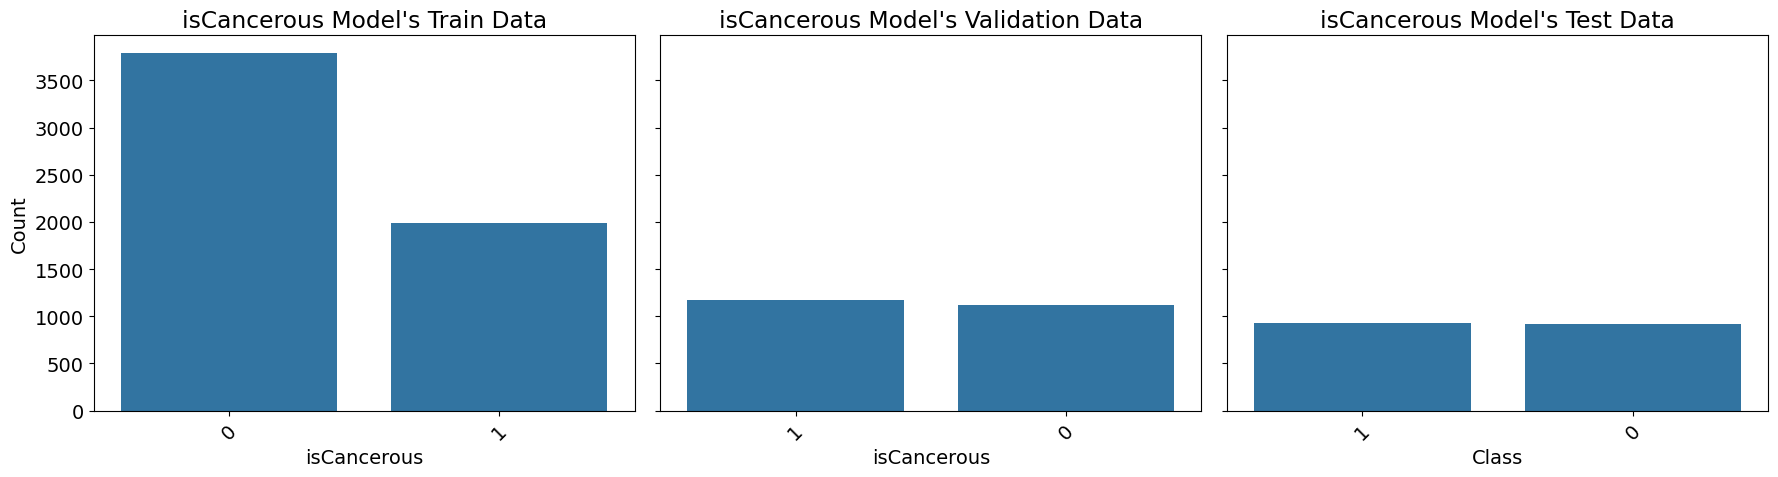

In [ ]:
# Data splitting - train-validation-test splits by patientID
print("\nisCancerous Base Model - Logistic Regression: Data Splitting into Train, Validation and Test set (by patientID):")

# Get unique patient IDs
isCancerous_unique_patients = isCancerous_logistic_mainColonCellFrame['patientID'].unique()

# Split patient IDs into train+val (80%) and test (20%)
isCancerous_train_patients, isCancerous_test_patients = train_test_split(isCancerous_unique_patients, test_size=0.2, random_state=42)

# Further split train+val into train (60% of total) and validation (20% of total)
isCancerous_train_patients, isCancerous_val_patients = train_test_split(isCancerous_train_patients, test_size=0.25, random_state=42)

# Create datasets based on patient assignment
with pd.option_context('mode.chained_assignment', None):
    # Assign samples to datasets based on which set their patient ID belongs to
    isCancerous_logisitic_regression_train_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_train_patients)]
    isCancerous_logisitic_regression_val_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_val_patients)]
    isCancerous_logisitic_regression_test_data = isCancerous_logistic_mainColonCellFrame[isCancerous_logistic_mainColonCellFrame['patientID'].isin(isCancerous_test_patients)]

print(f"Training data: {len(isCancerous_logisitic_regression_train_data)} samples from {len(isCancerous_train_patients)} patients")
print(f"Validation data: {len(isCancerous_logisitic_regression_val_data)} samples from {len(isCancerous_val_patients)} patients")
print(f"Test data: {len(isCancerous_logisitic_regression_test_data)} samples from {len(isCancerous_test_patients)} patients")

print("\nisCanceours Model: Class Distribution for Train, Validation and Test set:")
# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Class distribution for Training Data
sns.countplot(data=isCancerous_logisitic_regression_train_data, x='isCancerous', order=isCancerous_logisitic_regression_train_data['isCancerous'].value_counts().index, ax=axes[0])
axes[0].set_title('isCancerous Model\'s Train Data')
axes[0].set_xlabel('isCancerous')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Class distribution for Validation Data
sns.countplot(data=isCancerous_logisitic_regression_val_data, x='isCancerous', order=isCancerous_logisitic_regression_val_data['isCancerous'].value_counts().index, ax=axes[1])
axes[1].set_title('isCancerous Model\'s Validation Data')
axes[1].set_xlabel('isCancerous')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# Class distribution for Test Data
sns.countplot(data=isCancerous_logisitic_regression_test_data, x='isCancerous', order=isCancerous_logisitic_regression_test_data['isCancerous'].value_counts().index, ax=axes[2])
axes[2].set_title('isCancerous Model\'s Test Data')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### isCancerous Model's Class Distribution for Train, Validation and Test set
Reason:
- Shows class distribution of isCancerous cell in train, validation, and test sets

Observations:
- Train dataset contain class imbalance and that proper evaluation metrics should be chose for non-bias model training and evaluation
- test and validation dataset does not have the same amount of sample but has balanced class distirbution
- Confirm 60/20/20 split is used with train set has approx 6000 cells, and both validation and test sets have approx 2000 cells each.

## Performance Metrics Selection

### Performance Metrics Selection for all isCancerous Calssificiation Models

We use the following to evaluate all isCancerous models because of isCanceorus class imbalance:
- Macro Average Precision:
    - Measure how many predicted cancerous cases are actually cancerous while giving both classes an equal weight because of class imbalance.
- Macro Average Recall:
    - Measure model performance in identifying actual cancerous cases by calculate recall for each class separately before avergaing to ensure these cases are not missed due to class imbalanced.
- Macro Average F1-score:
    - Measure model's performance by taking account precision (False Positive) and recall (False Negative) while giving both classes an equal weight using macro average.
- Confusion matirx:
    - Illsurate counts for correct and incorrect cancerous and non-cancerous predictions
    - True Positive: actual Cancerous (1), predicted Cancerous (1)
    - False Positive: actual non-Cancerous (0), predicted Cancerous (1)
    - True Negative: actual non-Cancerous (0), predicted non-Cancerous (0)
    - False Negative: actual Cancerous (1), predicted non-Cancerous (0) - This is a concern
- ROC curve:
    - Evaluate performance using true and false positive rates at thresholds to select optimal point for identifying cancerous cell
    - Robust to isCancerous class imbalance
    - allow us to select Model with higher area under the ROC curve (AUC) because it performs better
- Accuracy is not used because:
    - isCancerous class imbalanced allow models achieve exteremly high accuracy by predicting non-Cancerous (majority) on all samples, and missing on actual Cancerous sample.
    - Accuracy weigh errors equally without taking class significane because False negatives (missed Cancerous samples) is a serious concern
    
Aim to achieve F1-score of 0.80 for isCancerous model because indicates the model achieved a good balance between precision and recall, which is important in cancer detection where false negatives (missed cancer cases) have serious consequences.

## Baseline development - Neural Network (MLP) for isCancerous

Neural Network (MLP) chosen as baseline model because:
- automatically learn and recognise complex patterns from raw image pixel values without manual feature engineering
- identify visual indicators of cancer with Sigmoid function in hidden layer because model can learn non-linear relationship
- establish performance benchmark to scale to CNN to improve performance
- Logistic Regression only suitable for linear decision boundaries that can miss visual indicators important for cancer detection in image
- Decision Tree cannot effectively model cancerous variations and placement in image, because feature space is parititoned using x,y axis

Input dimension: 27x27x3 because image is 27×27 with RGB values

Hidden layer: 256 neurons to balance efficiency and complexity to learn 2187 input values

Output class: 1 because this is binary classification

Sequential API because:
- build simple neural network (layers flow from input, hidden layers, and then output)
- MLP don't need complex input branchings

Sigmoid function because:
- smooth gradient to learn differences between cancerous/non-cancerous
- stabilise learning rate
- starting points for baseline

In [ ]:
# clone the repository to get the images locally
!git clone https://github.com/Strongsoon/machineLearning.git

Cloning into 'machineLearning'...
remote: Enumerating objects: 20580, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20580 (delta 7), reused 0 (delta 0), pack-reused 20565 (from 2)
Receiving objects: 100% (20580/20580), 51.93 MiB | 37.92 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Updating files: 100% (20292/20292), done.


In [ ]:
# import all modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os


# read csv file
mainColonCellFrame = pd.read_csv('./machineLearning/data_labels_mainData.csv', delimiter=',')

In [ ]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

print(tf.__version__)

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 1

isCancerous_base_nn_mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM), # transforms the format of the images from a two-dimensional array (of 27 by 27 pixels) to a one-dimensional array (of 27 * 27 * 3 = 2187 pixels)
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

isCancerous_base_nn_mlp_model.summary()

2.18.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2187)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       560,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,385 (2.14 MB)

 Trainable params: 560,385 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Flatten Layer:
- Flattening image into 1D vector (2187 values)

Hidden Layer:
- 560128 parameters with sigmoid to constraints neuron outputs between 0 and 1

Output Layer:
- 257 parameters
- Need loss function handling when model training to handle class imbalance

### Compile Model

Binary Cross-Entropy Loss function because:
- computes cross-entropy loss between actual and predicted labels for binary classification tasks
- penalizes wrong predictions more heavily than less confident ones to reduced missed cancer

Adam Optimiser bacause:
- has features from AdaGrad and RMSprop to scale learning rate and use gradient's moving average to handle noise in image

In [ ]:
# f1-score
class f1Score(tf.keras.metrics.Metric):
  # Initialize the metric with a name and any additional arguments
    def __init__(self, name='f1_score', **kwargs):
       # Call parent class constructor with provided name and arguments
       super().__init__(name=name, **kwargs)
       # Create precision and recall metrics as internal components
       self.precision = tf.keras.metrics.Precision()
       self.recall = tf.keras.metrics.Recall()

   # Update the state of the metric with new predictions
    def update_state(self, y_true, y_pred, sample_weight=None):
       # Forward the update to both precision and recall metrics
       self.precision.update_state(y_true, y_pred, sample_weight)
       self.recall.update_state(y_true, y_pred, sample_weight)

   # Calculate the F1 score when requested
    def result(self):
       # Get the current precision and recall values
       p = self.precision.result()
       r = self.recall.result()
       # Calculate F1 score as the harmonic mean of precision and recall
       # Adding epsilon prevents division by zero
       return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

   # Reset the state of both precision and recall metrics
    def reset_state(self):
       # Clear accumulated values when starting a new epoch
       self.precision.reset_state()
       self.recall.reset_state()

# compile model
isCancerous_base_nn_mlp_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

### train-validation-test Splitting by patientID

Split by patientID to <font color='red'>Prevent data leakage</font>:
- No patient has their cells split across different sets
- Training: 36 patients (60%)
- Validation: 12 patients (20%)
- Testing: 12 patients (20%)

K-Fold Cross Validation splitting is not chosen because limited CPU capability on our computer

<font color='red'>Validation set assists in parameter tunning</font> to <font color='red'>prevent overffiting on cancerous class</font> because there is <font color='red'>imbalance class distribution</font>.
We find right balance between precision and recall using validation set while preserve data integrity

In [ ]:
# Data splitting - train-validation-test splits by patientID
print("\nisCancerous Base Model - Neural Network (MLP): Data Splitting into Train, Validation and Test set (by patientID):")

# make a copy
isCancerous_nn_mainColonCellFrame = mainColonCellFrame.copy()

# Get unique patient IDs
isCancerous_unique_patients = isCancerous_nn_mainColonCellFrame['patientID'].unique()

# Split patient IDs into train+val (80%) and test (20%)
isCancerous_train_patients, isCancerous_test_patients = train_test_split(isCancerous_unique_patients, test_size=0.2, random_state=42)

# Further split train+val into train (60% of total) and validation (20% of total)
isCancerous_train_patients, isCancerous_val_patients = train_test_split(isCancerous_train_patients, test_size=0.25, random_state=42)

# Create datasets based on patient assignment
with pd.option_context('mode.chained_assignment', None):
    # Assign samples to datasets based on which set their patient ID belongs to
    isCancerous_nn_train_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_train_patients)]
    isCancerous_nn_val_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_val_patients)]
    isCancerous_nn_test_data = isCancerous_nn_mainColonCellFrame[isCancerous_nn_mainColonCellFrame['patientID'].isin(isCancerous_test_patients)]

print(f"Training data: {len(isCancerous_nn_train_data)} samples from {len(isCancerous_train_patients)} patients")
print(f"Validation data: {len(isCancerous_nn_val_data)} samples from {len(isCancerous_val_patients)} patients")
print(f"Test data: {len(isCancerous_nn_test_data)} samples from {len(isCancerous_test_patients)} patients")


isCancerous Base Model - Neural Network (MLP): Data Splitting into Train, Validation and Test set (by patientID):
Training data: 5774 samples from 36 patients
Validation data: 2283 samples from 12 patients
Test data: 1839 samples from 12 patients


### Train Model

Convert isCancerous to String because  ```flow_from_dataframe``` require String labels

Use ```flow_from_dataframe``` load images from dataframe (ImageName contains the image filename)
- x: ImageName
- y: isCancerous

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_base_nn_mlp_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_nn_mlp_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-7-d1c861fbf8f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-7-d1c861fbf8f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')


In [ ]:
# train neural network model
history = isCancerous_base_nn_mlp_model.fit(isCancerous_base_nn_mlp_train_generator,
                                            validation_data = isCancerous_base_nn_mlp_validation_generator,
                                            epochs=50,
                                            verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


### Learning Curve

loss, precision, recall and f1 curves are lpot because to <font color='red'>identify overfitting/underfitting</font>.

We apply optimisation technique in advanced development.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

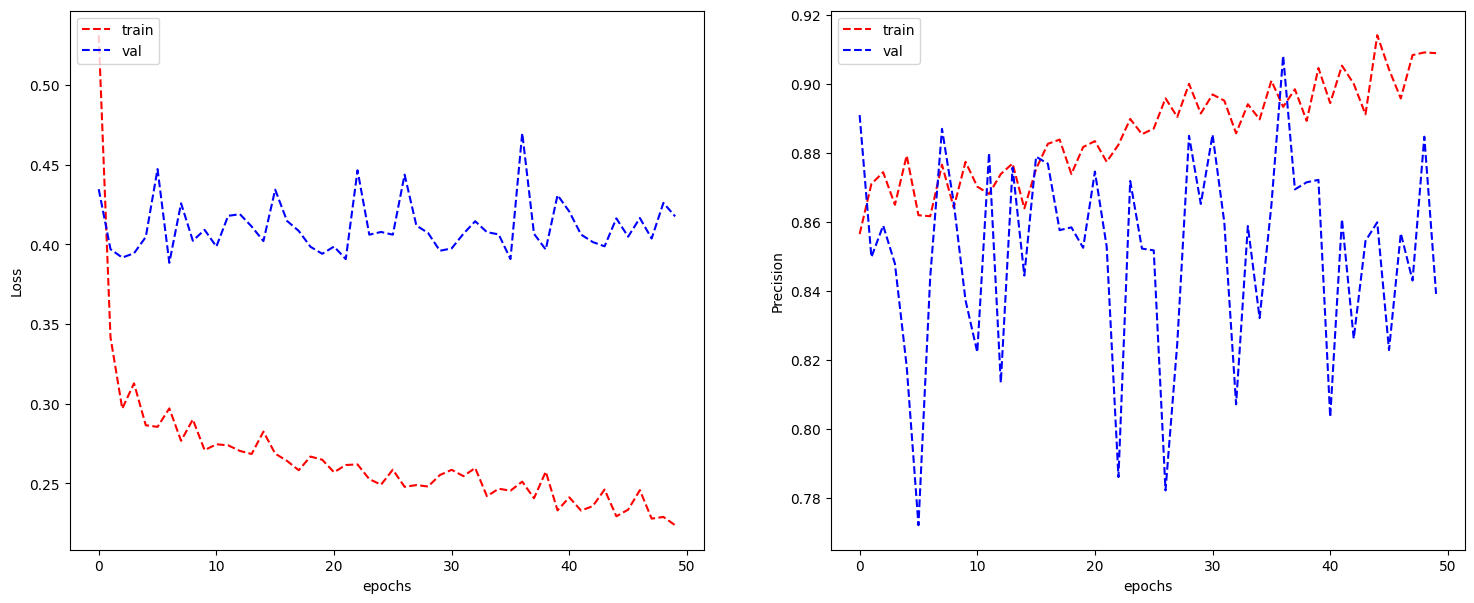

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['precision'],
    history.history['val_precision'],
    metric_name='Precision'
)

- Model is overfitting because Loss curve shows huge training-validation gap
- training loss decrease gradually at the end, while the validation loss remains high and fluctuating
- precision validation data is highly unstable because model unable to generalise to unseen data

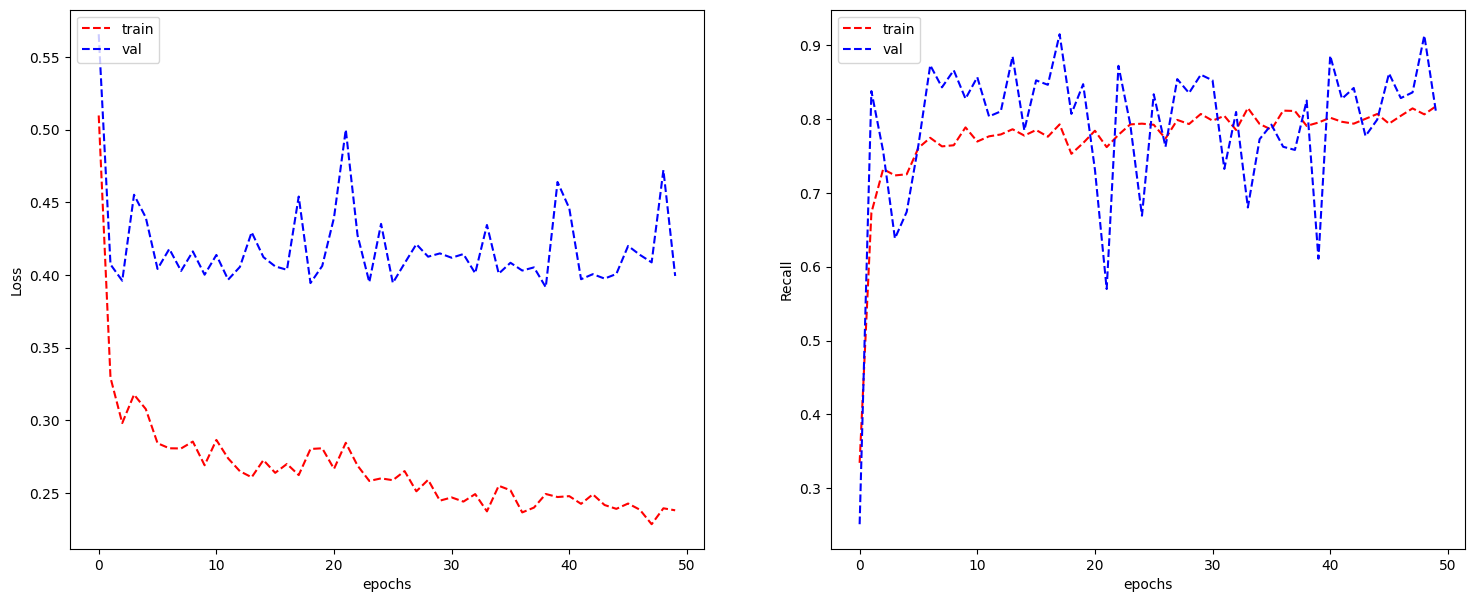

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['recall'],
    history.history['val_recall'],
    metric_name='Recall'
)

- Recall curves show validation outperform training, and high flunctuation shows model unable generalise to unseen data

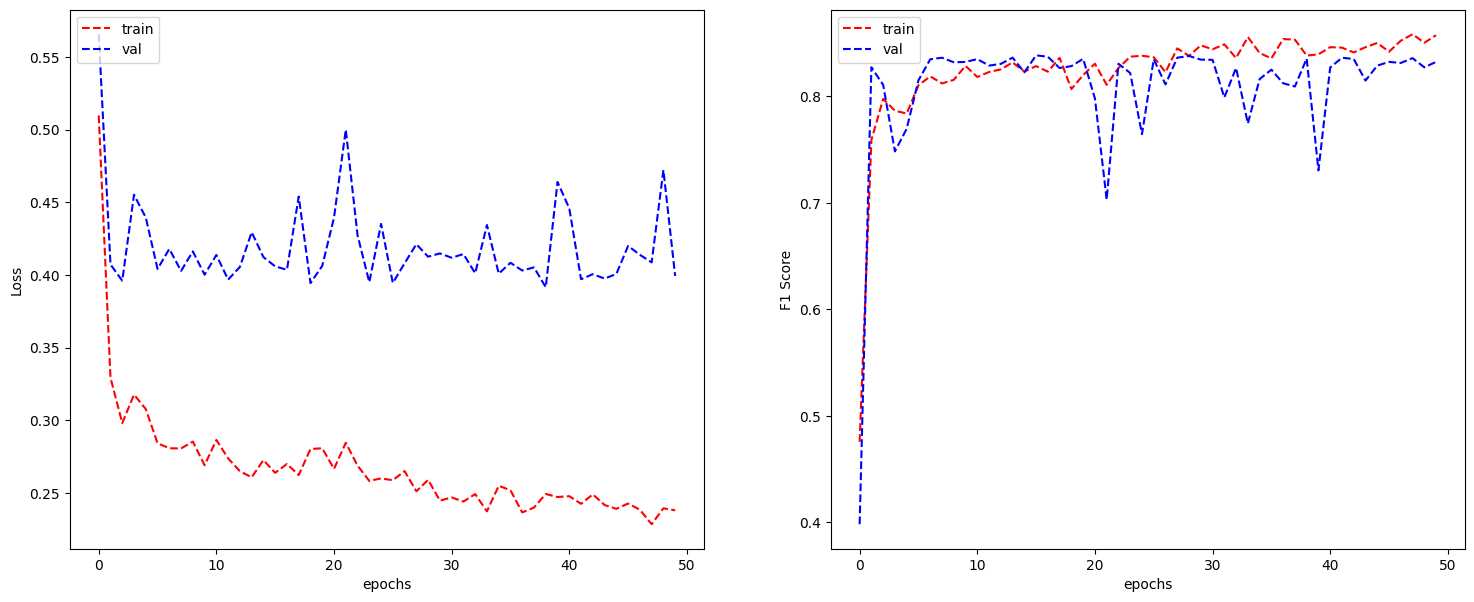

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['f1_score'],
    history.history['val_f1_score'],
    metric_name='F1 Score'
)

- F1-score curve shows small gap between trainign and validation, (training F1 reach 0.85m, validation F1 hovers around 0.8) which suggests model can classify unseen data moderately although overfitting

### Test Model without hyperparameter tunning.



In [ ]:
# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_base_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-11-0b2275189523>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


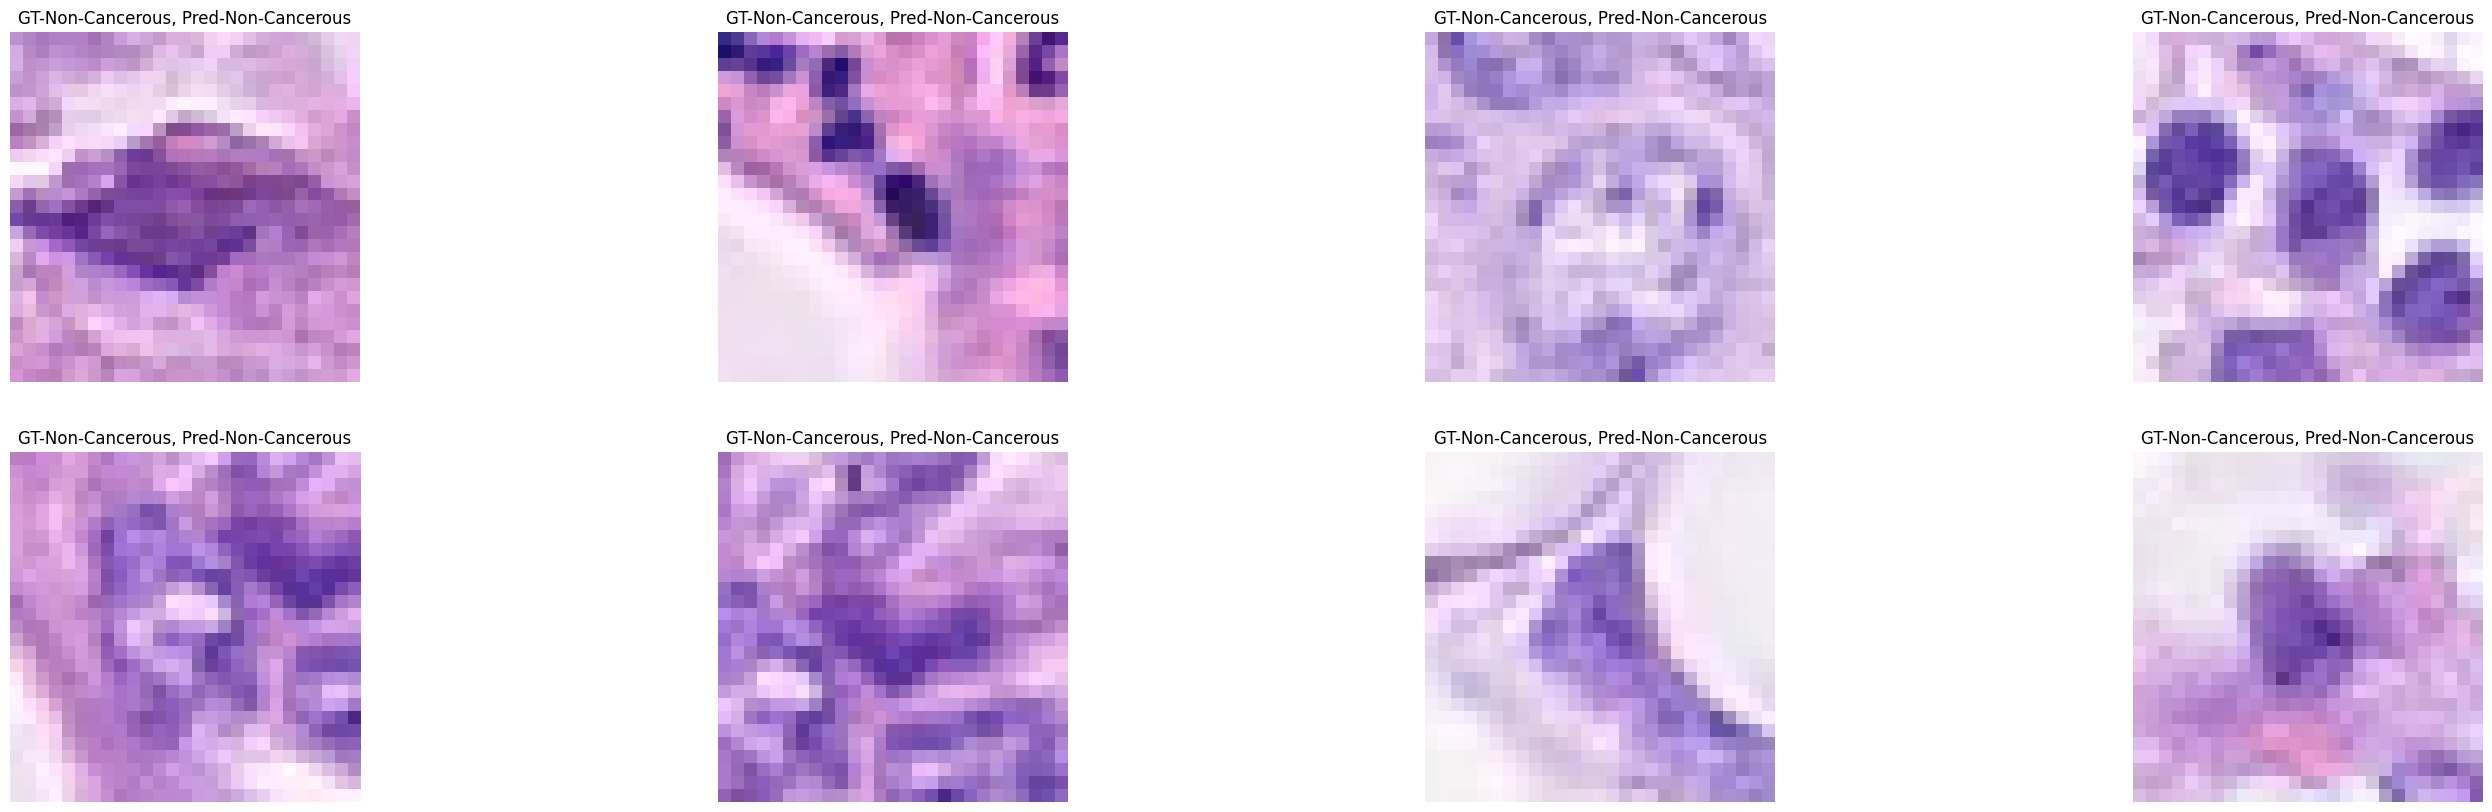

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_base_nn_mlp_test_generator:
        batches = batches + 1
        y_hat = isCancerous_base_nn_mlp_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model classify first 8 non-cancerous correctly

## Explanatory Model Analysis On Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_base_nn_mlp_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_base_nn_mlp_test_generator)
    y_hat = isCancerous_base_nn_mlp_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       914
         1.0       0.92      0.73      0.82       925

    accuracy                           0.83      1839
   macro avg       0.85      0.83      0.83      1839
weighted avg       0.85      0.83      0.83      1839



#### Macro Average Precision, Recall, F1-Score
- Precision: 0.85
- Recall: 0.83
- F1: 0.83

- Overall, moderate classification performance because F1-score 0.83
- Relatively balanced model performance because similar values for precision, recall and F1


<Figure size 1000x800 with 0 Axes>

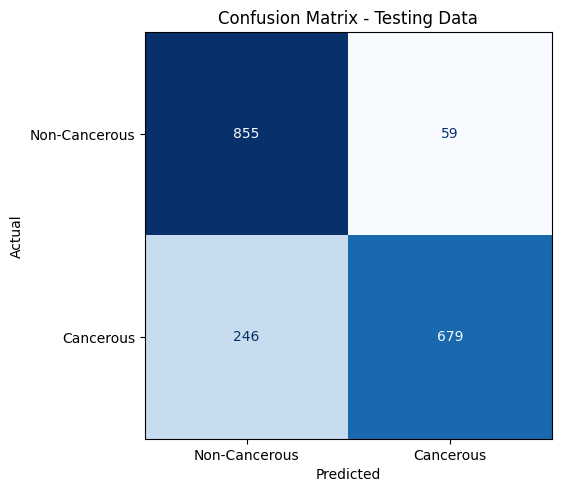

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_nn_mlp_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_nn_mlp_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
- 59 false positives
- 246 false negatives
- Model has imbalance predictions because higher rate of false negatives than false positives.

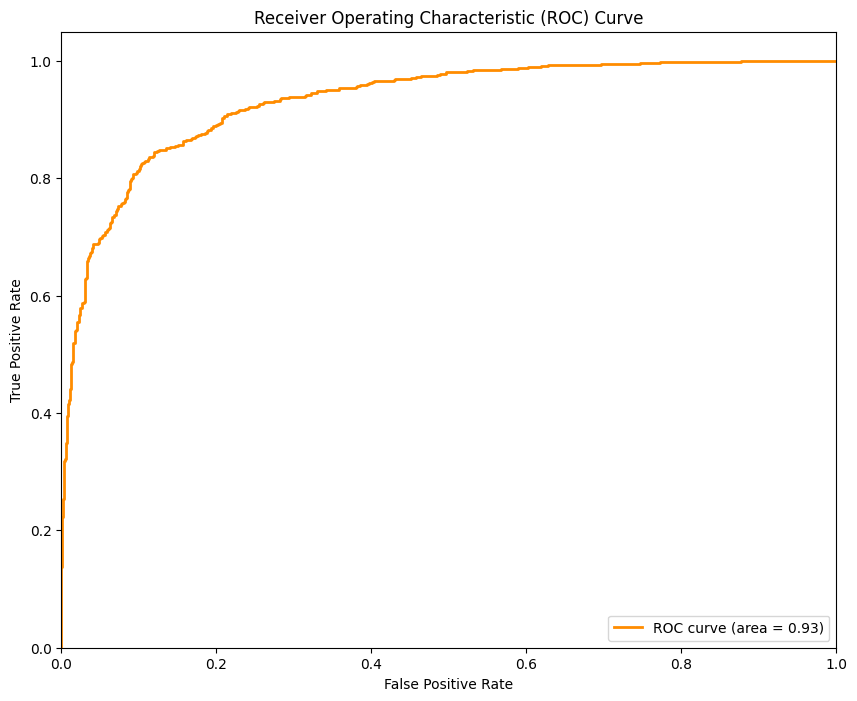

In [ ]:
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- baseline neural network (MLP) model has high AUC (0.93) for testing data. This confirm the model strong performance in classifying cencerous cell in various thresholds.

## Advanced development - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons for isCancerous

Because of overfitting (Huge training-validation loss gap), we improved baseline by applying:
- L2 Regularisation: penalizes large weights without turning to exactly zero
- Dropout:
    - randomly deactivates neurons during training to avoid model memorising data
    - 0.3 dropout rate in hidden layer with more neurons helps reduce overfitting in the larger parameter space
- Reduce neurones in layer:
    - reducing to 128 neurons decreases model capacity while maintaining sufficient performance

In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 128 # Reduced from 256 to 128
OUTPUT_CLASSES = 1

isCancerous_advanced_nn_mlp_model  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    # add L2 regularization to hidden layer
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # add dropout
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])
print("Advanced:")
isCancerous_advanced_nn_mlp_model.summary()

Advanced:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 2187)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       280,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,193 (1.07 MB)

 Trainable params: 280,193 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

```
Baseline:
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
=================================================================
Total params: 560,385
Trainable params: 560,385
Non-trainable params: 0
_________________________________________________________________
```
Flatten Layer:
- 1D vector of 2187 values

First Layer:
- Neurons reduced to 128 to decrease model capacity in memorising training data.

Dropout Layer:
- deactivate random neurons during training to prevent adaptation, make model include robust feature learning.

Output Layer:
- single neuron for binary classification

Total Parameters:
- advanced model has 50% less, model significantly less prone to overfitting

### Compile and Train Model

In [ ]:
# compile model
isCancerous_advanced_nn_mlp_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_advanced_nn_mlp_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_advanced_nn_mlp_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# train neural network model
history = isCancerous_advanced_nn_mlp_model.fit(isCancerous_advanced_nn_mlp_train_generator,
                                            validation_data = isCancerous_advanced_nn_mlp_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-44-e0919e61cf4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-44-e0919e61cf4a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super()

### Learning Curve

loss, precision, recall and f1 curves are plot to <font color='red'>check overfitting</font>.

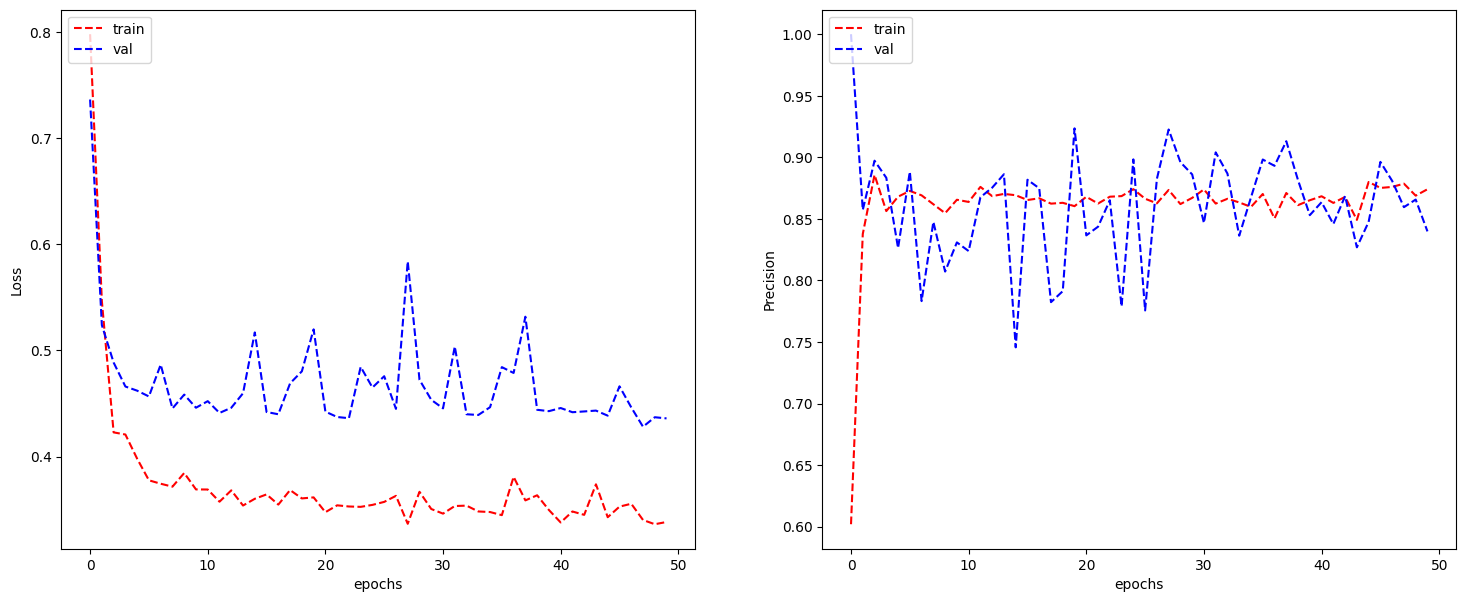

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['precision'],
    history.history['val_precision'],
    metric_name='Precision'
)

Compare to Baseline:
- Loss curve shows model has reduced overfitting with narrower training-validation gap
- model maintain similar precision levels to baseline with less parameters. Means baseline is overparameterized
- High osciliation in validation precision curve because unable to generalise well

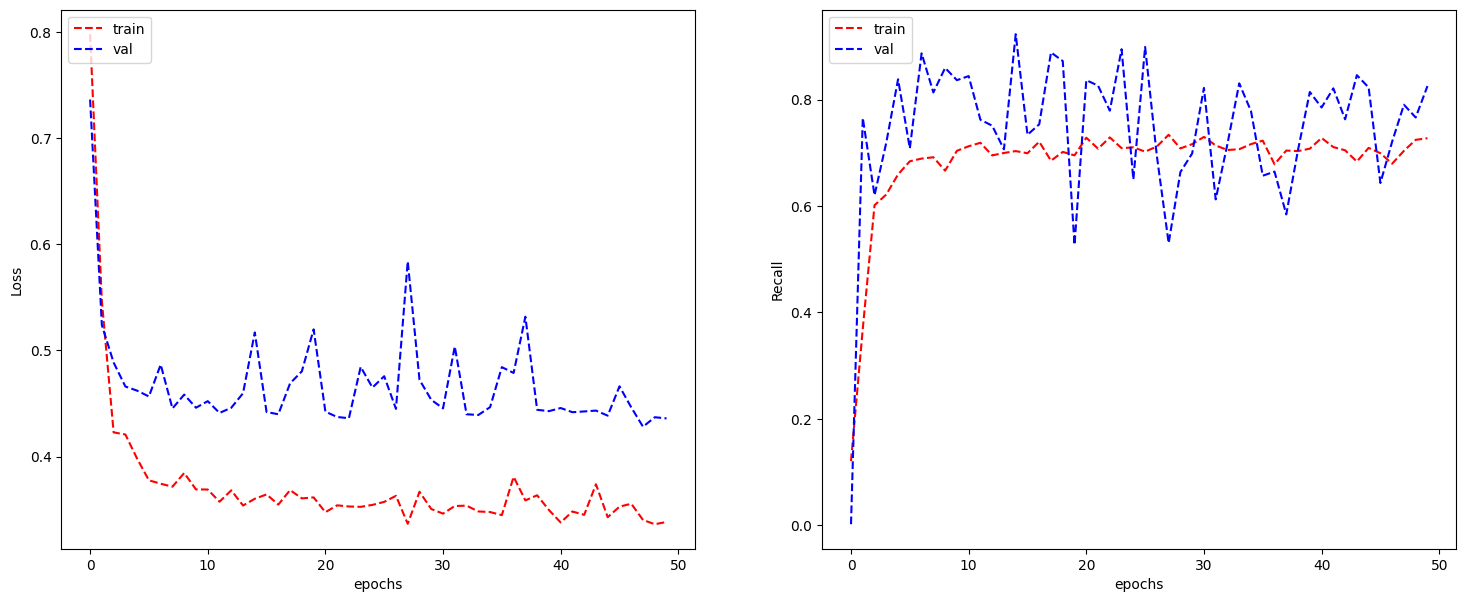

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['recall'],
    history.history['val_recall'],
    metric_name='Recall'
)

Compare to Baseline:
- model has lower training recall due to regularization, dropout, and reduced neurons preventing perfect data fitting
- unstable validation recall, indicating that regularization techniques are working to improve generalization

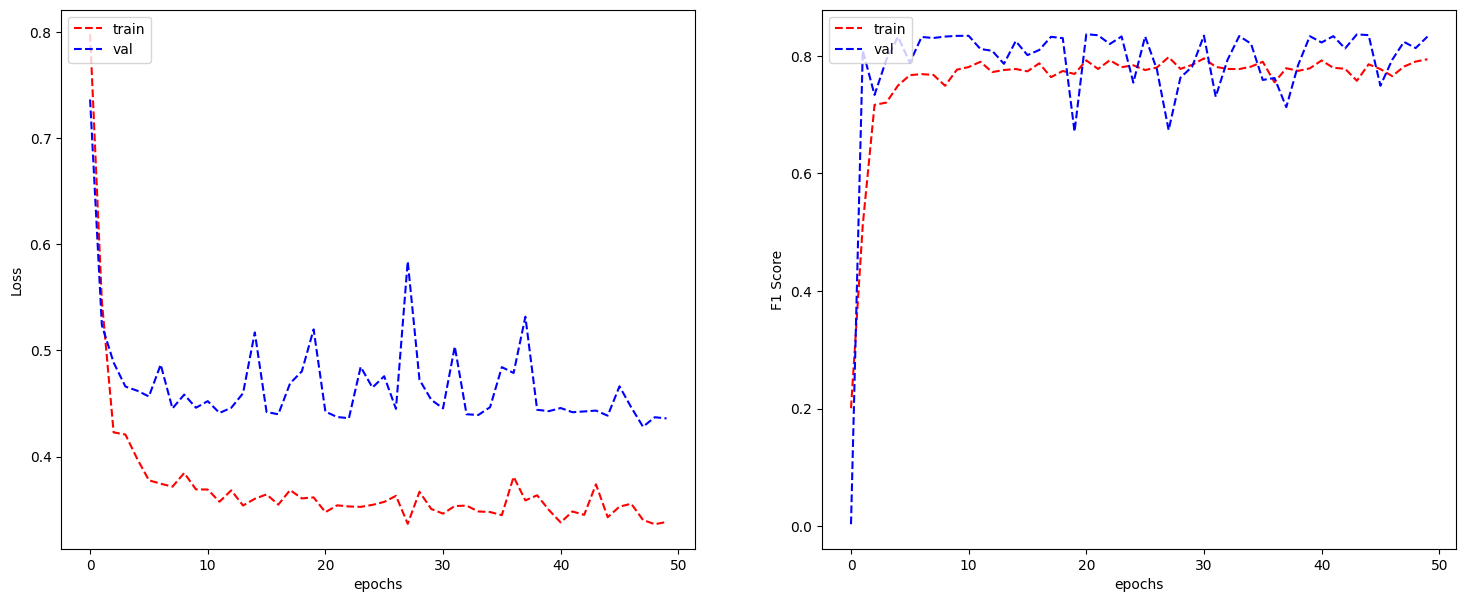

In [ ]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['f1_score'],
    history.history['val_f1_score'],
    metric_name='F1 Score'
)

Compare to Baseline:
- validation F1-scores outperforming training's because reduced overfitting
- model maintains similar F1-score to baseline (0.7 to 0.84) with reduced parameter

### Test Model

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-48-6356ab6cd4d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


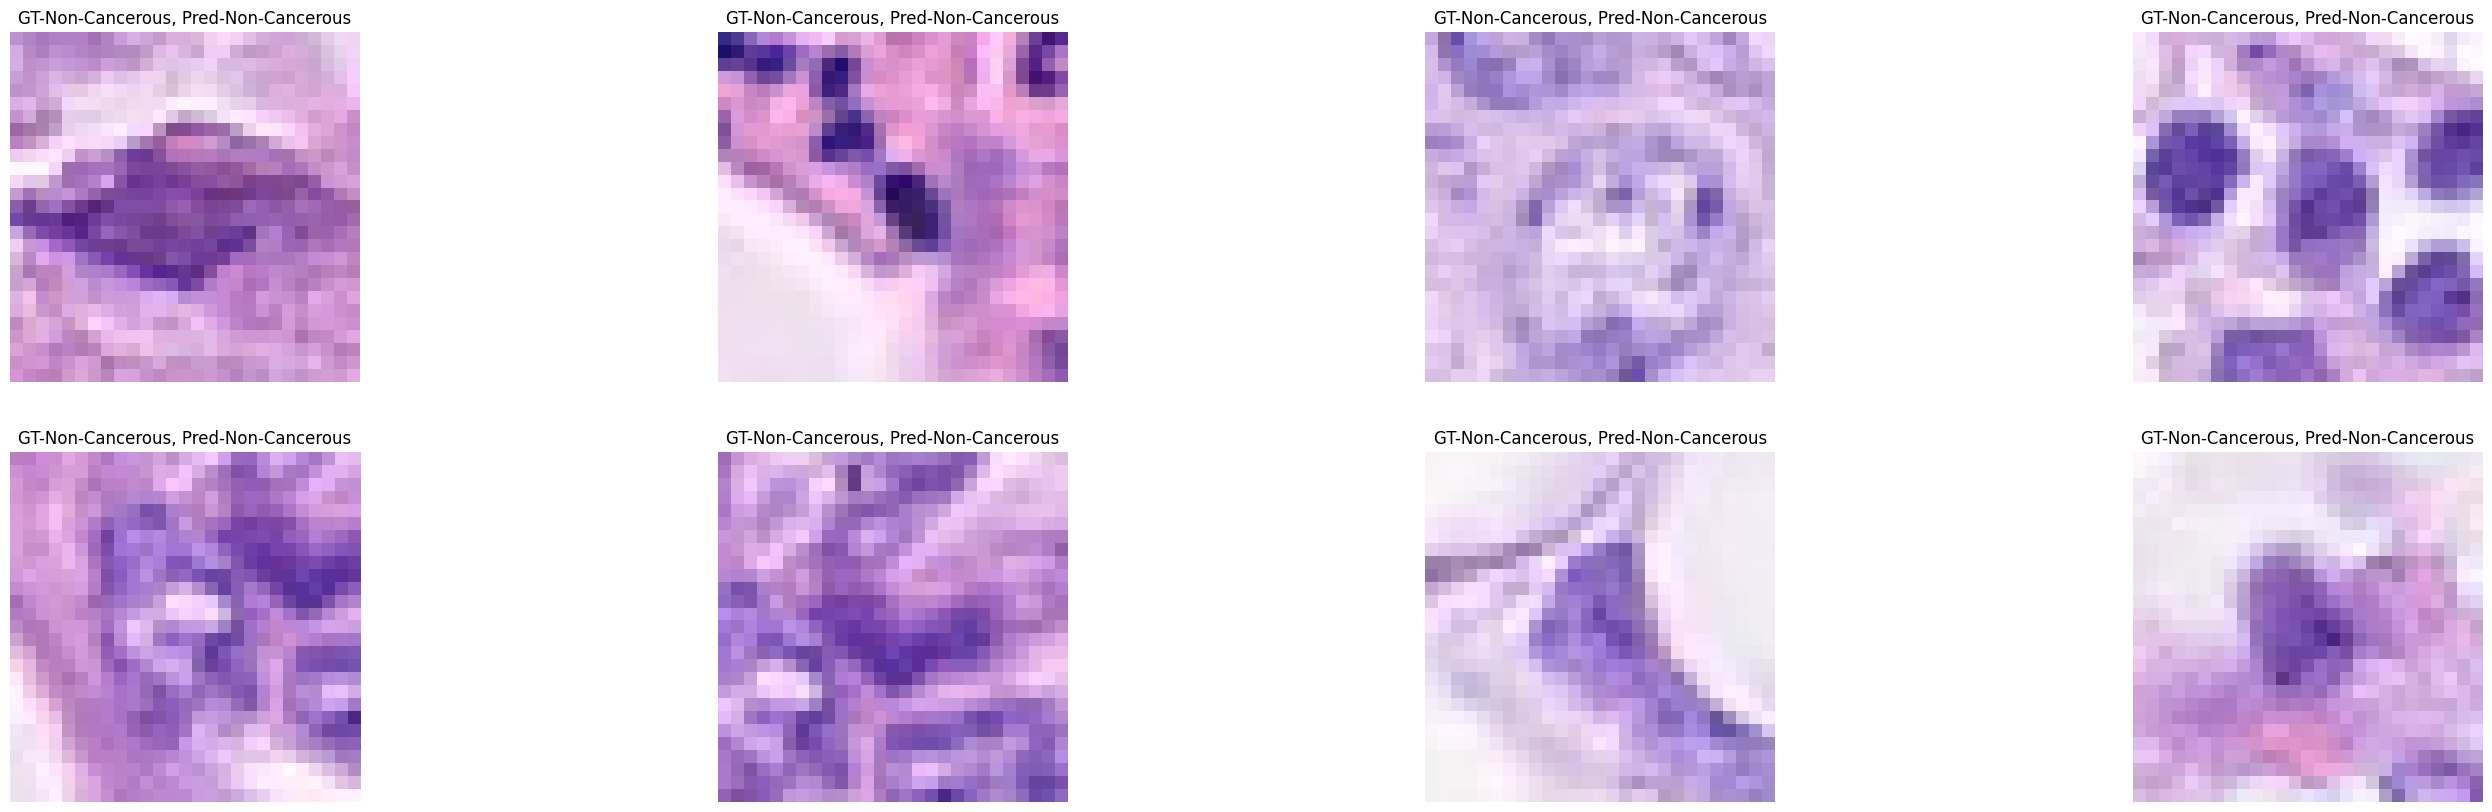

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_advanced_nn_mlp_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_advanced_nn_mlp_test_generator:
        batches = batches + 1
        y_hat = isCancerous_advanced_nn_mlp_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Same as baseline, Model classify first 8 non-cancerous cell correctly

## Explanatory Model Analysis On Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_advanced_nn_mlp_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_advanced_nn_mlp_test_generator)
    y_hat = isCancerous_advanced_nn_mlp_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       914
         1.0       0.93      0.71      0.81       925

    accuracy                           0.83      1839
   macro avg       0.85      0.83      0.83      1839
weighted avg       0.85      0.83      0.83      1839



#### Macro Average Precision, Recall, F1-Score
- Baseline:
    - Precision: 0.85
    - Recall: 0.83
    - F1: 0.83
- Advanced:
    - Precision: 0.85
    - Recall: 0.83
    - F1: 0.83

- advanced model maintains moderate classification F1-score with reduced neural complexity, demonstrating that fewer neurons can achieve comparable results to the baseline model.
- Similar to baseline, advanced's metrics remain relatively balanced across all metrics, indicating consistent classification performance for both classes.

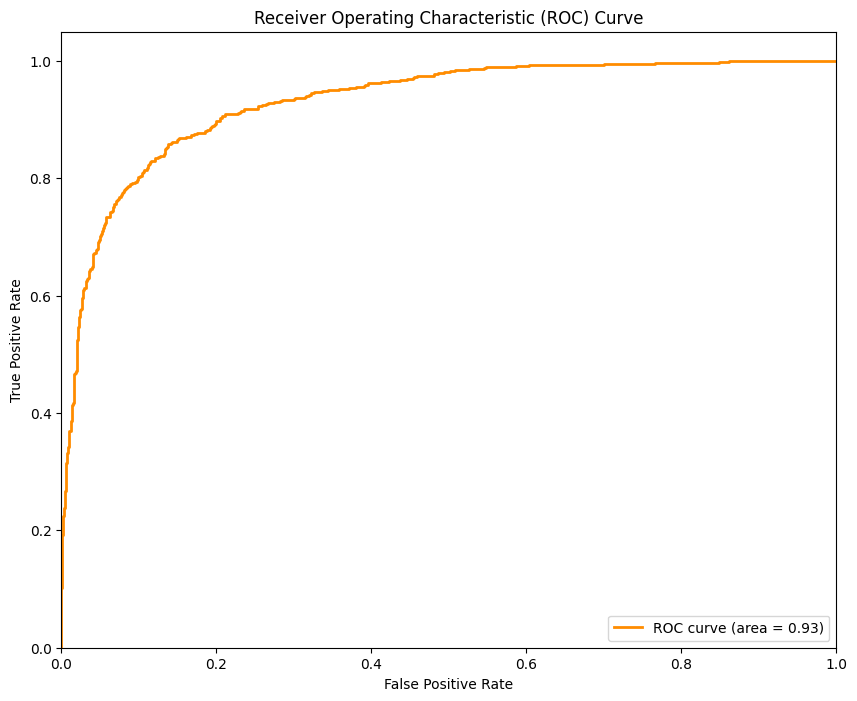

In [ ]:
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- Baseline AUC: 0.93
- Advanced AUC: 0.93
- Both models has high AUC, confirm MLP strong performance in classifying cencerous cell in various thresholds.

<Figure size 1000x800 with 0 Axes>

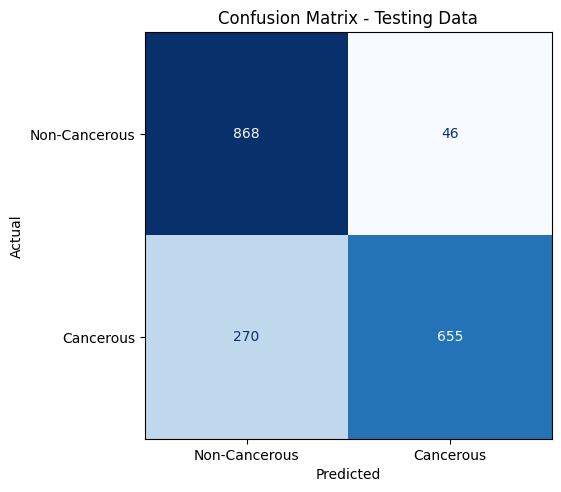

In [ ]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_advanced_nn_mlp_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_advanced_nn_mlp_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 59 false positives
- 246 false negatives

Advanced:
- 46 false positives
- 270 false negatives

- Advanced model shows fewer false positives but more false negatives because
reduced neurons and dropout hindered cancer detection capability despite successfully address overfitting.

## Baseline development - Deep Neural Network (CNN) for isCancerous

CNN is chosen as baseline model because its advantages over MLP:
- Automates feature extraction with learned convolution filters, eliminating manual engineering needed in MLPs
- Reduces parameters through local connectivity and sharing, enabling efficient processing of large inputs
- Improves performance with ReLU activation (avoiding sigmoid saturation), sparse connectivity, and hierarchical feature construction

Input dimension: 27x27x3 because image is 27×27 with RGB values

Output class: 1 because binary classification

Convolutional layers is used because feature extraction

Max pooling for dimensionality reduction

ReLU because:
- eliminate saturation caused from Sigmoid (which used by MLP)
- propagates gradients more efficiently for complex model

In [ ]:
import tensorflow as tf

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
OUTPUT_CLASSES = 1

isCancerous_base_cnn_model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_DIM),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Dimension reduction

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Dimension reduction

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layers for classification
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(OUTPUT_CLASSES),  # Binary classification output
])

isCancerous_base_cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,921 (476.25 KB)

 Trainable params: 121,921 (476.25 KB)

 Non-trainable params: 0 (0.00 B)

First Convolutional Block:
- Conv2D: 32 filters (3x3) → 25x25 feature maps
- MaxPooling2D: 2x2 pooling for downsampling

Second Convolutional Block:
- Conv2D: 64 filters (3x3)
- MaxPooling2D: 2x2 pooling

Final Layers:
- Flatten: 3D maps to 1D vector (1600 values)
- Dense: 64 neurons
- Output: 1 neuron (binary classification)

### Compile Model

Binary Cross-Entropy Loss:
- Designed for binary classification with from_logits=True conversion
- Penalizes confident wrong predictions to minimize missed cancer cases

Adam Optimizer:
- Combines AdaGrad and RMSprop for adaptive learning rates
- Handles noisy image gradients and <font color='red'>class imbalance</font> effectively

In [ ]:
# f1-score
class f1Score(tf.keras.metrics.Metric):
  # Initialize the metric with a name and any additional arguments
    def __init__(self, name='f1_score', **kwargs):
       # Call parent class constructor with provided name and arguments
       super().__init__(name=name, **kwargs)
       # Create precision and recall metrics as internal components
       self.precision = tf.keras.metrics.Precision()
       self.recall = tf.keras.metrics.Recall()

   # Update the state of the metric with new predictions
    def update_state(self, y_true, y_pred, sample_weight=None):
       # Forward the update to both precision and recall metrics
       self.precision.update_state(y_true, y_pred, sample_weight)
       self.recall.update_state(y_true, y_pred, sample_weight)

   # Calculate the F1 score when requested
    def result(self):
       # Get the current precision and recall values
       p = self.precision.result()
       r = self.recall.result()
       # Calculate F1 score as the harmonic mean of precision and recall
       # Adding epsilon prevents division by zero
       return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

   # Reset the state of both precision and recall metrics
    def reset_state(self):
       # Clear accumulated values when starting a new epoch
       self.precision.reset_state()
       self.recall.reset_state()

isCancerous_base_cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # As used in slide 5
    metrics=[tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall'),
              tf.keras.metrics.AUC(name='auc'),
              f1Score()]
)

### Train Model

Convert isCancerous to String because ```flow_from_dataframe``` require String labels

Use ```flow_from_dataframe``` load images from dataframe (ImageName contains the image filename)
- x: ImageName
- y: isCancerous

In [ ]:
# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_base_cnn_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_cnn_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_base_cnn_history = isCancerous_base_cnn_model.fit(isCancerous_base_cnn_train_generator,
                                            validation_data = isCancerous_base_cnn_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


### Learning Curve

loss, precision, recall and f1 curves are plot to <font color='red'>identify overfitting/underfitting</font>.

We apply optimisation technique in advanced development.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

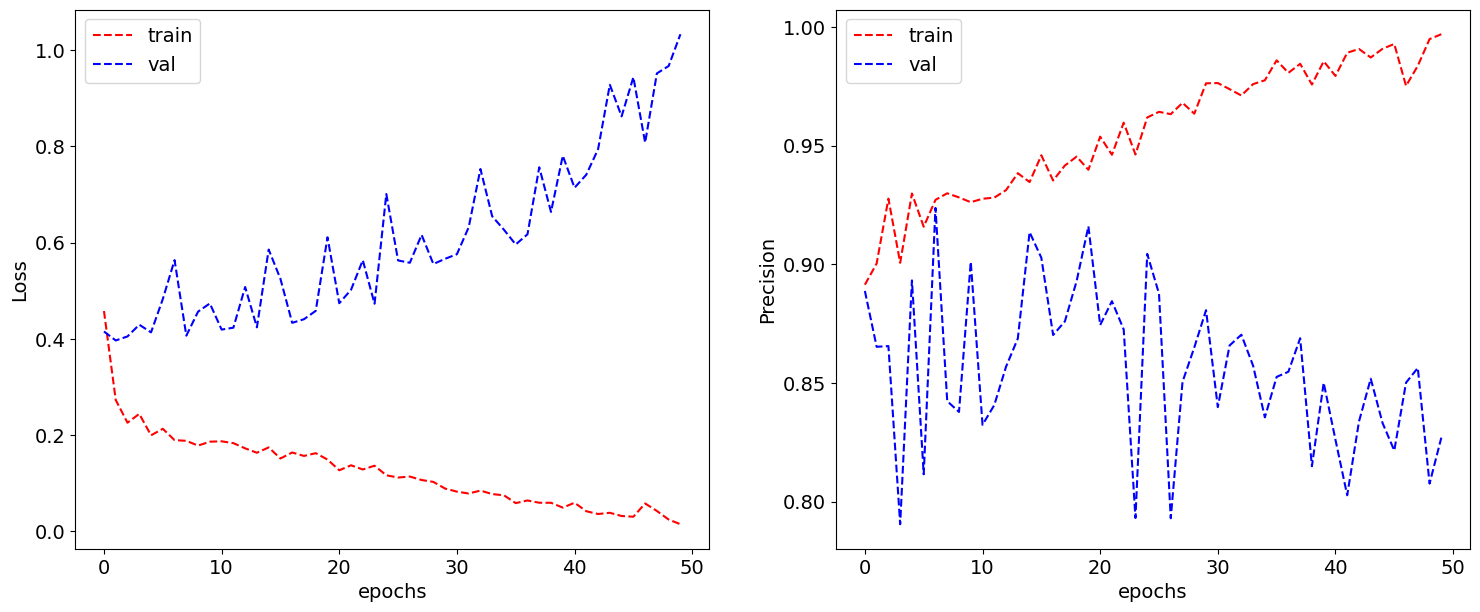

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['precision'],
    isCancerous_base_cnn_history.history['val_precision'],
    metric_name='Precision'
)

- Severe overfitting evident from near-zero training loss while validation loss increases, indicating memorization rather than pattern learning
- Perfect training precision but declining, oscillating validation precision demonstrates poor generalization to unseen data

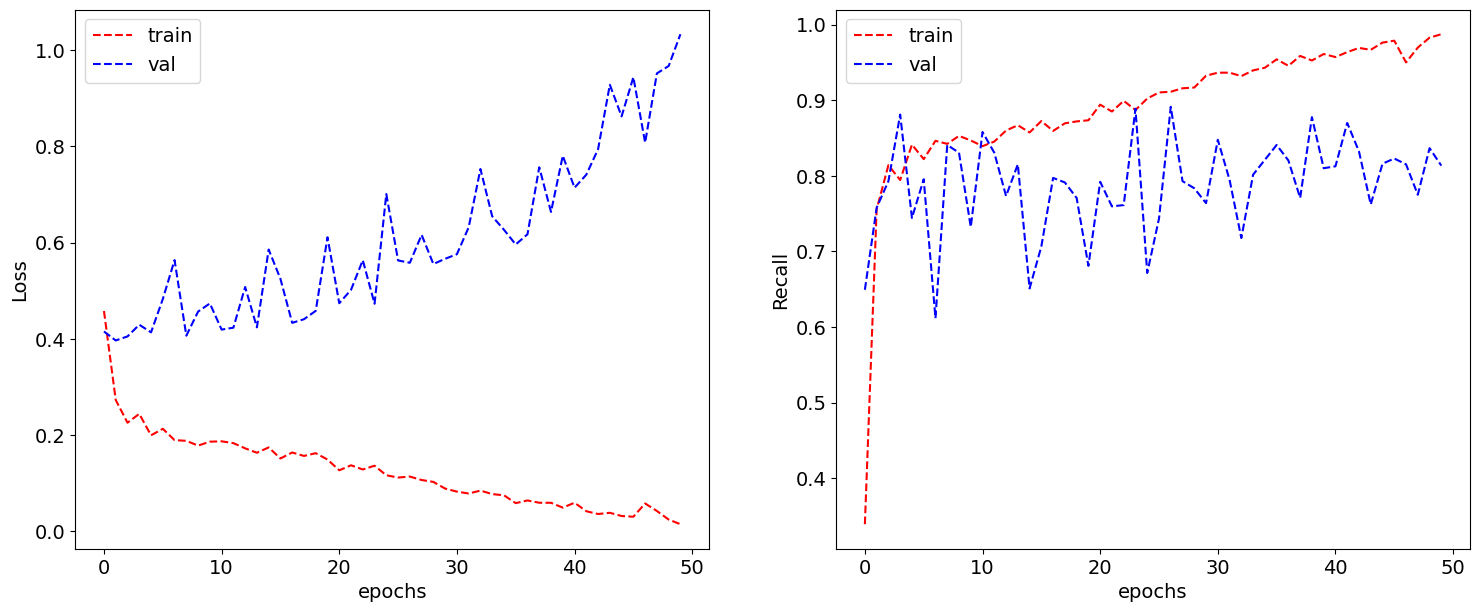

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['recall'],
    isCancerous_base_cnn_history.history['val_recall'],
    metric_name='Recall'
)

- Validation recall oscillates because improper learning rate control (affecting weight updates in gradient descent), preventing effective generalisation


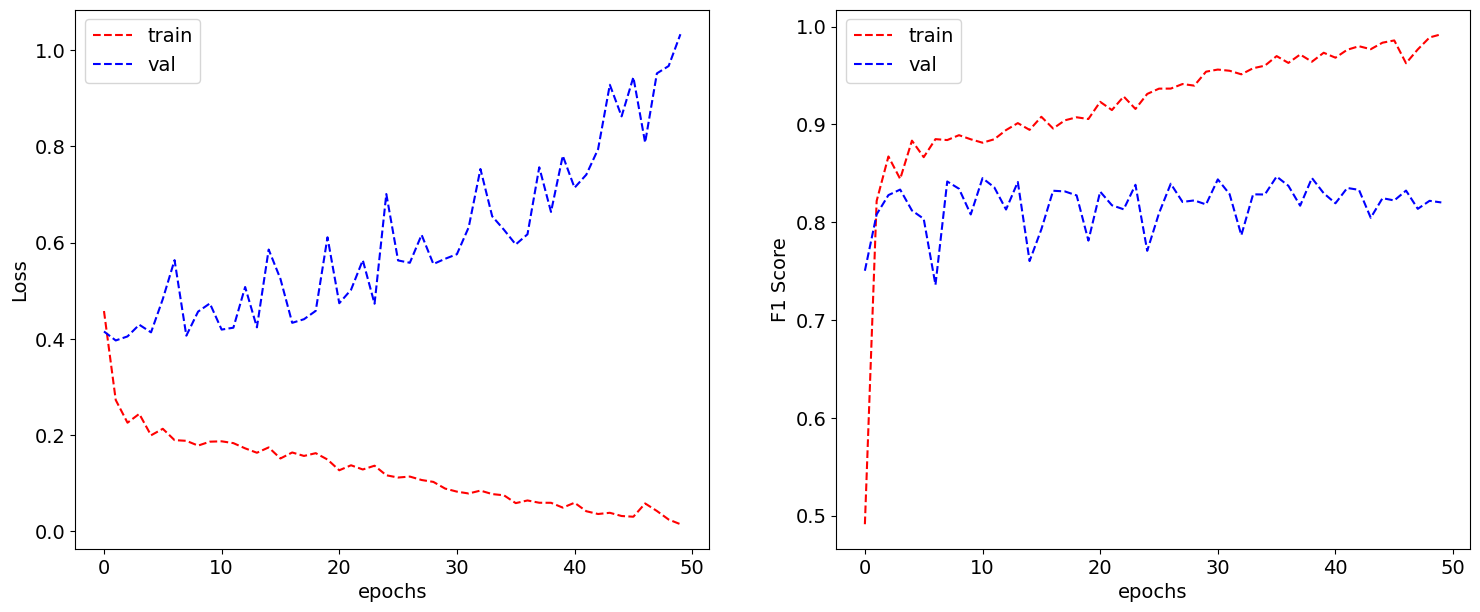

In [ ]:
plot_learning_curve(
    isCancerous_base_cnn_history.history['loss'],
    isCancerous_base_cnn_history.history['val_loss'],
    isCancerous_base_cnn_history.history['f1_score'],
    isCancerous_base_cnn_history.history['val_f1_score'],
    metric_name='F1 Score'
)

- F1-score curve shows widening train-validation gap from overfitting, with moderate oscillations indicating model reached peak generalization capacity at epoch 5

### Test Model Without Hyperparameter Tunning


Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-58-441120068a13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


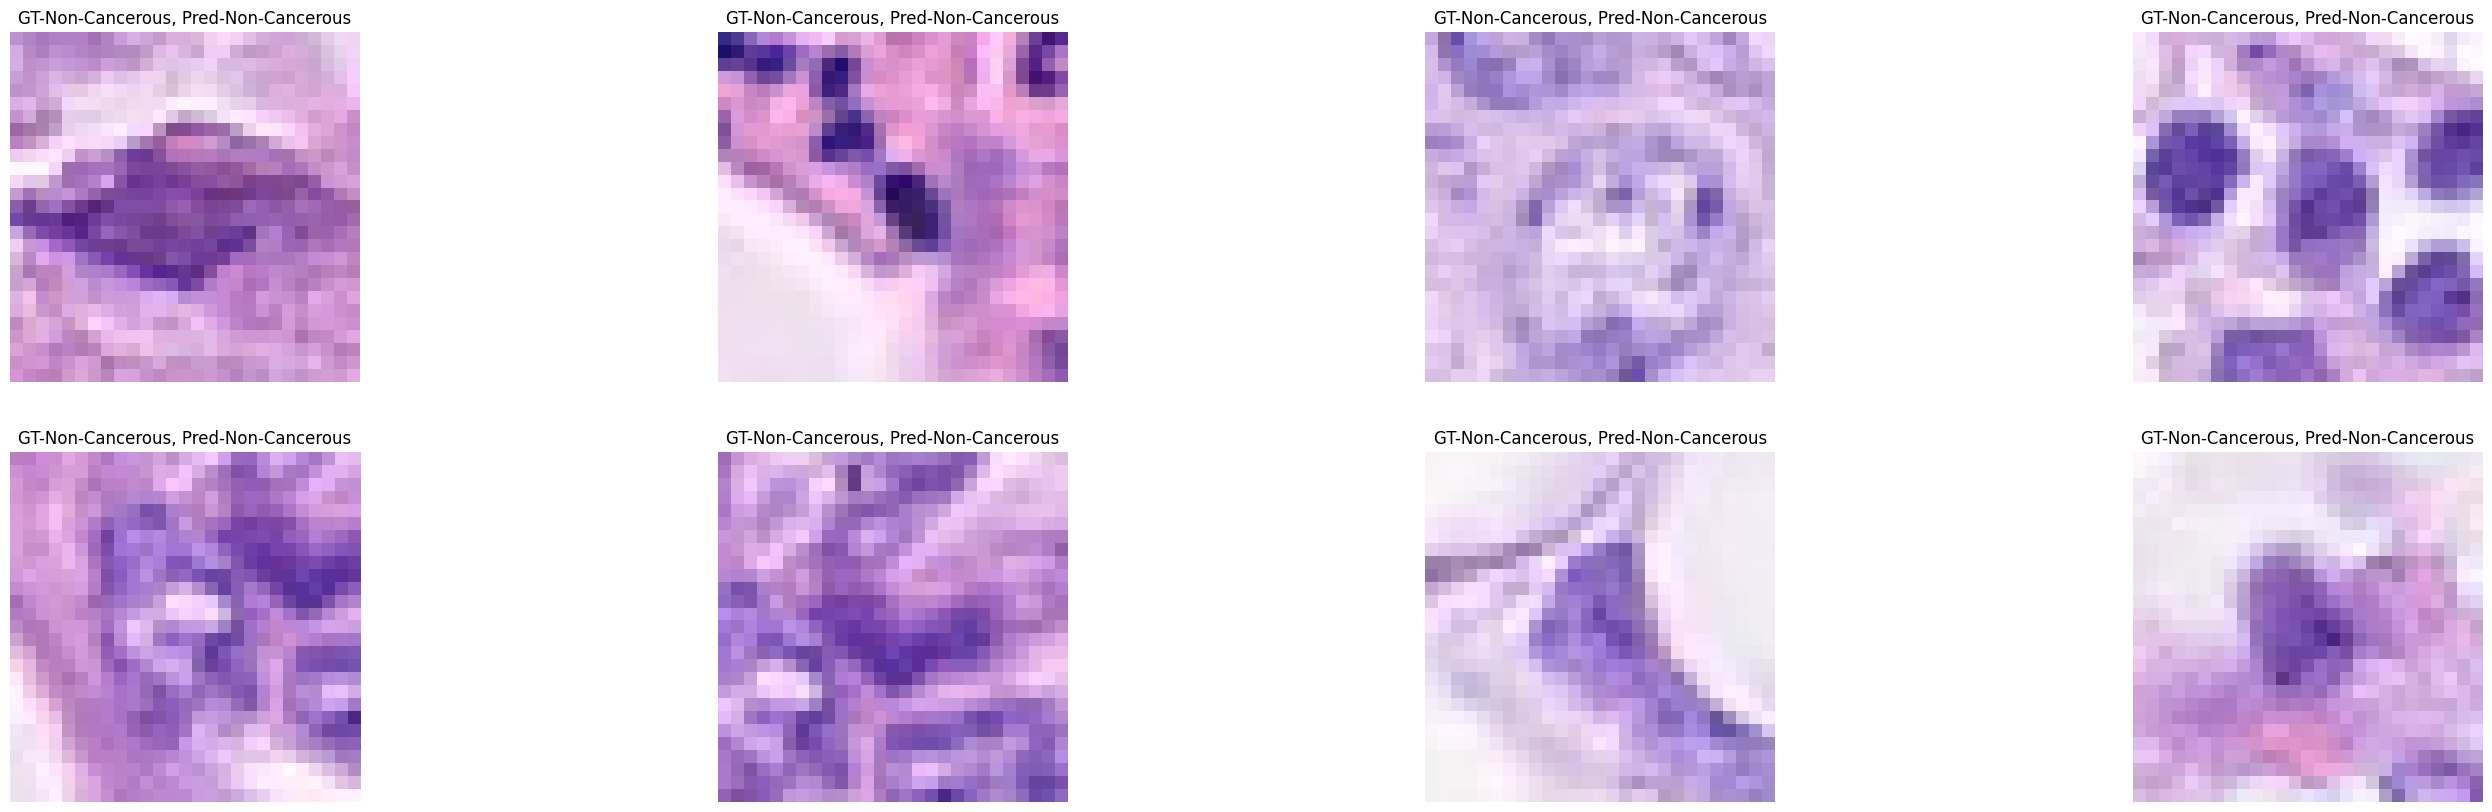

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_base_cnn_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_base_cnn_test_generator:
        batches = batches + 1
        y_hat = isCancerous_base_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model predict correctly for first 8 images.

## Explanatory Model Analysis For Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_base_cnn_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_base_cnn_test_generator)
    y_hat = isCancerous_base_cnn_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       914
         1.0       0.87      0.66      0.75       925

    accuracy                           0.78      1839
   macro avg       0.80      0.78      0.78      1839
weighted avg       0.80      0.78      0.78      1839



#### Macro Average Precision, Recall, F1-Score

- Precision: 0.80
- Recall: 0.78
- F1: 0.78

- Model achieves moderate classification performance (F1-score 0.78) due to underutilized hierarchical feature learning capabilities
- Has balanced precision and recall, showing no bias toward false positives or negatives

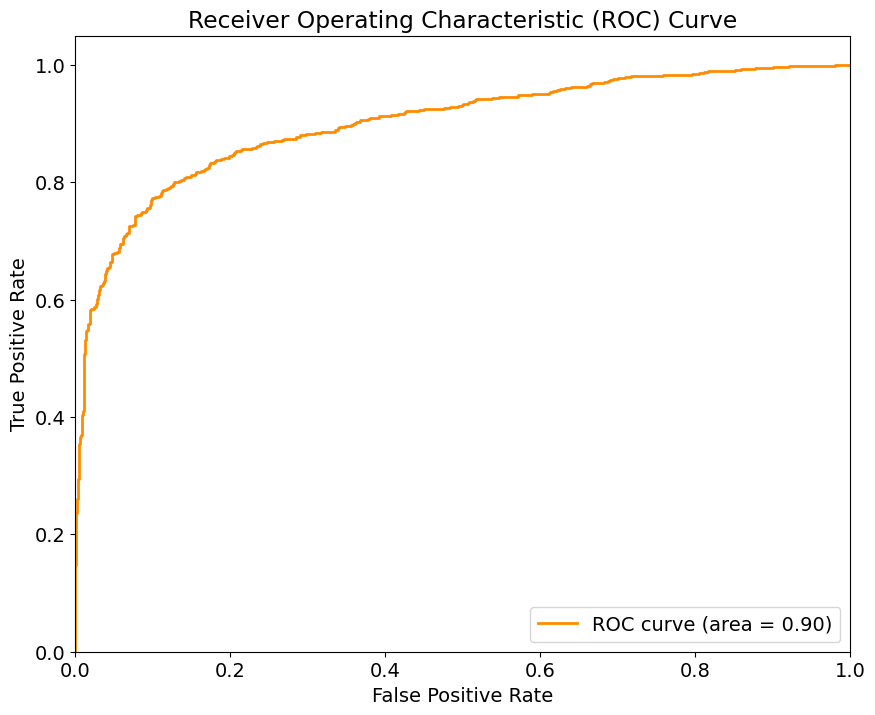

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- High AUC (0.90) on test data confirms strong cancer classification performance

<Figure size 1000x800 with 0 Axes>

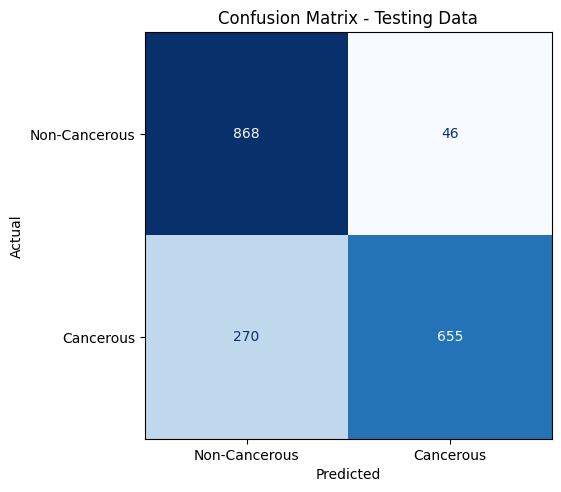

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_cnn_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_cnn_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 46 false positives
- 270 false negatives

- Strong bias toward false negatives (6x more than false positives) with 30% false negative rate, missing many cancerous cells
- Eventhough 70% cancer detection success, predictions show concerning class imbalance

## Advanced development - Deep Neural Network (CNN) with L2 Weight Regularisation, Dropout, Batch Normalisation, Data Augmentation

Because of overfitting, we improved baseline CNN using:
- L2 Regularisation: Penalizes large weights while preserving important features
- Dropout (0.3): Prevents memorization in layers with more neurons
- Batch Normalization: Addresses vanishing gradients and stabilises training
- <font color='red'>Data Augmentation</font>: Expands training data through image transformations to <font color='red'>improve generalisation and to address class imbalance</font>

In [ ]:
import tensorflow as tf

INPUT_DIM = (27,27,3) # Each colon cell image is 27×27 pixels with separate red, green, and blue values for each pixel
OUTPUT_CLASSES = 1

isCancerous_advanced_cnn_model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=INPUT_DIM), # add L2 regularisation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Dimension reduction

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),), # add L2 regularisation
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Dimension reduction

    # Flatten feature maps
    tf.keras.layers.Flatten(),

    # Fully connected layers for classification
    tf.keras.layers.Dense(64, activation='relu'),

    # Dropout
    tf.keras.layers.Dropout(.3),

    # Output layer
    tf.keras.layers.Dense(OUTPUT_CLASSES),  # Binary classification output
])

isCancerous_advanced_cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,305 (477.75 KB)

 Trainable params: 122,113 (477.00 KB)

 Non-trainable params: 192 (768.00 B)

### Compile and Train Model

<font color='red'>Data augmentation</font> on all training data because model can <font color='red'>learn from expanded non-cancerous image because non-Cancerous has less samples (class imbalance)</font>:
- Geometric transformations (rotation, flipping, cropping):
  - Teaches model cancer indicators appear in different orientations, leveraging CNN's spatial processing capability
- Color transformations (brightness, contrast):
  - Focuses model on structural features instead of lab-dependent coloration

Adam optimizer has reduced learning rate (0.0001) to handle augmented image and regularization

In [ ]:
# compile model
isCancerous_advanced_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # set learning rate to 0.0001
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        f1Score()
                    ])

# convert isCancerous to String
isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  # Geometric transformations
                                  rotation_range=40,           # Random rotation in degrees
                                  width_shift_range=0.2,       # Random horizontal shifts
                                  height_shift_range=0.2,      # Random vertical shifts
                                  shear_range=0.2,             # Shear transformations
                                  zoom_range=0.2,              # Random zoom
                                  horizontal_flip=True,        # Random horizontal flips
                                  vertical_flip=True,          # Random vertical flips (useful for microscopy images)
                                  fill_mode='nearest',         # Fill strategy for created pixels

                                  # Color-space transformations
                                  brightness_range=[0.8, 1.2], # Random brightness adjustment
                                  channel_shift_range=20.0    # Simulate staining variations
                                  )

val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

isCancerous_advanced_cnn_train_generator = train_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_train_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

isCancerous_advanced_cnn_validation_generator = val_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_val_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# train neural network model
isCancerous_advanced_cnn_history = isCancerous_advanced_cnn_model.fit(isCancerous_advanced_cnn_train_generator,
                                            validation_data = isCancerous_advanced_cnn_validation_generator,
                                            epochs=50,
                                            verbose=0)

Found 5774 validated image filenames belonging to 2 classes.
Found 2283 validated image filenames belonging to 2 classes.


<ipython-input-88-792de290b375>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_train_data['isCancerous'] = isCancerous_nn_train_data['isCancerous'].astype('str')
<ipython-input-88-792de290b375>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_val_data['isCancerous'] = isCancerous_nn_val_data['isCancerous'].astype('str')
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super()

### Display Augmented Image

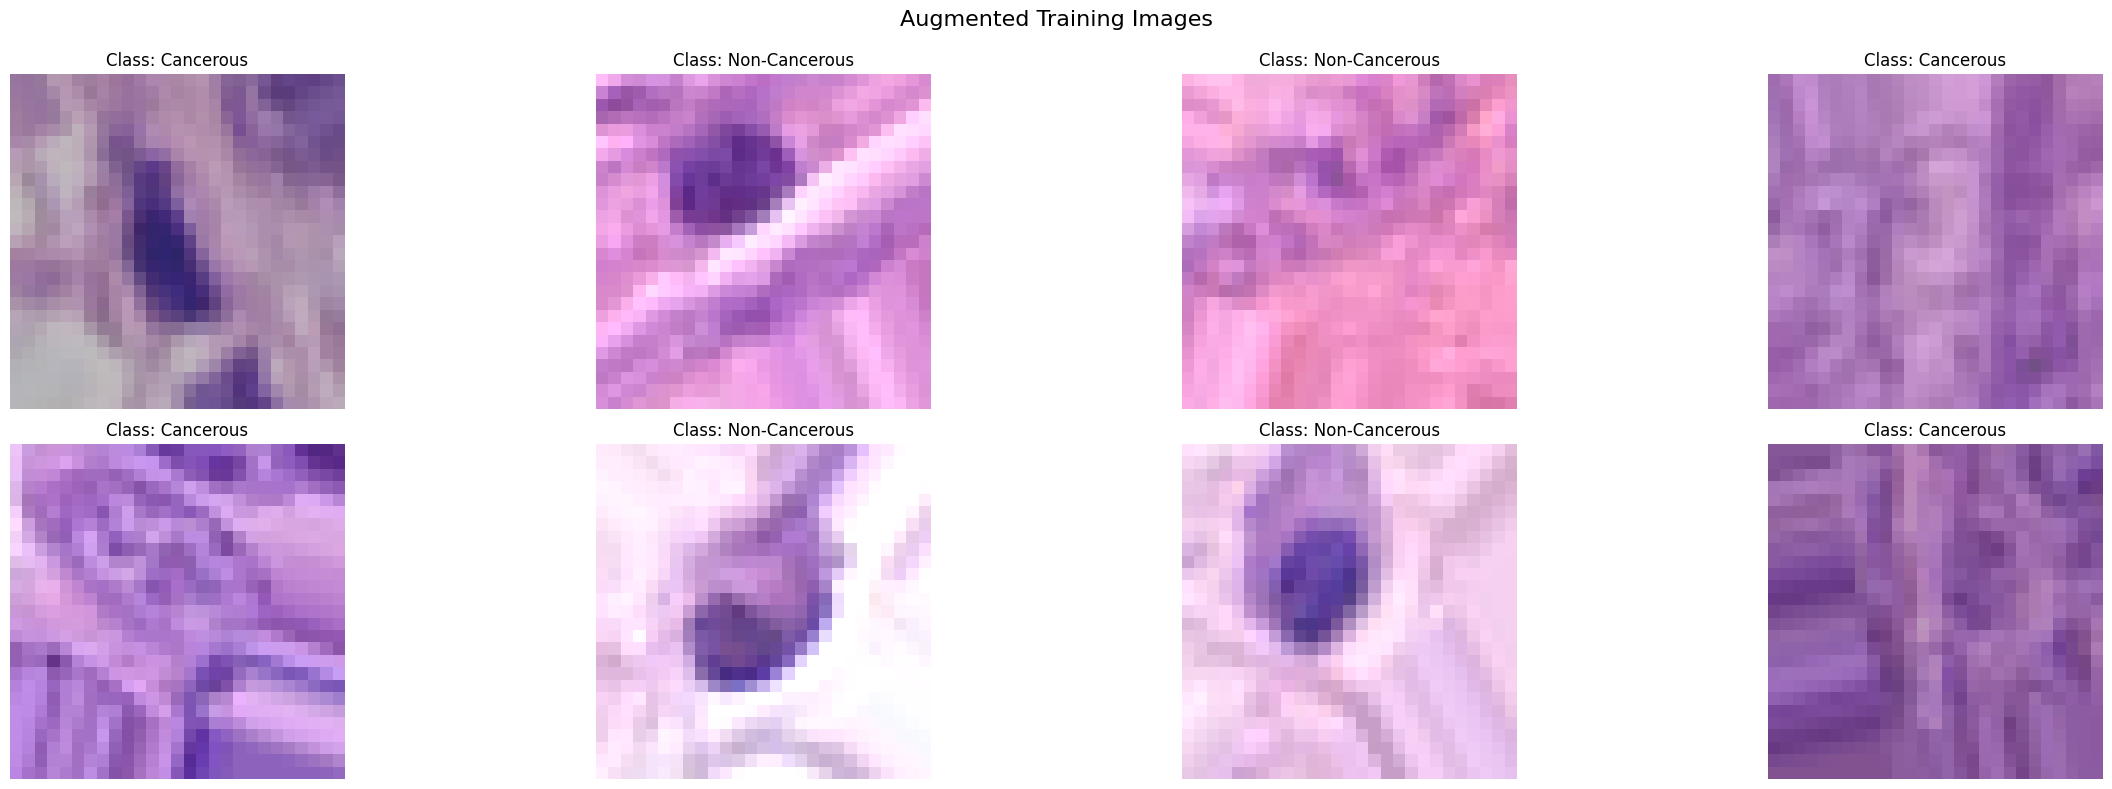

In [ ]:
import matplotlib.pyplot as plt

# Function to display augmented images from the training generator
def show_augmented_samples(train_generator, num_samples=8, figsize=(25, 8)):
    """
    Display augmented images from the training data generator

    Parameters:
    train_generator: The flow_from_dataframe generator with augmentations
    num_samples: Number of samples to display
    figsize: Size of the figure to display
    """
    # Reset the generator to ensure we get different images
    train_generator.reset()

    # Get a batch of augmented images
    augmented_batch = next(train_generator)
    images = augmented_batch[0]  # Get the images
    labels = augmented_batch[1]  # Get the labels

    # Calculate grid dimensions
    if num_samples <= 4:
        grid_size = (1, num_samples)
    else:
        grid_size = (2, num_samples // 2 + num_samples % 2)

    # Set up the figure
    fig, axes = plt.subplots(*grid_size, figsize=figsize)
    axes = axes.flatten()  # Flatten for easier indexing

    # For each sample
    for i in range(min(num_samples, len(images))):
        # Plot augmented image
        axes[i].imshow(images[i])
        axes[i].set_title(f'Class: {"Cancerous" if labels[i] == 1 else "Non-Cancerous"}')
        axes[i].axis('off')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle('Augmented Training Images', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Display 8 augmented samples from the training generator
show_augmented_samples(isCancerous_advanced_cnn_train_generator, num_samples=8)

- Augmented images vary in cell orientations and colors

### Learning Curve
loss, precision, recall and f1 curves are plot to <font color='red'>check overfitting</font>.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name):
    plt.figure(figsize=(18,7))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

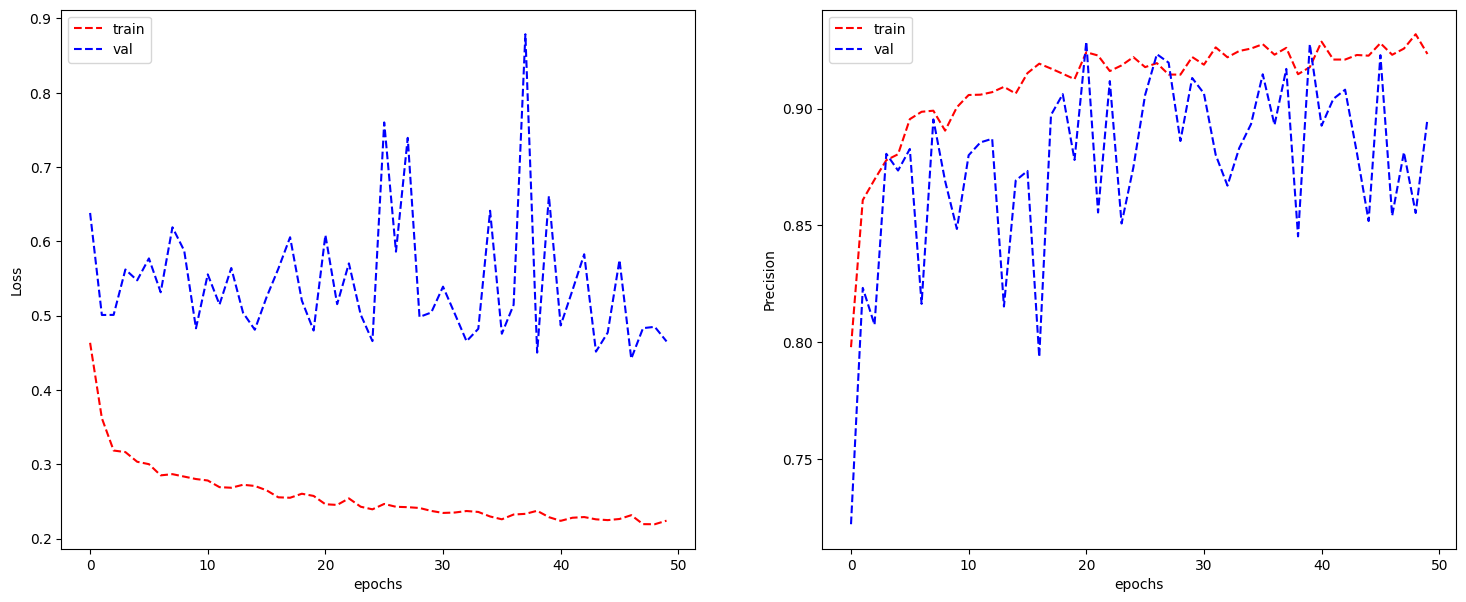

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['precision'],
    isCancerous_advanced_cnn_history.history['val_precision'],
    metric_name='Precision'
)

Compared to Baseline:
- Smaller training-validation loss gap shows reduced overfitting
- Higher validation precision indicates better generalization than baseline

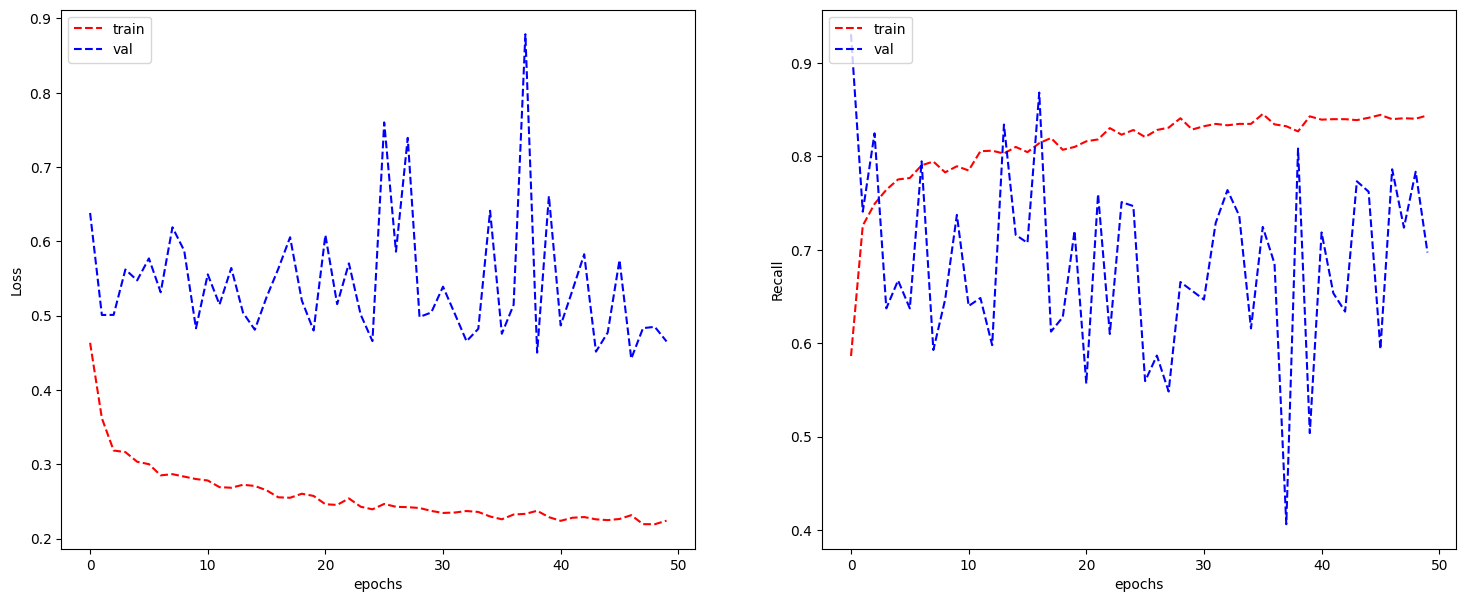

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['recall'],
    isCancerous_advanced_cnn_history.history['val_recall'],
    metric_name='Recall'
)

Compared to Baseline:
- Validation recall oscillates more (0.4-0.87) because model struggles with challenging augmented validation images while avoiding overfitting


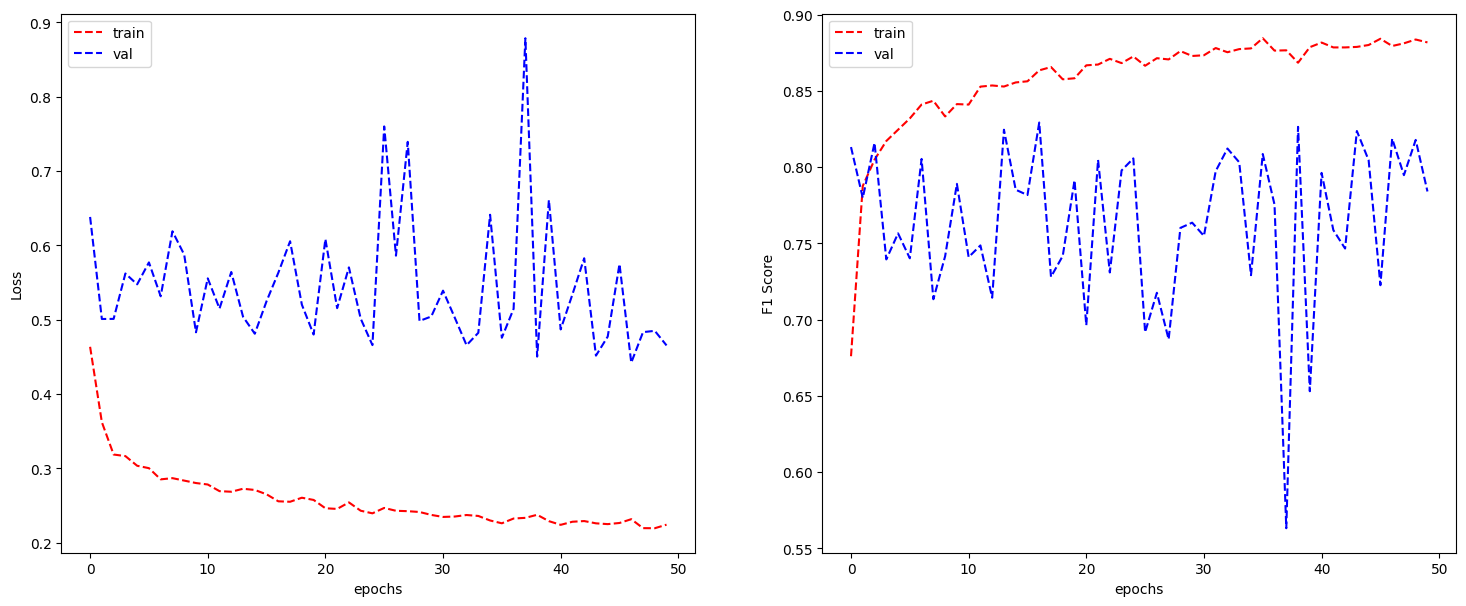

In [ ]:
plot_learning_curve(
    isCancerous_advanced_cnn_history.history['loss'],
    isCancerous_advanced_cnn_history.history['val_loss'],
    isCancerous_advanced_cnn_history.history['f1_score'],
    isCancerous_advanced_cnn_history.history['val_f1_score'],
    metric_name='F1 Score'
)

Compared to Baseline:
- Reduced training-validation F1 gap (training: 0.87, validation: 0.75) from regularization preventing memorization
- Higher validation volatility as model struggles to generalise from augmented to non-augmented images

### Test Model

Found 1839 validated image filenames belonging to 2 classes.


<ipython-input-94-d6cc88af056c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')


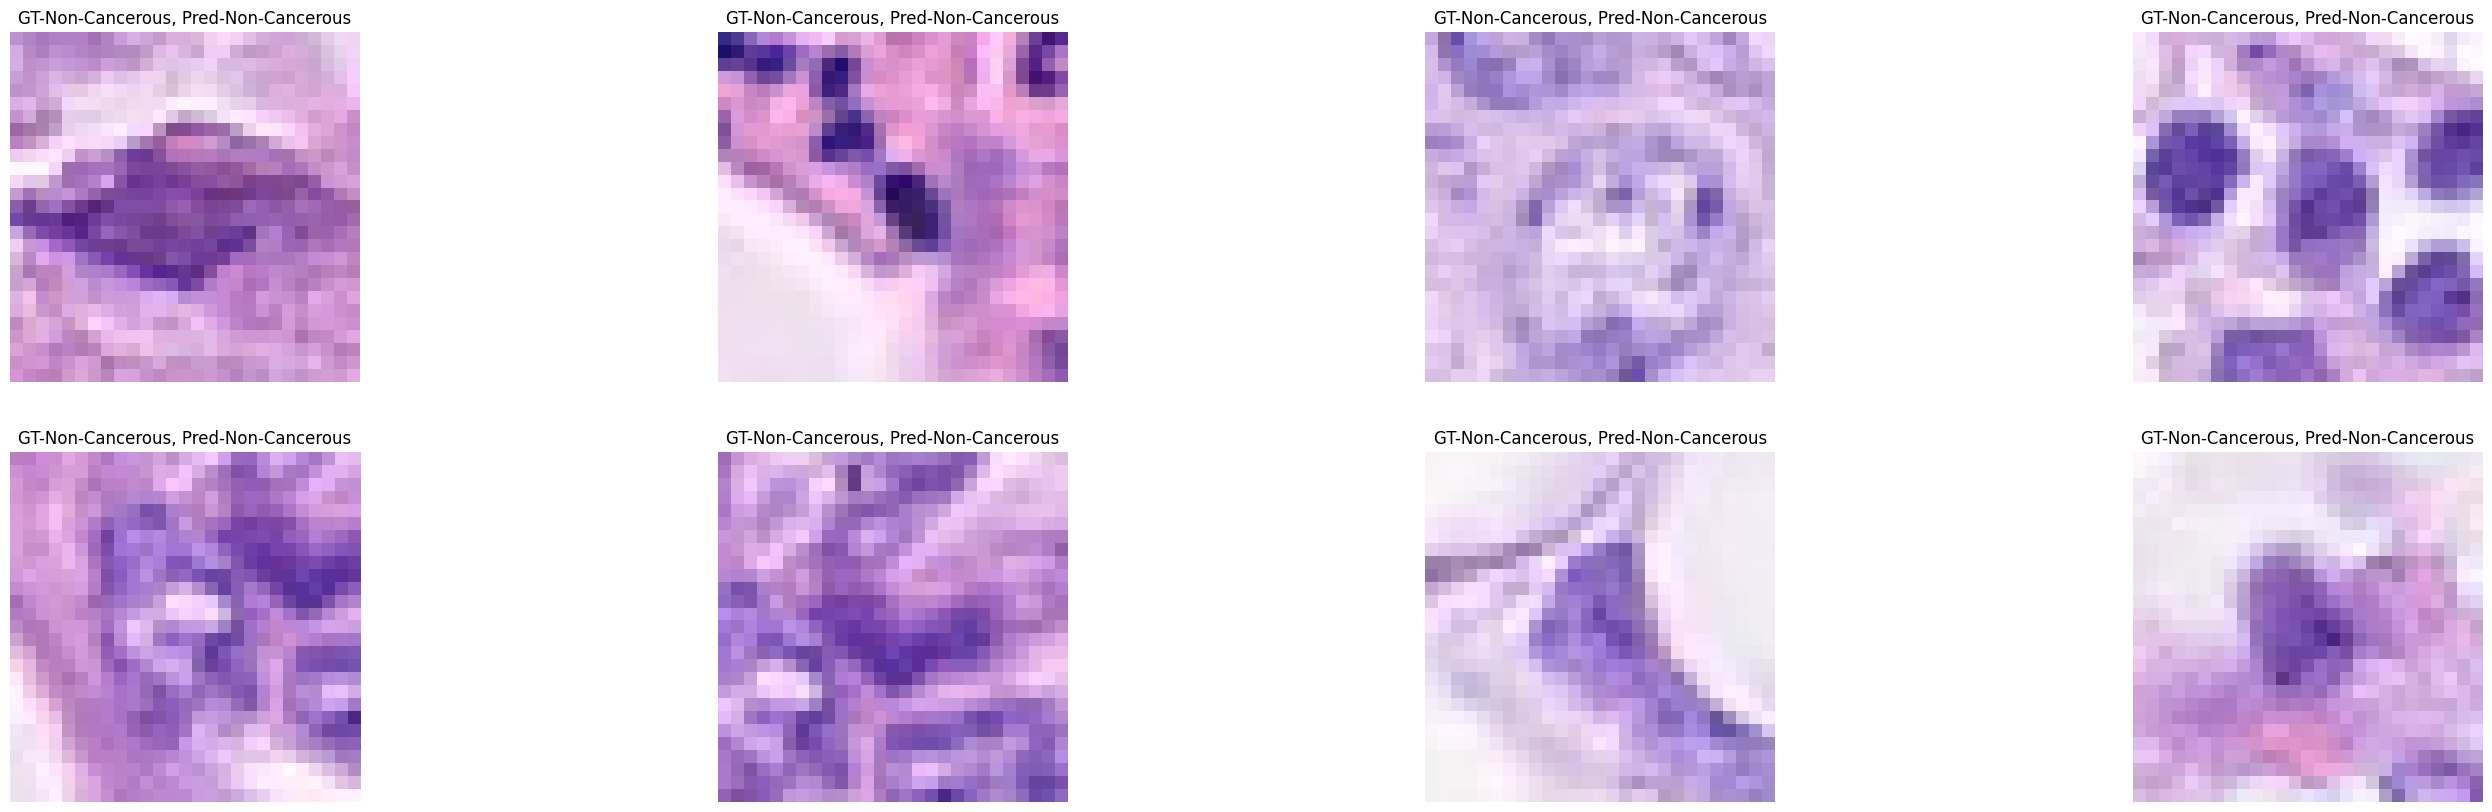

In [ ]:
# generate isCancerous label
isCancerous_label_names = {'Non-Cancerous' : 0, 'Cancerous' : 1}

# convert isCancerous to String
isCancerous_nn_test_data['isCancerous'] = isCancerous_nn_test_data['isCancerous'].astype('str')

# use Image data generators to load data in batch into memory
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

isCancerous_advanced_cnn_test_generator = test_datagen.flow_from_dataframe(
        dataframe=isCancerous_nn_test_data,
        directory='./machineLearning/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='binary',
        seed=42)

# plot output of neural network on testing data
d_inv = {v: k for k, v in isCancerous_label_names.items()}
plt.figure(figsize=(35,10))
batches = 0
for x,y in isCancerous_advanced_cnn_test_generator:
        batches = batches + 1
        y_hat = isCancerous_advanced_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 9:
            plt.subplot(2,4,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

- Model predict correctly for first 8 images.

## Explanatory Model Analysis For Testing Data

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

# Reset the generator to the beginning
isCancerous_advanced_cnn_test_generator.reset()

# Calculate the number of steps needed to go through the entire test dataset
steps = len(isCancerous_nn_test_data) // batch_size
if len(isCancerous_nn_test_data) % batch_size != 0:
    steps += 1

# Collect all predictions and true labels
y_true = []
y_pred_raw = []

for i in range(steps):
    x, y = next(isCancerous_advanced_cnn_test_generator)
    y_hat = isCancerous_advanced_cnn_model.predict(x, verbose=0)

    # Collect true labels
    y_true.extend(y)

    # Collect raw predictions
    y_pred_raw.extend(y_hat)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_raw = np.array(y_pred_raw)

In [ ]:
# convert to class labels (0 or 1)
y_pred_class = (y_pred_raw >= 0.5).astype(int)
print(classification_report(y_true, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.72      0.96      0.82       914
         1.0       0.93      0.64      0.76       925

    accuracy                           0.79      1839
   macro avg       0.83      0.80      0.79      1839
weighted avg       0.83      0.79      0.79      1839



#### Macro Average Precision, Recall, F1-Score
- Baseline:
    - Precision: 0.80
    - Recall: 0.78
    - F1: 0.78
- Advanced:
    - Precision: 0.83
    - Recall: 0.79
    - F1: 0.79

Observations:
- Advanced model shows higher precision through hyperparameter tuning reducing false positives
- Slight recall improvement indicates tuning better addressed false positives than identifying all positive cases
- Overall metrics improvement demonstrates tuning benefits outweighed drawbacks for a more reliable model

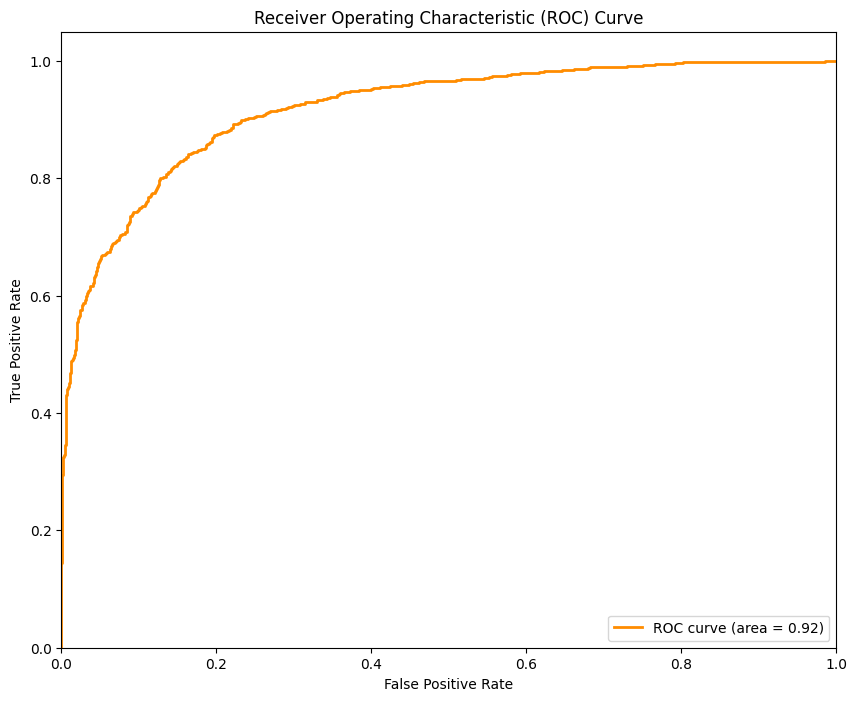

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
# Calculate ROC curve and ROC area
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### ROC Curve
- Baseline AUC: 0.90
- Advanced AUC: 0.92
- advanced's Higher AUC shows hyperparameter tuning improved classification ability across thresholds

<Figure size 1000x800 with 0 Axes>

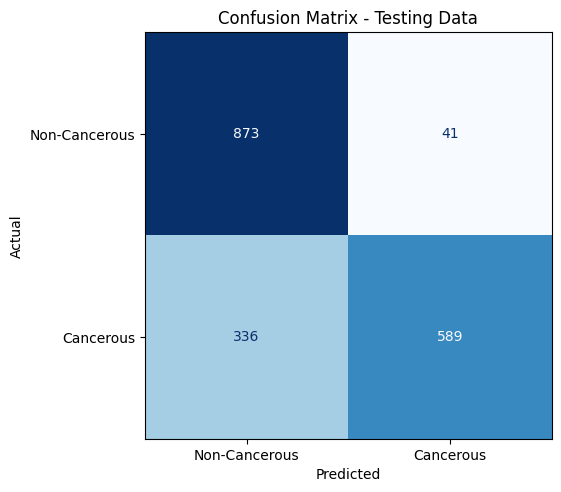

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and plot confusion matrix
isCancerous_base_cnn_test_cm = confusion_matrix(
    y_true,
    y_pred_class
)

plt.figure(figsize=(10, 8))

# Use ConfusionMatrixDisplay for plotting
disp = ConfusionMatrixDisplay(confusion_matrix=isCancerous_base_cnn_test_cm,
                              display_labels=['Non-Cancerous', 'Cancerous'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.title('Confusion Matrix - Testing Data')
plt.show()

#### Confusion Matrix
Baseline:
- 46 false positives
- 270 false negatives

Advanced:
- 41 false positives
- 336 false negatives

Observations:
- Advanced model reduced false positives but increased false negatives because regularisation and data augmentation prevented overfitting while reducing sensitivity to cancerous features


### isCancerous Final Model Selection - Neural Network (MLP) with L2 Regularisation, Dropout, Reduced Neurons

Justification:
- has highest  precision (0.85), recall (0.83), and F1-score (0.83) among image-based models. AUC of 0.93 shows excellent discriminative ability between cancerous and non-cancerous cells, outperforming even the Advanced CNN.
- reduces false positives to 46 (from 59 in baseline MLP) while keeping false negatives more manageable than the Advanced CNN (270 vs 336). This balance is critical in medical applications where missing cancer is big concern.
- reduced neurons which creates more computationally efficient model with fewer parameters because faster deployment/training while regularization techniques prevent overfitting.
- consistent performance unlike CNN models which show significant volatility in validation metrics during training.

### Independent Evaluation

#### Comparative Analysis


